In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,sys
import numpy as np
from random import shuffle
import cv2
from tqdm import tqdm

import os
print(os.listdir("../"))

['training', 'input', 'checkpoint', 'weights.03-0.99730_binary_crossentropy_f1_macro.hdf5', 'config', 'weights.01-0.99724_binary_crossentropy_f1_macro.hdf5', 'weights.10-0.99755_binary_crossentropy_f1_macro.hdf5', 'working', 'weights.07-0.99754_binary_crossentropy_f1_macro.hdf5', 'weights.01-0.99713_binary_crossentropy_f1_macro.hdf5', 'model', 'weights.04-0.99747_binary_crossentropy_f1_macro.hdf5', 'model_0.3478.h5', 'lib', 'weights.02-0.99729_binary_crossentropy_f1_macro.hdf5']


# Data

In [3]:
df = pd.read_csv("../input/imet-2019-fgvc6/train.csv")
data=[]
max_lenght=0
id_max_lenght=0
for i in range(len(df)):
    img_path=df.iloc[i]["id"]
    lb=df.iloc[i]["attribute_ids"].split(' ')
    if max_lenght<len(lb):
        max_lenght=len(lb)
        id_max_lenght=img_path
    else:
        max_lenght=max_lenght
    label=[int(i) for i in lb]
    data.append([img_path,label])

In [4]:
data

[['1000483014d91860', [147, 616, 813]],
 ['1000fe2e667721fe', [51, 616, 734, 813]],
 ['1001614cb89646ee', [776]],
 ['10041eb49b297c08', [51, 671, 698, 813, 1092]],
 ['100501c227f8beea', [13, 404, 492, 903, 1093]],
 ['10050ed12fbad46d', [189, 279, 774, 800, 1051]],
 ['100543a032517972', [188, 1034]],
 ['1006665c0aad488', [1010, 1053]],
 ['1007057734dba6df', [189, 541, 542, 993]],
 ['1008abd71f3ed5bc', [70, 776, 794, 813, 1046, 1092]],
 ['1008c7837081f985', [79, 1062]],
 ['1009f5737fc77f2', [188, 668, 754]],
 ['100a0dcde728cb36', [51, 675]],
 ['100a58282c6584bf', [147, 716, 903, 1092]],
 ['100b45b7c4020f5d', [161, 489, 704, 1100]],
 ['100bb499d37d0751', [188, 535]],
 ['100bbf5e832083d3', [51, 212, 426, 586, 940]],
 ['100d750286e85bf3', [13, 616]],
 ['100e1e65a6d7850e', [737, 1009, 1046]],
 ['100ef61c00e1b5d3', [25, 161, 784, 1059]],
 ['100efeead4d0f90c', [189, 542, 670, 813, 949, 1092]],
 ['100f00204964e81d', [147, 189, 418, 742, 1072, 1092]],
 ['1010af4eeb3f95ee', [194, 480, 483, 485, 8

In [5]:
print("max_lenght:",max_lenght)
print("id_max_lenght:",id_max_lenght)

max_lenght: 11
id_max_lenght: 88c7e0e377a69d27


# Read image and resize

In [6]:
def creat_square(in_img,value=0):
    img = cv2.imread("../input/imet-2019-fgvc6/train/"+in_img+'.png')
    #grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grey_img=img
    h, w = grey_img.shape[:2]
    edge_square = max(h,w)  
    ground_square=np.ones(shape=[edge_square,edge_square,3])*value
    if h<w:
        x1=np.floor((w-h)/2).astype(int)
        x2=np.floor((w-h)/2+h).astype(int)
        ground_square[x1:x2,:]=grey_img   
    elif h>w:
        x1=np.floor((h-w)/2).astype(int)
        x2=np.floor((h-w)/2+w).astype(int)
        ground_square[:,x1:x2]=grey_img
    else:
        ground_square=grey_img

    return ground_square.astype(np.uint8)

In [7]:
# convert to gray images and resize to 224x224
def resize(img,x_scale=224,y_scale=224):
    img=cv2.resize(img,(x_scale,y_scale))
    #data.astype('uint8')
    return img

# Creat train-val-test data

In [8]:
shuffle(data)
data

[['f1d1b4570d4f9a0e', [259, 598, 616, 733, 739, 813, 993]],
 ['3cab58758993d9dd', [156, 485, 546, 607, 671]],
 ['b1eb1e42ba53c69e', [147, 477, 655]],
 ['25b3fbf963c7d9f8', [282, 1034]],
 ['7a55d8598b85835f', [13, 813, 896]],
 ['6d2db271d80e55d5', [582, 1023]],
 ['60a627984e19b09f', [147, 672]],
 ['3ab59eb886545953', [194, 477, 483, 737, 1046]],
 ['b6b758c348a991ba', [121, 433, 650, 813]],
 ['2c8bff83f5f51ef5', [147, 1059]],
 ['291a9cbd858a5896', [303, 304, 465, 744]],
 ['289f4e03bb09b18', [147, 420, 780, 1046, 1092]],
 ['2da9f9474a5e81f7', [147, 671, 780, 1062]],
 ['34d9fa16dd6615bf', [127, 626, 671, 780]],
 ['1b676bfd0e667eec', [559]],
 ['6ebfb900552edc7e', [156, 1034]],
 ['fb1c1f0d64e03ec1', [156, 813, 832, 834, 995, 1092]],
 ['d3ec5292e7c96321', [359, 498, 703]],
 ['e79809dcda775d9e', [121, 704]],
 ['1b0300ceda5192ad', [189, 701, 953]],
 ['5936ced59d9d31b0', [1046]],
 ['7a4c757573060eeb', [13, 896, 958, 1092, 1102]],
 ['726b2c2100b48e64', [304, 534, 816, 927]],
 ['b6903ccb2f1c93d2',

In [9]:
data_trainning=data[:int(len(data)*70/100)]
data_val=data[int(len(data)*70/100):]
#data_test=data[int(len(data)*85/100):]

In [10]:
print("training:",np.array(data_trainning).shape)
print("validation:",np.array(data_val).shape)
#print("test:",np.array(data_test).shape)

training: (76465, 2)
validation: (32772, 2)


# Data Generator with augmentation data

In [11]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [12]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(horizontal_flip=False,
                         rotation_range=90,
                         brightness_range=(0.5,1.3),
                         fill_mode="nearest")

In [13]:
# categorical label
def categorical_label(arr):
    lb=np.zeros(1103)
    for i in arr:
        lb[i]=1
    return lb

In [14]:
def generator(data_txt,batchsize=32,augmentation=False):    
    #map_name=list(zip(list_image,list_label))
    shuffle_data=True
    if shuffle_data:
        shuffle(data_txt)
    #list_image, list_label = zip(*map_name)
    n = len(data_txt)
    i = 0
    while True:
        if i==0:
            shuffle(data_txt)
        X_train=[]
        Y_train=[]       
        for b in range(batchsize):
            img_path=data_txt[i][0]
            #print(img_path)
            img=creat_square(img_path)
            img=resize(img,224,224)
            #img=img.reshape(224,224,1)
            
            label=categorical_label(data_txt[i][1])
            
            X_train.append(img)
            Y_train.append(label)
            
            i = (i+1) % n
        if augmentation is True:
            (images, labels) = next(aug.flow(np.array(X_train),Y_train, batch_size=batchsize))
        else:
            images=X_train
            labels=Y_train
        
        images=np.array(images)
        labels=np.array(labels)
        
        
        images  = images.astype('float32')
        labels  = labels.astype('float32')

        images = images/255
        #print("X_train:",X_train.shape)
        yield (images,labels)

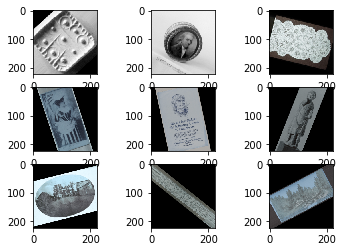

In [15]:
from matplotlib import pyplot
a,b=next(generator(data,10,augmentation=True))
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(a[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

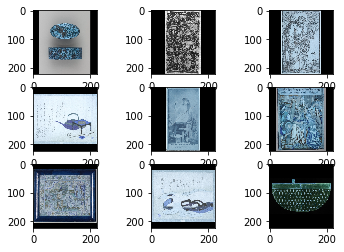

In [16]:
from matplotlib import pyplot
a,b=next(generator(data,10,augmentation=False))
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(a[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# Model

In [17]:
import keras
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,ZeroPadding2D,add,GlobalAveragePooling2D
from keras import regularizers, optimizers
from keras import applications
from keras.models import Model,load_model
from keras.optimizers import RMSprop,Adam,SGD
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau, EarlyStopping
from keras.callbacks import  TensorBoard
from keras import backend as K
import tensorflow as tf

In [18]:
def creat_model():
    base_model=applications.ResNet50(weights=None,include_top=False,input_shape=(224, 224, 3))
    base_model.load_weights("../input/pretrain/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")
    
    out = base_model.output
    out = Dropout(0.5)(out)
    out = BatchNormalization()(out)
    out = GlobalAveragePooling2D()(out)
    out = BatchNormalization()(out)
    out = Dropout(0.5)(out)
    out = BatchNormalization()(out)
    predictions = Dense(1103, activation= 'sigmoid')(out)
    custom_model = Model(inputs = base_model.input, outputs = predictions)
    return custom_model

In [19]:
model=creat_model()

Instructions for updating:
Colocations handled automatically by placer.


/opt/conda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.summary()

In [ ]:
for layer in model.layers[:-7]:
    layer.trainable = False

In [ ]:
for layer in model.layers[-7:]:
    layer.trainable = True

In [ ]:
model.summary()

# Custom loss funtion and F score

In [ ]:
## precision, recall, and f measure
#def precision(y_true, y_pred):
#    # Calculates the precision
#    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#    precision = true_positives / (predicted_positives + K.epsilon())
#    return precision
#
#def recall(y_true, y_pred):
#    # Calculates the recall
#    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#    recall = true_positives / (possible_positives + K.epsilon())
#    return recall
#
#def fbeta_score(y_true, y_pred, beta=2):
#    # Calculates the F score, the weighted harmonic mean of precision and recall.
#    if beta < 0:
#        raise ValueError('The lowest choosable beta is zero (only precision).')
#    
#    # If there are no true positives, fix the F score at 0 like sklearn.
#    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
#        return 0
#
#    p = precision(y_true, y_pred)
#    r = recall(y_true, y_pred)
#    bb = beta ** 2
#    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
#    return fbeta_score
#
#def fmeasure(y_true, y_pred):
#    # Calculates the f-measure, the harmonic mean of precision and recall.
#    return fbeta_score(y_true, y_pred, beta=2)

In [20]:
beta_f2=2

# if gamma == 0.0:
#     F2_THRESHOLD = 0.1
# elif gamma == 1.0:
#     F2_THRESHOLD = 0.2
# else:
#     F2_THRESHOLD = 0.3

# print(F2_THRESHOLD)
    
def f2(y_true, y_pred):
    #y_pred = K.round(y_pred)
#     y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), F2_THRESHOLD), K.floatx())
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=1)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=1)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=1)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=1)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f2 = (1+beta_f2**2)*p*r / (p*beta_f2**2 + r + K.epsilon())
    f2 = tf.where(tf.is_nan(f2), tf.zeros_like(f2), f2)
    return K.mean(f2)

In [21]:
#from keras import backend as K
#import tensorflow as tf
#
#import dill
#
#
#def binary_focal_loss(gamma=2., alpha=0.25):
#
#    def binary_focal_loss_fixed(y_true, y_pred):
#        
#        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
#        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
#
#        epsilon = K.epsilon()
#        # clip to prevent NaN's and Inf's
#        pt_1 = K.clip(pt_1, epsilon, 1. - epsilon)
#        pt_0 = K.clip(pt_0, epsilon, 1. - epsilon)
#
#        return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) \
#               -K.sum((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
#
#    return binary_focal_loss_fixed

In [22]:
# focal loss
#def focal_loss(gamma=2., alpha=4.):#

#    gamma = float(gamma)
#    alpha = float(alpha)
#
#    def focal_loss_fixed(y_true, y_pred):
#        epsilon = 1.e-7
#        y_true = tf.convert_to_tensor(y_true, tf.float32)
#        y_pred = tf.convert_to_tensor(y_pred, tf.float32)
#
#        model_out = tf.add(y_pred, epsilon)
#        ce = tf.multiply(y_true, -tf.log(model_out))
#        weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
#        fl = tf.multiply(alpha, tf.multiply(weight, ce))
#        reduced_fl = tf.reduce_max(fl, axis=1)
#        return tf.reduce_mean(reduced_fl)
#    return focal_loss_fixed

def focal_loss(gamma=2., alpha=2):
    gamma = 2.0
    epsilon = K.epsilon()
    def focal_loss(y_true, y_pred):
        pt = y_pred * y_true + (1-y_pred) * (1-y_true)
        pt = K.clip(pt, epsilon, 1-epsilon)
        CE = -K.log(pt)
        FL = K.pow(1-pt, gamma) * CE
        loss = K.sum(FL, axis=1)
        return loss
    return focal_loss

In [23]:
import tensorflow as tf
import keras.backend as K

def f1_macro(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    # tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

# Training

In [ ]:
os.mkdir("../checkpoint/")

In [ ]:
os.listdir("../")

In [ ]:
model.compile(optimizer=Adam(lr=1e-3),
                     loss="binary_crossentropy",
                     metrics=['accuracy',f1_macro,f2])
#custom_model.compile(optimizer=Adam(lr=1e-3), loss=focal_loss(), metrics=['accuracy',f1_macro,f2])

In [ ]:
tensorboard = TensorBoard(log_dir ='../training',
                          write_graph=True,
                          write_images=True,
                          update_freq='batch'
                            )
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                              factor=0.5,patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='acc', min_delta=0, patience=10, verbose=1)
checkpoint = ModelCheckpoint('../checkpoint/weights.{epoch:02d}-{val_acc:.5f}_binary_crossentropy_f1_macro.hdf5',
                             monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

In [ ]:
batch_size_train=32
batch_size_val=32
history=model.fit_generator(generator(data_trainning,batch_size_train),
                steps_per_epoch=max(1, len(data_trainning)//batch_size_train),
                validation_data=generator(data_val,batch_size_val),#
                validation_steps=max(1, len(data_val)//batch_size_val),#
                epochs=1,
                callbacks=[reduce_lr,checkpoint,tensorboard,reduce_lr])

In [ ]:
os.mkdir("../model")

In [ ]:
model.save("../model/model.h5")

In [ ]:
os.listdir("../model/")

In [24]:
model_s2=creat_model()

/opt/conda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [ ]:
model_s2.load_weights("../model/model.h5")

In [ ]:
for layer in model_s2.layers[:]:
    layer.trainable = True

In [ ]:
model_s2.summary()

In [ ]:
model_s2.compile(optimizer=Adam(lr=1e-3),
                     loss="binary_crossentropy",
                     metrics=['accuracy',f1_macro,f2])
#custom_model.compile(optimizer=Adam(lr=1e-3), loss=focal_loss(), metrics=['accuracy',f1_macro,f2])

In [ ]:
batch_size_train=32
batch_size_val=32
history=model_s2.fit_generator(generator(data_trainning,batch_size_train),
                steps_per_epoch=max(1, len(data_trainning)//batch_size_train),
                validation_data=generator(data_val,batch_size_val),#
                validation_steps=max(1, len(data_val)//batch_size_val),#
                epochs=10,
                callbacks=[reduce_lr,checkpoint,tensorboard,reduce_lr])

In [ ]:
model_s2.save("../model_0.3478.h5")

# Training with focal loss

In [ ]:
#print(K.eval(model_s2.optimizer.lr))
#lr=(K.eval(model_s2.optimizer.lr
#model_s2.compile(optimizer=Adam(lr=lr),
#                     loss=focal_loss(),
#                     metrics=['accuracy',f1_macro,f2])
#tensorboard = TensorBoard(log_dir ='training',
#                          write_graph=True,
#                          write_images=True,
#                          update_freq='batch'
#                            )
#
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
#                              factor=0.5,patience=5, min_lr=0.0001)
#
#early_stopping = EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=1)
#checkpoint = ModelCheckpoint('../weights.{epoch:02d}-{val_acc:.5f}_focal_f1_macro.hdf5',
#                             monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
#batch_size_train=32
#batch_size_val=32
#history=model_s2.fit_generator(generator(data_trainning,batch_size_train),
#                steps_per_epoch=max(1, len(data_trainning)//batch_size_train),
#                validation_data=generator(data_val,batch_size_val),#
#                validation_steps=max(1, len(data_val)//batch_size_val),#
#                epochs=10,
#                callbacks=[reduce_lr,checkpoint,tensorboard,reduce_lr])

In [25]:
def my_f2(y_true, y_pred):
    assert y_true.shape[0] == y_pred.shape[0]

    tp = np.sum((y_true == 1) & (y_pred == 1),axis=1)
    tn = np.sum((y_true == 0) & (y_pred == 0),axis=1)
    fp = np.sum((y_true == 0) & (y_pred == 1),axis=1)
    fn = np.sum((y_true == 1) & (y_pred == 0),axis=1)
    
    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f2 = (1+beta_f2**2)*p*r / (p*beta_f2**2 + r + 1e-15)

    return np.mean(f2)

def find_best_fixed_threshold(preds, targs, do_plot=True):
    score = []
    thrs = np.arange(0, 0.5, 0.01)
    for thr in tqdm(thrs):
        score.append(my_f2(targs, (preds > thr).astype(int) ))
    score = np.array(score)
    pm = score.argmax()
    best_thr, best_score = thrs[pm], score[pm].item()
    print(f'thr={best_thr:.3f}', f'F2={best_score:.3f}')
    if do_plot:
        plt.plot(thrs, score)
        plt.vlines(x=best_thr, ymin=score.min(), ymax=score.max())
        plt.text(best_thr+0.03, best_score-0.01, f'$F_{2}=${best_score:.3f}', fontsize=14);
        plt.show()
    return best_thr, best_score

# Evalution

In [26]:
def creat_square_test(in_img,value=0):
    img = cv2.imread("../input/imet-2019-fgvc6/test/"+in_img+'.png')
    #grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grey_img=img
    h, w = grey_img.shape[:2]
    edge_square = max(h,w)  
    ground_square=np.ones(shape=[edge_square,edge_square,3])*value
    if h<w:
        x1=np.floor((w-h)/2).astype(int)
        x2=np.floor((w-h)/2+h).astype(int)
        ground_square[x1:x2,:]=grey_img   
    elif h>w:
        x1=np.floor((h-w)/2).astype(int)
        x2=np.floor((h-w)/2+w).astype(int)
        ground_square[:,x1:x2]=grey_img
    else:
        ground_square=grey_img

    return ground_square.astype(np.uint8)

In [27]:
model_s2.load_weights("../model_0.3478.h5")

In [28]:
batch=512
n_val = round(len(data_val))//batch
fullValGen =generator(data_val,batch)
lastFullValPred = np.empty((0, 1103))
lastFullValLabels = np.empty((0, 1103))
for i in tqdm(range(n_val+1)): 
    #print(i)
    im, lbl = next(fullValGen)
    scores = model_s2.predict(im)
    lastFullValPred = np.append(lastFullValPred, scores, axis=0)
    lastFullValLabels = np.append(lastFullValLabels, lbl, axis=0)
print(lastFullValPred.shape, lastFullValLabels.shape)


100%|██████████| 65/65 [06:30<00:00,  6.11s/it]

(33280, 1103) (33280, 1103)


In [29]:
best_thr, best_score = find_best_fixed_threshold(lastFullValPred, lastFullValLabels, do_plot=False)
print("best_thr={}, best_score={}".format(best_thr, best_score))

100%|██████████| 50/50 [00:34<00:00,  1.43it/s]

thr=0.080 F2=0.665
best_thr=0.08, best_score=0.6653247734646187


In [30]:
from tqdm import tqdm
submit = pd.read_csv('../input/imet-2019-fgvc6/sample_submission.csv')
result_predict=[]
for i, name in tqdm(enumerate(submit['id'])):
    image = creat_square_test(name)
    image = resize(image)
    score_predict = model_s2.predict(image[np.newaxis]/255)
    # print(score_predict)
    label_predict = np.arange(1103)[score_predict[0]>=best_thr]
    print("label_predict:",label_predict)
    str_predict_label = ' '.join(str(l) for l in label_predict)
    result_predict.append(str_predict_label)

6it [00:00,  8.41it/s]

label_predict: [ 161  223  343  369  420  477  587  766 1059]
label_predict: [  79  188 1039 1098]
label_predict: [180 482 497 498 728]
label_predict: [ 51 147 420 483 553 573 738 776 830]
label_predict: [ 147  322  538  813  835 1046 1092]
label_predict: [  13  189  405  896  903 1092]
label_predict: [ 194  670  813 1020 1092]
label_predict: [  51  147  420  813 1046]
label_predict: []


16it [00:00, 14.41it/s]

label_predict: [ 188  369  597  671 1034]
label_predict: [189 462 541 595 813]
label_predict: [121 415 464 840]
label_predict: [ 418  542  731  796  940  942 1072]
label_predict: [ 194  671 1034]
label_predict: [ 733  813 1033 1046]
label_predict: [ 147  189  283  554  671  691  780  908 1062]
label_predict: [188 335 377 420 428 477 489 554 612 668]
label_predict: []
label_predict: [ 188  428  542  554  803  813  911 1099]


26it [00:00, 22.35it/s]

label_predict: [  13   14  552 1056]
label_predict: [ 188  189  335  552  597  671 1065]
label_predict: [ 79 734 738 813]
label_predict: [ 189  477  485  671  708  780  835  858 1062]
label_predict: [ 188  420  489  671 1059]
label_predict: [79]
label_predict: [  79  194  737  776  830  923 1046]
label_predict: [  70  259  738  776  830 1046]
label_predict: [ 156  189  485  835 1092]
label_predict: [ 492  616  813  896 1092]


36it [00:00, 30.98it/s]

label_predict: [  51  554  744  764  813  903  910 1092]
label_predict: [ 147  156  227  477  501  584  733  737  738  776  813 1046 1059 1092]
label_predict: [189 541 813]
label_predict: [ 369  671 1019]
label_predict: [ 147  335  420  538  813  835 1046]
label_predict: [189 369 477 671 780]
label_predict: [ 111  189  480  573  733  734  737  738  776  813  830  923  971  973
 1046]
label_predict: [477 668 745 776]
label_predict: [ 335  595  738  813 1012 1092]
label_predict: [ 418  541  542  579  581  796  937  949 1072]


46it [00:01, 37.72it/s]

label_predict: [ 79 489 650]
label_predict: [189 436 720]
label_predict: [  51   70  147  420  477  671  776  835 1046]
label_predict: [231 369 833 872]
label_predict: [ 99 577 634]
label_predict: [121 559 649 871 961]
label_predict: [147 716]
label_predict: [ 99 961]
label_predict: [ 13 420 668]
label_predict: [ 194  477 1034]


56it [00:01, 40.97it/s]

label_predict: [189 436]
label_predict: [ 189  378  768 1034]
label_predict: [  51  147  477  671  738  780 1046 1059]
label_predict: [121 464 872 955]
label_predict: [  79 1022 1059]
label_predict: [ 51 156 489 612]
label_predict: [147 713 734 800 813]
label_predict: [121 433]
label_predict: [  58  121  182  744 1045 1059]


66it [00:01, 40.83it/s]

label_predict: [ 189  373  597 1035]
label_predict: [ 13  14 552]
label_predict: [ 626  698  813 1092]
label_predict: [ 70 189 418 738 835]
label_predict: [161 351 420 503 738 915 961]
label_predict: [  79  671 1059]
label_predict: [ 13 670 693 729 813]
label_predict: [ 51 156 586 872]
label_predict: [ 480  483  776  923 1046]
label_predict: [ 184  313  369  758 1059]


76it [00:01, 40.99it/s]

label_predict: [ 189  418  541  542  813  949 1072 1092]
label_predict: [552]
label_predict: [684]
label_predict: [ 189  501  580  813  993 1092]
label_predict: [ 188  418  541  835 1072]
label_predict: [121 477 813]
label_predict: [ 587  766 1059 1084]
label_predict: [ 188 1034]


81it [00:01, 41.68it/s]

label_predict: [ 231 1039]
label_predict: [147 532 671]
label_predict: [1034]
label_predict: [121 684 724]
label_predict: [  70  189  259  418  420  541  813  971  973 1046 1092]
label_predict: [ 156  541  542  579  580  581  813 1092]
label_predict: [188 428 489]
label_predict: [369 436 720]
label_predict: [194 489]


91it [00:02, 42.65it/s]

label_predict: [ 418  813  835 1020]
label_predict: [ 559  738  931 1032]
label_predict: [121 724 955 962]
label_predict: [  51   70  483  553  725  738  776  986 1046]
label_predict: [ 51 111 483 553 738 776]
label_predict: [156 259 541 542 813]
label_predict: [ 13  14 552 716]
label_predict: [ 147  420  813 1046]
label_predict: [147 597]


101it [00:02, 44.99it/s]

label_predict: [ 156  541  542  813 1012 1092]
label_predict: [ 308  404  813 1092]
label_predict: [ 13 485]
label_predict: [121 432 724]
label_predict: [498 728]
label_predict: [ 105  420  477  554  671  738  780  835 1059 1062]
label_predict: [  51  156  833 1084]
label_predict: [ 51 156 335 477 671 780]
label_predict: [ 79 477 487 671 835]
label_predict: [  79  180  182  728  813  961  977 1073]


112it [00:02, 47.98it/s]

label_predict: [147 520 554 650 671 691 809 835 858 908]
label_predict: [  13   14  865  976 1056]
label_predict: [ 121  236 1059]
label_predict: [  13  896 1092]
label_predict: [ 189  541  542  796  949 1072]
label_predict: [ 13 189 552 671 780]
label_predict: [  99  833  961 1059 1092]
label_predict: [ 813  903 1092]
label_predict: [  25  161  331  813  974  993 1059 1092]
label_predict: [420 616]
label_predict: [  51  560 1022]


123it [00:02, 48.77it/s]

label_predict: [239 487 650 813]
label_predict: [ 147  501  655  671  738  780 1046 1074]
label_predict: [  79 1062]
label_predict: [487]
label_predict: [ 194  477  671 1092]
label_predict: [ 188 1059]
label_predict: [ 121  161 1059]
label_predict: [  51  147  323  535  586  700 1039]
label_predict: [ 189  554  744  813  903 1092]
label_predict: [ 111  147  369  655  671  738  813 1046 1092]
label_predict: [ 189  369 1034]


133it [00:03, 48.05it/s]

label_predict: [ 147  189  420  430  434  734  784  813  835  931 1092]
label_predict: [496 597 754]
label_predict: [684]
label_predict: [ 161  204  236  248  257 1061]
label_predict: [ 14  51 147 555 626]
label_predict: [ 519  692  734  737  738 1046]
label_predict: [ 156  541  542  579  581  813  949 1072 1092]
label_predict: [ 156  194  485  671 1034]
label_predict: [ 671  780 1059]
label_predict: [ 189  418  541 1072 1092]


143it [00:03, 46.29it/s]

label_predict: [ 179  239  287  586  884 1039]
label_predict: [  51  156  554 1059]
label_predict: [ 418  738  796  949 1072]
label_predict: [ 86 255 738]
label_predict: [ 495 1039 1059]
label_predict: [  51  147  671  780 1034 1035]
label_predict: [ 189  378  607  768 1034]
label_predict: [420 962]
label_predict: [156 733 734 739 813]


153it [00:03, 47.02it/s]

label_predict: [  67  156  195  335  579  726  763 1020 1039 1084]
label_predict: [ 189  538 1092]
label_predict: [ 156  420  477  541  813  835 1046]
label_predict: [ 189  263  420  496  734  784 1037]
label_predict: [369 464 840 872]
label_predict: [  51  488  733  734  813  974  994 1020]
label_predict: [ 156  541  542  733  813  993 1084]
label_predict: [ 194  501  580  738  747  806 1008 1009 1034 1036 1092]
label_predict: [ 13 567]
label_predict: [ 13 813]


163it [00:03, 44.11it/s]

label_predict: [ 189  418  541  542  753  813 1072 1092]
label_predict: [  79  477  487  671  780 1062]
label_predict: [ 147  189 1034]
label_predict: [131 552 671 768]
label_predict: [ 483  776 1046]
label_predict: [ 231  819 1039]
label_predict: [ 127  373  597 1034 1035]
label_predict: [ 189  813 1092]
label_predict: [369 420 541 579 738]


174it [00:03, 47.06it/s]

label_predict: [ 33 962]
label_predict: [ 194  916 1092 1093]
label_predict: [  70  189  553  583  663  835 1064]
label_predict: [ 259  541  542  543  579  742  813  949 1092]
label_predict: [147 718 813]
label_predict: [188 420 477 489 835]
label_predict: [450]
label_predict: [ 304 1039 1059]
label_predict: [189 420 733 734 744 813]
label_predict: [ 231 1039 1059]
label_predict: [ 127  369 1059]


185it [00:04, 47.18it/s]

label_predict: [ 33 420 738 813 835 962]
label_predict: [121 493 754]
label_predict: [ 161  189  477  489 1059]
label_predict: [156 485 603 607]
label_predict: [ 147  744  813  896  903 1092]
label_predict: [121 415 704 961]
label_predict: [ 156  189  436  554 1065]
label_predict: [147 554 813 896]
label_predict: [ 111  156  189  784  835  953 1062]
label_predict: [189 536]


195it [00:04, 46.65it/s]

label_predict: [156 189 485 607 695 999]
label_predict: [189 335 418 813 835 949]
label_predict: [  99  125  161  192  385  495 1039]
label_predict: [ 79 477 612 671 780]
label_predict: [ 189  508  671 1059]
label_predict: [ 147  189  501  813 1092]
label_predict: [147 420 553 573 738 776 835 973]
label_predict: [  51  813 1092]
label_predict: [121 464 872]
label_predict: [ 111  420  737  738  776 1046 1059]


205it [00:04, 46.99it/s]

label_predict: [147 734]
label_predict: [ 44 161 331 351 423 642 800 961]
label_predict: [ 538  616  674  747  813  916 1092]
label_predict: [  13  405  896 1092]
label_predict: [  23   33  256  275  582 1023]
label_predict: [ 24 232 400 738]
label_predict: [111 156 477 584 628 733 813 975]
label_predict: [ 13 698 813]
label_predict: [ 194  813 1092]
label_predict: [184 450 835 953 993]


215it [00:04, 47.30it/s]

label_predict: [813]
label_predict: [147 189 813 896]
label_predict: [ 111  813  835 1062]
label_predict: [ 13 813 872 896]
label_predict: [147 463 738 813 963]
label_predict: [189 259]
label_predict: [188 489]
label_predict: [313 420 962]
label_predict: [156 189 259 420 813 988]
label_predict: [ 188  420  477  813  833 1046 1092]


220it [00:04, 45.60it/s]

label_predict: [  13  405  896 1092]
label_predict: [ 189 1034]
label_predict: [369 541 579]
label_predict: [147 552 597]
label_predict: [ 156  194 1046 1059 1098]
label_predict: [477 961]
label_predict: [  79  454  744  776 1046 1099]
label_predict: [ 147  161  189  304  351  718 1092]
label_predict: [ 111  477  671  780 1059]


230it [00:05, 46.43it/s]

label_predict: [  25  121  161 1059]
label_predict: [ 147  189  191  335  671  780 1034]
label_predict: [  23  184  313  487 1059]
label_predict: [  79 1062]
label_predict: [796 940]
label_predict: [ 188  462  542  580  671  733  734  813  993 1092]
label_predict: [ 156  189  477  671 1046 1059]
label_predict: [121 125 161 642 704 800 813 961]
label_predict: [718 813]
label_predict: [ 418  813 1092]
label_predict: [ 121 1039]


241it [00:05, 47.06it/s]

label_predict: [ 147  283  348  538  742  795  813  889 1046 1080 1092]
label_predict: [ 113  217  236  248  257  357 1061]
label_predict: [  70  189  418  949 1092]
label_predict: [369 754]
label_predict: [156 189 624 835]
label_predict: [147 189 494 501 519 545 548 554 580 733 738 863]
label_predict: [  79  121  671 1098]
label_predict: [ 99 161 821 974]
label_predict: [156 485 554 813 896 949]
label_predict: [ 369 1019]


251it [00:05, 46.73it/s]

label_predict: [  99  161  304  718  813 1092 1096]
label_predict: [ 13  51 675 978]
label_predict: [ 180  188 1099]
label_predict: [  79  194  671 1034]
label_predict: [ 304  477 1061]
label_predict: [121 304 464 955]
label_predict: [  13  483  553  676  725  776 1046 1081]
label_predict: [  79 1062]
label_predict: [  51  147  813  952 1092]
label_predict: [ 147  418  541  579  949 1092]


261it [00:05, 46.19it/s]

label_predict: [  13  189  404  405  896 1092]
label_predict: [ 79 121 415 477]
label_predict: [188 487]
label_predict: [  13  477  813  896  903 1092]
label_predict: [ 597  671  950 1034]
label_predict: [  51  813 1092]
label_predict: [  51  194  616  813 1092]
label_predict: [ 189  671  780  835 1034]
label_predict: [ 156  189  744  803  832 1099]
label_predict: [ 189  420  738  776  923 1046]


271it [00:06, 47.57it/s]

label_predict: [  18   25  125  161  331  420  477  534  611  734  738  758  784 1059]
label_predict: [ 127  188  552  754 1039]
label_predict: [ 156  259  541 1046]
label_predict: [ 79 420 450 624]
label_predict: [ 156  541  542  747  813  906 1072 1092]
label_predict: [ 668 1039]
label_predict: [ 391  819 1039]
label_predict: [420 493 922]
label_predict: [ 51 188 552 612 922]
label_predict: [ 156  418  541  543  554  579  753  786  813 1092]
label_predict: [  51  131  189  738  780  813 1034 1046 1092]


282it [00:06, 49.14it/s]

label_predict: [ 13 156 477 633 663 835]
label_predict: [ 156  541  542  579  581  813 1072 1092]
label_predict: [194 813]
label_predict: [ 58 650 718 744 764 813 903]
label_predict: [194 813 844]
label_predict: [  13  189  501  519  737  738 1046]
label_predict: [ 189  835 1092]
label_predict: [161 634 872]
label_predict: [ 194  420  734  738  813  992 1046]
label_predict: [189 552 671 768]


292it [00:06, 47.67it/s]

label_predict: [ 131  147  671  768 1034]
label_predict: [ 738  776 1046]
label_predict: [  51  338  556  671  780 1030]
label_predict: [ 369  563 1061 1099]
label_predict: [127 552 597]
label_predict: [ 13 626]
label_predict: [ 231 1039]
label_predict: [  13  405  896 1092]
label_predict: [ 189  259  534  633  663  734  784  813  835 1084]
label_predict: [ 194  369  489  584  671  780 1059]


303it [00:06, 48.12it/s]

label_predict: [  51   70  156  420  580  671  733  738  776 1046]
label_predict: [121 433]
label_predict: [ 477  639  671  780 1034]
label_predict: [ 156  189  485  813  949 1092]
label_predict: [718 813]
label_predict: [ 189  903 1092]
label_predict: [663]
label_predict: [189 335 420 510 573 616 637 733 734 738 784 813]
label_predict: [  13  147 1039]
label_predict: [415 477 872]
label_predict: [ 188  428  434  485  685  803  911 1099]


314it [00:06, 47.55it/s]

label_predict: [ 304 1059]
label_predict: [464 840 872]
label_predict: [ 477  655  671  780  813 1046 1092]
label_predict: [121 962]
label_predict: [ 188  369 1034 1099]
label_predict: [ 147  189  511  796  954 1092]
label_predict: [  79  477 1059]
label_predict: [ 147  554  744  896 1092]
label_predict: [ 147  650  718 1092]
label_predict: [ 147  189  738  835 1046]


324it [00:07, 45.05it/s]

label_predict: [ 13  51 111 259 616 737 813]
label_predict: [282 369 390 489 650 716]
label_predict: [  1 147 313 420 738 744 813 835 962]
label_predict: [ 189  465  628 1062]
label_predict: [189 401 420 477 784 835 858]
label_predict: [189 501]
label_predict: [ 51 111 616 813]
label_predict: [ 51  76 583 813 961]
label_predict: [ 79 194 450 461 576 639 878]
label_predict: [121 684 724]


334it [00:07, 45.96it/s]

label_predict: [ 147  597  671 1059]
label_predict: [131 189 671 768]
label_predict: [ 121  597 1061]
label_predict: [  51  147  501  519  580  733  734  738  813 1092]
label_predict: [111 147 430 813 896 931]
label_predict: [121 433]
label_predict: [ 188  418  541  554  579  803  813  835  949 1072 1092 1099]
label_predict: [121 489]
label_predict: [  14  552  671  780 1066]
label_predict: [ 282  359  624  639  738  835 1034]


344it [00:07, 45.30it/s]

label_predict: [  13  404  405  813  896  903 1020 1092]
label_predict: [ 194  477  745  826  886 1062]
label_predict: [ 194  718 1059 1092]
label_predict: [  51  131  147  813  835 1092]
label_predict: [ 189  335  418  813 1072 1092]
label_predict: [180 182 728 738]
label_predict: [ 51 744 813 896]
label_predict: [  51   58  212  420  477  554 1092]
label_predict: [914]
label_predict: [121 724 955]


355it [00:07, 47.82it/s]

label_predict: [ 309  671  780 1059]
label_predict: [ 51 212 628]
label_predict: [  79  477  584  624  671  745  780 1030]
label_predict: [ 188  428 1085]
label_predict: [  13  492  698  813  916 1092 1093]
label_predict: [189 485 607 671 780]
label_predict: [  13  538  592  742  813 1092]
label_predict: [189 480 483 519 734 738 813 975]
label_predict: [483 776 830]
label_predict: [194 369 477]


365it [00:07, 47.25it/s]

label_predict: [ 189  896  949 1092]
label_predict: [ 13 477 886]
label_predict: [ 194  480  483  776  923 1046]
label_predict: [ 194  671  886 1046 1059]
label_predict: [ 121  147  738 1062]
label_predict: [  13  552  671  780 1059]
label_predict: [ 13 725 776 830]
label_predict: [ 111  156  189  420  477  501  612  813  954 1046 1092]
label_predict: [ 147  490  671 1059]
label_predict: [125 192 239 385 477 495 745 754]


375it [00:08, 47.47it/s]

label_predict: [ 147  671  690 1046]
label_predict: [675 716 978]
label_predict: [147 480 483 501 738 744 776]
label_predict: [ 51 147 492 698 813 961]
label_predict: [  51  194  492  698  829 1092]
label_predict: [147 554 579 744 746 813 896]
label_predict: [ 156  259  418  541  542  579  808  813  939 1072]
label_predict: [ 70 189 813]
label_predict: [ 194  480  553  576  776  830  923 1046 1059]
label_predict: [ 147  189  541  813  949 1092]


385it [00:08, 47.94it/s]

label_predict: [369 489]
label_predict: [  13 1092]
label_predict: [ 51  76 477 583 671 961]
label_predict: [ 189  552  596  671  768 1034 1035]
label_predict: [ 464  754  872  884 1039]
label_predict: [  13   51  698  813 1092]
label_predict: [ 189  477  553  738  776  835 1046]
label_predict: [ 369  495 1039]
label_predict: [  13  896 1092]
label_predict: [116 161 304 487 758]


395it [00:08, 46.91it/s]

label_predict: [ 23 420 738 962]
label_predict: [ 259  406  541  542  808 1072]
label_predict: [ 321  597 1034]
label_predict: [  51  189  434  536  615 1005]
label_predict: [  70  147  420  742  813  835 1046 1092]
label_predict: [ 13 698 813]
label_predict: [ 194  433  477 1046 1098 1099]
label_predict: [147 430 434 559]
label_predict: [ 51 189 666 821]


405it [00:08, 43.90it/s]

label_predict: [121]
label_predict: [  79  655  813 1046 1092]
label_predict: [ 147  434  597  621  858 1007 1089]
label_predict: [ 13 626]
label_predict: [ 189  259  418  420  813  835 1046]
label_predict: [ 884 1039]
label_predict: [ 477  671  780 1035]
label_predict: [194 489 584]
label_predict: [121 433 484]


416it [00:09, 47.16it/s]

label_predict: [189 418 553 784 835 988]
label_predict: [125 704 813 961]
label_predict: [ 13 638 746]
label_predict: [  51  404  813  903 1092]
label_predict: []
label_predict: [ 13 147 978]
label_predict: [  13  462  733  813  993 1092]
label_predict: [489]
label_predict: [ 584  671 1059]
label_predict: [313 420 962]
label_predict: [189 718 813 903]


422it [00:09, 48.76it/s]

label_predict: [ 147  189  580  592  616  813  833 1092]
label_predict: [ 121  718 1092]
label_predict: [ 161 1059]
label_predict: [  13  663  738 1046]
label_predict: [ 44 161 331 351 583 663 800 961]
label_predict: [ 18  25 161 331 584]
label_predict: [ 896 1092]
label_predict: [189 813 961]
label_predict: [ 194  404  813 1092]
label_predict: [ 189  501  733  738  776  813 1046]


432it [00:09, 47.10it/s]

label_predict: [ 79 487]
label_predict: [ 189  259  835 1075]
label_predict: [ 147  410  492  538  616  698  742  813 1092]
label_predict: [156 189 436 733 744 813 993]
label_predict: [ 259  663  800  835 1092]
label_predict: [ 369  492  538  742  872  961 1092]
label_predict: [ 156  189  418 1046 1072]
label_predict: [ 931  961 1038 1046]
label_predict: [ 147  492  610  616  698  747  813 1092]
label_predict: [ 147  335  813 1092]


443it [00:09, 48.52it/s]

label_predict: [ 147  477  492  612  671  813  835 1046 1092]
label_predict: [189 378 465 584 628]
label_predict: [  13  698  896 1092]
label_predict: [ 125  161 1059]
label_predict: [147 335 813 846]
label_predict: [ 121  369  489  584 1059]
label_predict: [ 25 161 584]
label_predict: [308 436 554 671 738]
label_predict: [369 774]
label_predict: [  79 1062]
label_predict: 

453it [00:09, 48.74it/s]

[501 813]
label_predict: [ 189  728  733  734  813  921  961  993 1084]
label_predict: [ 111  147  420  480  616  655  738  813 1046 1092]
label_predict: [ 156  424  541  542  813  835 1092]
label_predict: [  43   51  490 1059]
label_predict: [ 553  776  923 1046]
label_predict: [ 147  369  671  780 1034]
label_predict: [ 194  698  744  813  923 1046 1092]
label_predict: [  79  121 1034]
label_predict: [202 487]
label_predict: [415 420]


463it [00:10, 42.54it/s]

label_predict: [ 194  404  813 1092]
label_predict: [  85  194  738 1092]
label_predict: [13 79]
label_predict: [ 13 813]
label_predict: [121 493 744 922]
label_predict: [121 147 433 680]
label_predict: [  13  420  716 1059]
label_predict: [188 420 428 477 671 734 738 803 911]


473it [00:10, 44.09it/s]

label_predict: [  25  116  161  758 1059 1062]
label_predict: [ 194  404  698  813 1092 1099]
label_predict: [ 13 480 483 670 975]
label_predict: [ 194  671  780 1099]
label_predict: [ 147  189  434  480  483  501  738  744  813  835 1038]
label_predict: [188 420 477 503 734 738 813]
label_predict: [  79  671 1035]
label_predict: [121 961]
label_predict: [ 147  189  335 1092]
label_predict: [189 434 501 559 621 747 813 961]


484it [00:10, 45.83it/s]

label_predict: [ 79 121 194 464 489 671]
label_predict: [489 695]
label_predict: [  14   51 1059]
label_predict: [  33  582 1023]
label_predict: [147 189 434 559 871]
label_predict: [  13  813  896 1092]
label_predict: [ 114  217 1061]
label_predict: [ 51 147 480 483 501 738 975]
label_predict: [ 369  665  733  813  974 1084]
label_predict: [ 79 133 189 835]


495it [00:10, 47.14it/s]

label_predict: [147 335 418 450 796 949]
label_predict: [369 489]
label_predict: [161 180 718]
label_predict: [156]
label_predict: [ 189  462  595  733  813  993 1084]
label_predict: [ 189  513  678  783  835  858  908 1058]
label_predict: [ 35 420 962]
label_predict: [ 189  413  430  738  882 1092]
label_predict: [ 51 554 558 744 764 903 910]
label_predict: [ 13 420 755 813]


501it [00:10, 47.95it/s]

label_predict: [147 283 551 720 920]
label_predict: [ 99 304 774]
label_predict: [ 51 147 733 744 813]
label_predict: [282 487]
label_predict: [ 194 1098]
label_predict: [121 821]
label_predict: [ 121  439 1084]
label_predict: [ 156  420  477  538  541  616  733  734  744  813  835 1046 1092 1099]
label_predict: [ 147  813 1092]
label_predict: [147 768]


511it [00:11, 46.73it/s]

label_predict: [ 147  420  573  738  776  813 1046 1092]
label_predict: [ 147  671  780 1034]
label_predict: [ 369  813  961 1092]
label_predict: [  51  259  616  744  813 1092]
label_predict: [ 51 732 833]
label_predict: [1059]
label_predict: [ 194 1098]
label_predict: [ 14 552 671 749 780]
label_predict: [ 744  786 1059]
label_predict: [189 485 607]


522it [00:11, 48.14it/s]

label_predict: [ 194  477  671  780 1046 1099]
label_predict: [   1   33  582 1023]
label_predict: [  99  718  813 1096]
label_predict: [ 184  313 1059]
label_predict: [51]
label_predict: [138 369 477 612 671 780]
label_predict: [ 147  189  744  813 1092 1099]
label_predict: [ 189  733  734  813  974  993 1084]
label_predict: [144 152 156 173 210 216 227 420 616 813 961]
label_predict: [ 147  501  737  738  813 1046]


532it [00:11, 47.35it/s]

label_predict: [189 378 768]
label_predict: [ 51 156 212 586]
label_predict: [ 194 1098]
label_predict: [131 189 768]
label_predict: [813 896]
label_predict: []
label_predict: [ 50  51 584 628]
label_predict: [ 147  189  616  663  680  701  824  833  835  953 1092]
label_predict: [189 554 597 858]


543it [00:11, 47.28it/s]

label_predict: [161 351 718 813]
label_predict: [  25  161  534  611  701  734  758  784 1059]
label_predict: [ 369  383  477  506  671  780  886 1059 1062]
label_predict: [  13   51  813  872  896 1092]
label_predict: [496 754]
label_predict: [  13  147  813 1092]
label_predict: [ 194 1034]
label_predict: [ 79 962]
label_predict: [  70  189  418  420  462  733  734  738  813  835  993 1084 1092]
label_predict: [147 189 418 718 720]
label_predict: [ 121 1039 1084]


553it [00:11, 47.45it/s]

label_predict: [ 111  988 1046]
label_predict: [  99  192  495 1039]
label_predict: [ 369  563  566  615 1099]
label_predict: [ 189  418 1072]
label_predict: [ 156  418  541  542  796 1072]
label_predict: [ 189  418  422  541  542  796  936  939  949 1072]
label_predict: [ 147  259  538  580  616  744  813 1092 1099]
label_predict: [369 634 754 872]
label_predict: [ 573  616  776  813  971  973 1046]
label_predict: [ 189  369  835 1034]
label_predict: [ 184  628  702 1062]


563it [00:12, 47.73it/s]

label_predict: [  13  405  896 1092]
label_predict: [147 189 430 738 813]
label_predict: [  70  147  579  581  813 1046]
label_predict: [ 194  477  668  671  780  886 1099]
label_predict: [  51  616  744  813  952 1092]
label_predict: [ 156  733  734  813  993 1092]
label_predict: [ 51 212 323 515]
label_predict: [ 194  737  738  776  813  830 1046 1092]
label_predict: [121 415 688]
label_predict: [  51  477  538  671  813 1046 1092]


573it [00:12, 46.09it/s]

label_predict: [ 156  208  418  541  542  753  796  949 1072]
label_predict: [189 768]
label_predict: [ 121  304  420  800 1059 1061]
label_predict: [ 189  335  698  742 1092]
label_predict: [ 480  483  494  501  738  776 1046]
label_predict: [ 420  501  738  931 1046]
label_predict: [ 13 483 501 776]
label_predict: [ 420  465  671  733 1059]
label_predict: [ 489  612  671  780 1059]


585it [00:12, 49.13it/s]

label_predict: [ 13 480]
label_predict: [147 189 485 603 607 671 780 999]
label_predict: [ 188 1059]
label_predict: [ 13 813 896 903]
label_predict: [147 513 515 671 783]
label_predict: [  51  212  671  780 1030 1059]
label_predict: [ 304 1059]
label_predict: [189 835]
label_predict: [  23  169  184  819 1039]
label_predict: [147 156 612 746]
label_predict: [ 418  663  796  835 1072 1092]


595it [00:12, 46.78it/s]

label_predict: [ 70 189 418 420 738 813 835]
label_predict: [1059]
label_predict: [ 121  813  961 1092]
label_predict: [156 744 813 896]
label_predict: [ 55 131 552 671 768 780]
label_predict: [ 189 1034]
label_predict: [  51  483  725  771  776  830 1046 1081]
label_predict: [ 51 552]
label_predict: [ 156  189  259  776  813 1046 1092]
label_predict: [663 800 961]


605it [00:13, 46.75it/s]

label_predict: [ 13 813 872 896]
label_predict: [ 188  428  552 1034]
label_predict: [ 114  217  280 1061]
label_predict: [194 420 738 816 822 844]
label_predict: [ 189  477  554  709  809  835  858  953 1007]
label_predict: [ 13  51 813 896]
label_predict: [ 147 1092]
label_predict: [ 188  369  434 1034]
label_predict: [493 634 754]
label_predict: [147 188 434 615 738 744 803]


610it [00:13, 43.94it/s]

label_predict: [ 161  718  961 1092]
label_predict: [ 156  436 1084]
label_predict: [135 156 369 612 671 954]
label_predict: [147 434 515 559 738]
label_predict: [125 161 236 955 962]
label_predict: [  79  138  393  477  489  584  624  671  682  780  835  954 1046]
label_predict: [ 147  744  813  903 1059 1092]
label_predict: [369]
label_predict: [ 114  217  236  248  257  357 1061]


621it [00:13, 46.28it/s]

label_predict: [  51   57   79  156  339  833  867  961 1092]
label_predict: [ 147  189  597  671  780 1034]
label_predict: [ 189  671  780 1034]
label_predict: [ 188  335  671  780 1059]
label_predict: [ 147  189  410  418  541  542  813  835 1072 1092]
label_predict: [  70  776 1046]
label_predict: [ 156  418  541  542  813 1072 1092]
label_predict: [ 492  538  616  654  698  813 1092]
label_predict: [ 776 1046]
label_predict: [  79  189  210  612  738  813 1046 1092]


631it [00:13, 47.78it/s]

label_predict: [ 492  698  747  813  916 1092 1093]
label_predict: [ 896 1092]
label_predict: [  51  434  536 1005 1007]
label_predict: [ 147  477  744  813  835 1020]
label_predict: [147 626]
label_predict: [ 58 332 533 579]
label_predict: [161 236 248 489 584]
label_predict: [194 477 671 780]
label_predict: [  55  131  147  671  768  780 1034]
label_predict: [ 111  189  420  776  813  835  973 1046 1092]


641it [00:13, 48.13it/s]

label_predict: [ 138  369  420  477  612  671  738  954 1046]
label_predict: [  13  776  813 1046 1092]
label_predict: [  99  819 1039]
label_predict: [ 147  189  418  835 1072]
label_predict: [ 189  378 1059]
label_predict: [147 436 450 552]
label_predict: [  13  405  896 1092]
label_predict: [  99 1092]
label_predict: [ 147  189  418  738  835 1092]
label_predict: [  13   51  189  191  420  671  682  780 1046]


651it [00:14, 46.49it/s]

label_predict: [  51  698  744  813 1092]
label_predict: [156 189 462 733 813 993]
label_predict: [1039]
label_predict: [335 420 517 738 780]
label_predict: [  13  698  896 1092]
label_predict: [ 189  259  420  477  554  744  804  813  835 1099]
label_predict: [ 121  195  223  369  766 1039 1059 1084]
label_predict: [ 70 189 413 430 434 559 835]
label_predict: [615 813 896]


661it [00:14, 45.92it/s]

label_predict: [ 156  418  541  542  747  813 1072 1092]
label_predict: [ 188  464  507 1059]
label_predict: [ 194  813 1046 1092]
label_predict: [ 13 552]
label_predict: [  51  420  573  738  776  813 1046]
label_predict: [125 161 503 634 642]
label_predict: [  51  477  540  612  671  734  738  813 1046]
label_predict: [ 147  744  813 1092]
label_predict: [ 194  494  737  738  776  813  826  992 1046]
label_predict: [813 896]


671it [00:14, 44.25it/s]

label_predict: [147 161 204 335 450 597]
label_predict: [  79 1062]
label_predict: [121 962]
label_predict: [ 51 189 434 477 709 738 835 858]
label_predict: [ 189  259  420  480  733  776  813  923 1046 1092]
label_predict: [ 79 477 612]
label_predict: [  51  147  434  501  737  738  863 1046]
label_predict: [ 13  51 127 675 978]
label_predict: [ 13  51 744 811 813 903]


681it [00:14, 42.25it/s]

label_predict: [ 188  671  780 1059]
label_predict: [ 64 107 133 165 189 335 378 612 835]
label_predict: [  99  161  718  813 1096]
label_predict: [147 671 768 780]
label_predict: [ 13 420 477 537 813]
label_predict: [434]
label_predict: [147 203 283 554 612 746]
label_predict: [ 25 161 584]
label_predict: [  51  477  671  682  780 1035 1046 1092]


691it [00:15, 43.49it/s]

label_predict: [ 147  156  796  949 1072]
label_predict: [  13  405  896  903 1092]
label_predict: [189 304 511 813 896]
label_predict: [ 156  189  401  682  780  835  858  953 1092]
label_predict: [ 189  418  835 1072]
label_predict: [189 369 835]
label_predict: [ 189  616  744  813  905 1092]
label_predict: [189 800]
label_predict: [  13  492  538  698  896 1092]


697it [00:15, 45.50it/s]

label_predict: [ 13 733 734 755 813]
label_predict: [ 99 758]
label_predict: [  99 1059 1062]
label_predict: [ 231  489 1039]
label_predict: [  51   70  418  477  835 1046 1092]
label_predict: [662 713]
label_predict: [ 501 1089]
label_predict: [ 25  91 161]
label_predict: [  99  161  492  813 1092]
label_predict: [ 231  369 1039]
label_predict: [  13  756  813 1092]


708it [00:15, 47.49it/s]

label_predict: [ 189  420  738  813 1046 1092]
label_predict: [  79  477  624  671  780 1062]
label_predict: [147 259 541 579 813]
label_predict: [ 368  369  428  436 1059]
label_predict: [194 844]
label_predict: [ 369 1039]
label_predict: [ 121  433 1061]
label_predict: [  99  650  718  738  813  961 1092]
label_predict: [189 369 477 554 612 671 780]
label_predict: [438 884]
label_predict: [189]


720it [00:15, 49.12it/s]

label_predict: [ 111  147  538  813 1092]
label_predict: [105 147 307 369 383 477 540 612 671 738 780 813]
label_predict: [ 718 1092]
label_predict: [ 156  189  477  485  780  835 1092]
label_predict: [313 420 962]
label_predict: [ 51 111 189 671]
label_predict: [ 13  51 147 675 716 978]


725it [00:15, 35.62it/s]

label_predict: [ 127  147  373  597  768 1035]
label_predict: [ 111  189  813  949 1092]
label_predict: [  99 1039]
label_predict: [  51  124  189  339  378  511  811  903 1092]
label_predict: [ 194  480  483  494  738  776  830 1046]
label_predict: [1092]
label_predict: [ 189  485  671  780 1069]
label_predict: [  79  420  671  780 1059 1062]
label_predict: [477 738 961]
label_predict: [ 99 161 304 489]


736it [00:16, 41.44it/s]

label_predict: [ 121  663  800  961 1092]
label_predict: [552 671]
label_predict: [ 420  477  624  738  758  835 1059 1062]
label_predict: [ 147  189  616  813 1092 1093]
label_predict: [ 156  448 1059]
label_predict: [ 147  671  780 1034 1035 1046]
label_predict: [ 156  369 1039 1059]
label_predict: [  51  189  288  420  477  647  671  734  751  813  835 1059 1062 1092]
label_predict: []
label_predict: [ 161  331  351  369  718  738  809  953 1092]


747it [00:16, 45.22it/s]

label_predict: [ 188  189 1034]
label_predict: [  79  477  584  671  835 1062]
label_predict: [ 189  835  858 1059 1062]
label_predict: [ 116  117  161  487 1101]
label_predict: [ 147  639  780  950 1034 1035]
label_predict: [  99  161  718  813 1092]
label_predict: [ 189  418  704  800  813  835  953 1092]
label_predict: [ 188  518  671 1034]
label_predict: [ 51 212 511 813 903]
label_predict: [ 189  378  671  780 1059]
label_predict: [  99  813  961 1092]


758it [00:16, 46.11it/s]

label_predict: [ 335  595  813 1012 1092]
label_predict: [ 369 1034]
label_predict: [ 156  259  813 1046]
label_predict: [ 147  655  671  813 1046 1092]
label_predict: [  51  420  477  734  738  776 1046]
label_predict: [ 156  663 1064]
label_predict: [184 489]
label_predict: [189 306]
label_predict: [188 464 507]
label_predict: [188 487]


768it [00:16, 46.49it/s]

label_predict: [369 436 738]
label_predict: [182 304 558 744 764 903 922]
label_predict: [188 477 489 612 671 780]
label_predict: [335 420 554 612 835]
label_predict: [194 404 813]
label_predict: [  13  404  405  698  896 1092]
label_predict: [ 147  480  813 1059 1092 1093]
label_predict: [304 718 813]
label_predict: [  13  776 1046]
label_predict: [ 99 237 835 962]


778it [00:16, 45.75it/s]

label_predict: [147 813]
label_predict: [  51  147  616  813 1092]
label_predict: [ 147  156  733  813 1092]
label_predict: [420 477 631]
label_predict: [ 147  189  430  434  545  559  649 1001]
label_predict: [ 13 813]
label_predict: [  58  156  541  542  579  813  949 1092]
label_predict: [ 189  597 1059]
label_predict: [  51  147  663  678  738  835 1058 1062]
label_predict: [1084]


788it [00:17, 46.77it/s]

label_predict: [189 378 533 628 671 702]
label_predict: [   2  114  217  236  257  357 1061]
label_predict: [188 189 462 580 733 734 738 813 993]
label_predict: [ 158  464 1039]
label_predict: [ 179  884 1039]
label_predict: [ 110  185  212  283  556  584  746  903 1059]
label_predict: [  99  161  718  813 1092 1096]
label_predict: [  13  188  405  552  896 1092]
label_predict: [ 147 1092]
label_predict: [ 147  663 1092]


798it [00:17, 46.13it/s]

label_predict: [ 121  147  415  420  477 1062]
label_predict: [125 161 634 754 784]
label_predict: [ 13 626]
label_predict: [313 962]
label_predict: [ 188  420  477 1059]
label_predict: [ 121  415  822 1026]
label_predict: [ 189  420  734  813 1092]
label_predict: [304 489]
label_predict: [ 147  369  671  780 1034 1035]


809it [00:17, 47.22it/s]

label_predict: [ 188  369  518 1034]
label_predict: [ 147  671  780 1034]
label_predict: [ 154  348  671  780  889 1080]
label_predict: [1046]
label_predict: [121 434 552]
label_predict: [51 99]
label_predict: [ 552 1059]
label_predict: [ 584 1059]
label_predict: [  51  483  502  737 1038 1046]
label_predict: [ 189  813 1092]
label_predict: [161 204 754]


819it [00:17, 47.87it/s]

label_predict: [121 433]
label_predict: [ 99 420 738 835 962]
label_predict: [ 131  147  156 1084]
label_predict: [  13  405  896 1092]
label_predict: [ 121  758 1062]
label_predict: [ 13 626 671 780 925]
label_predict: [14]
label_predict: [  70  579  813  949 1092]
label_predict: [ 51 813 896]
label_predict: [189 583 744 835 905]


830it [00:18, 47.56it/s]

label_predict: [258 704 835]
label_predict: [189 718 813 903]
label_predict: [161 503 784 847 962]
label_predict: [189 678 709 835 858]
label_predict: [ 483  725  776 1046]
label_predict: [  51  323 1059]
label_predict: [ 147  485  663  813 1093]
label_predict: [559 738]
label_predict: [121 962]
label_predict: [  51  147  212 1039 1045 1059]
label_predict: [  18  161  331  738  953 1059 1062]


842it [00:18, 50.01it/s]

label_predict: [237 420 738 835 962]
label_predict: [1059]
label_predict: [ 189  698 1092]
label_predict: [ 541  543  813 1072]
label_predict: [  51  508  536  560  671  780 1059]
label_predict: [111 156 189 326 628 702]
label_predict: [ 335  813 1092 1093]
label_predict: [ 259  813  949 1046]
label_predict: [ 189  369  835 1034]
label_predict: [ 13  14 716]
label_predict: [  79  420  584 1059]


848it [00:18, 50.51it/s]

label_predict: [  48  156  173  227  616  671  961 1092]
label_predict: [194 253 477 489 738]
label_predict: [  86  255  302  738 1059 1092]
label_predict: [ 147  420  573  733  734  738  813  971 1092]
label_predict: [182 744 922]
label_predict: [ 147  813 1020 1092]
label_predict: [ 189  718  896 1092]
label_predict: [ 147  744  896 1092]
label_predict: [  79  450  639 1098]
label_predict: [ 189  813 1092]


860it [00:18, 49.94it/s]

label_predict: [147 663 800]
label_predict: [  13  676  776 1046]
label_predict: [ 188  903 1092]
label_predict: [121 432 612 724]
label_predict: [ 369  563 1061]
label_predict: [ 369  714 1020 1084]
label_predict: [156 227 477 813 867 961]
label_predict: [ 189  733  813  833  993 1084 1092]
label_predict: [  79  477 1062]
label_predict: [ 147  744  813  903  910 1092]


871it [00:18, 47.07it/s]

label_predict: [   1   33  582 1023]
label_predict: [  13   51  616  813  866  952 1092 1093]
label_predict: [156 189 335 554 738 835 974]
label_predict: [ 369 1059]
label_predict: [ 189  733  744  813  993 1092]
label_predict: [147 477 485 671]
label_predict: [ 125 1059]
label_predict: [ 189  259  553 1046 1092]
label_predict: [  79  420 1059]
label_predict: [ 147  626  655  671 1092]


883it [00:19, 48.62it/s]

label_predict: [147]
label_predict: [  70  189  513  515  783  835  858 1062]
label_predict: [308 477 738]
label_predict: [147 520 597 671 835]
label_predict: [188 647]
label_predict: [  51  111  483  776 1046]
label_predict: []
label_predict: [ 13 626]
label_predict: [ 79 121 961]
label_predict: [  13  896 1092]


893it [00:19, 46.69it/s]

label_predict: [156 189 800 813]
label_predict: [121 955 962]
label_predict: [ 13 127 552 671 780]
label_predict: [  48   51  156  173  216  227  492  616  671  698  867  961 1092]
label_predict: [ 13  41  55 131 552 671 768 780]
label_predict: [ 51 189 378 584 628 702]
label_predict: [ 111  147  655  738  813 1046 1092]
label_predict: [ 51 189 508 559 871]
label_predict: [ 99 161 477]
label_predict: [ 189  335  597  671  768  780 1034 1035]


903it [00:19, 46.08it/s]

label_predict: [ 194  477 1046]
label_predict: [ 51  70 111 477 813]
label_predict: [  79  189  671 1034 1035]
label_predict: [  58  813 1092]
label_predict: [194 813 844 853]
label_predict: [ 477 1034 1035]
label_predict: [189 335 369 420 477 554 612 835]
label_predict: [147 597 835]
label_predict: [131 552 671 768 780]
label_predict: [ 161  647  671  885 1058 1062]


913it [00:19, 46.94it/s]

label_predict: [ 13 552]
label_predict: [ 188  428  671 1099]
label_predict: [ 78 239 287 369 420 477 738 754 766 833]
label_predict: [ 111  259  420  776 1046]
label_predict: [ 121  439 1039 1084]
label_predict: [ 13 147 626 671 780]
label_predict: [189 252 733 734]
label_predict: [  51  111  738  776  975 1046]
label_predict: [754]
label_predict: [189 671 768 780]


923it [00:19, 47.85it/s]

label_predict: [ 156  189  671  780 1034]
label_predict: [  67  245  300  369  428  587 1059]
label_predict: [ 147  418  796 1072]
label_predict: [ 111  131  147  418  492  538  616  698  742  753  813  829 1092]
label_predict: [ 180  188  308  813 1092]
label_predict: [ 189  418  835 1092]
label_predict: [147 188 434 597]
label_predict: [ 156  227  538  616  813  961 1092]
label_predict: [ 282  369  639  738  835 1034]
label_predict: [  70  813 1046 1092]


934it [00:20, 48.54it/s]

label_predict: [189 485 607 999]
label_predict: [189 465 671 780]
label_predict: [  13  813  896 1092]
label_predict: [ 13 552 671 780]
label_predict: [ 147  554  744  813  896 1092]
label_predict: [420 433 718 738 784 835]
label_predict: []
label_predict: [  13  156  231  756  813 1092]
label_predict: [813 896]
label_predict: [ 125  161  663  704  800  961 1092]
label_predict: [ 626 1092]


944it [00:20, 46.97it/s]

label_predict: [ 33 738 962]
label_predict: [489 671 780]
label_predict: [  79 1062 1099]
label_predict: [ 189  418  541  542  796  949 1072]
label_predict: [ 189  420  542  813 1072 1092]
label_predict: [ 420 1059]
label_predict: [ 180  188  189  304  418  541  579  813 1046 1092]
label_predict: [  13  420  477  616  755 1092]
label_predict: [   1   33  582 1023]
label_predict: [ 147  189  420  434  678  738  800  813  835 1062 1092]


954it [00:20, 47.21it/s]

label_predict: [ 13 430 501 559 871]
label_predict: [335 450 597]
label_predict: [121 724 955 962]
label_predict: [156 194 813]
label_predict: [335 418 541 542 543 796]
label_predict: [ 147  259  813 1046]
label_predict: [  51  586  634  770 1059]
label_predict: [ 13  14 552]
label_predict: [189 813 949]
label_predict: [ 189  813  993 1033 1092]


959it [00:20, 47.36it/s]

label_predict: [  99  492  813  961 1092]
label_predict: [ 147  597  671  780  950 1035]
label_predict: [ 45 744 813 896 949]
label_predict: [465 489]
label_predict: [304 464 872]
label_predict: [ 156  189  485 1059]
label_predict: [ 13 738]
label_predict: [ 813  896 1092]
label_predict: [  13  718  903 1092]
label_predict: [369 438]
label_predict: 

971it [00:20, 49.56it/s]

[147 434 477 597]
label_predict: [ 156  227  477  612  671  738  954 1046]
label_predict: [  51  147  744  813  952 1092]
label_predict: [189 738 835]
label_predict: [ 13  51 553 776 830]
label_predict: [189 776 813]
label_predict: [ 156  580  813 1092]
label_predict: [ 231  369  774  872 1039]
label_predict: [ 156  418  541  813 1092]
label_predict: [188 420 477 734 738 784]
label_predict: [615 813 896]
label_predict: [ 189  671 1034]


983it [00:21, 49.06it/s]

label_predict: [304 487]
label_predict: [  13  405  896 1092]
label_predict: [ 369 1034]
label_predict: [ 127  189 1020 1059]
label_predict: [ 147  671  780 1034]
label_predict: [156 716 813]
label_predict: [ 188  671 1035]
label_predict: [ 33 313 813 962]
label_predict: [  45  111  480  483  501  733  738  776  923  975 1041]
label_predict: [  51  111  671  780 1059]


993it [00:21, 48.55it/s]

label_predict: [ 188  189  369  489  671  733  813 1092]
label_predict: [  51  147  369  477  671  780 1034 1035]
label_predict: [420 477 668 754]
label_predict: [ 194  404  744  813 1020 1092]
label_predict: [ 13  14 555]
label_predict: [ 147  283  584  671  746  780  954 1059]
label_predict: [598]
label_predict: [  51  524  668  813  835  952 1092]
label_predict: [121 432 433 744]
label_predict: [ 369  671 1019]


1003it [00:21, 35.38it/s]

label_predict: [ 51 768]
label_predict: [ 161  204  754 1039]
label_predict: [188]
label_predict: [147 188 335 671 780]
label_predict: [ 188  428  558 1099]
label_predict: [725 776 830]
label_predict: [ 147  813 1020]
label_predict: [ 51 477 518 639 671 780 950]
label_predict: [239 369 754 835]
label_predict: [ 111  189  738  813 1092]


1015it [00:22, 41.91it/s]

label_predict: [  79  420  738 1059]
label_predict: [ 127  182  188 1059]
label_predict: [ 161  180 1092]
label_predict: [ 418 1072]
label_predict: [  51  492  592  813 1092]
label_predict: [  51  744  813  903  910 1092]
label_predict: [ 194  733  734  737  738  776  813 1046]
label_predict: [ 489  616  813 1092]
label_predict: [189 436 734 738 813 993]
label_predict: [ 231  287  369 1039]
label_predict: [ 194  596  671 1034]


1026it [00:22, 45.01it/s]

label_predict: []
label_predict: [ 671  896 1092]
label_predict: [ 147  189  813 1092]
label_predict: [304 758]
label_predict: [489 671]
label_predict: [418]
label_predict: [ 131  147  420  477  554  559  738  813  835 1092]
label_predict: [127 147 335 369 552 626 671 780]
label_predict: [ 51 147 616 733 734 813]
label_predict: [ 127 1059]


1037it [00:22, 47.80it/s]

label_predict: [922]
label_predict: [  51  131  813  993 1092]
label_predict: [147 189 430 434 559 622 738 871 882]
label_predict: [480 483 931]
label_predict: [  79  483  776  813 1046 1092]
label_predict: [  61  125  161  331  503  784 1059]
label_predict: [ 194  671  780 1098]
label_predict: [134 135 141 369 554 612]
label_predict: [116 161 304 489]
label_predict: [  79  477  744  776 1046]
label_predict: [615 813 896]


1048it [00:22, 47.38it/s]

label_predict: [  51  156  420  580  671  738  813  995 1092]
label_predict: [ 420 1059]
label_predict: [121]
label_predict: [ 147  835 1092]
label_predict: [189 335 369 513 541 579 581]
label_predict: [147 477 532 647 671 780]
label_predict: [  51  212  671 1059]
label_predict: [189]
label_predict: [  13   14 1056]
label_predict: [304 718 813]


1053it [00:22, 46.04it/s]

label_predict: [ 813 1092]
label_predict: [ 194 1099]
label_predict: [182 634 922]
label_predict: [194 776]
label_predict: [420 784 835 962]
label_predict: [  51   70  737  776 1046]
label_predict: [135 138 369 477 489 671 813]
label_predict: [  78  232  369  465 1059]
label_predict: [1059]
label_predict: [ 96 236 420 813 900 962]


1064it [00:23, 47.97it/s]

label_predict: [ 147  189  210  418  541  542  543  579  813 1072 1092]
label_predict: [555 626]
label_predict: [489 821]
label_predict: [189 234 720]
label_predict: [   8   58  156  533  584  744 1059]
label_predict: [156 663 872]
label_predict: [ 156  418  424  541  542 1072]
label_predict: []
label_predict: [ 13 147 552 555 749]
label_predict: [ 156  490  744 1059]


1074it [00:23, 47.91it/s]

label_predict: [ 121 1059]
label_predict: [ 813  834 1039]
label_predict: [ 147  283  813  903 1059 1092]
label_predict: [ 156 1092]
label_predict: [ 189  335  733  813 1092]
label_predict: [400 477]
label_predict: [135 138 141 335 369 612 671 780]
label_predict: [ 188  428  518  671 1034]
label_predict: [ 99 121 433]
label_predict: [161 369 718 809 872]


1084it [00:23, 47.68it/s]

label_predict: [ 79 194 489 584]
label_predict: [ 263  420  496 1037]
label_predict: [194 477 671 780 886]
label_predict: [  51  813 1092]
label_predict: [182 754]
label_predict: [ 13 147 430 501 559 871]
label_predict: [ 304  464 1039]
label_predict: [ 813  949 1092]
label_predict: [  13  404  405  655  896 1092]
label_predict: [ 147  189  259 1046 1072]


1094it [00:23, 46.99it/s]

label_predict: [477 554 738]
label_predict: [  79  147 1062]
label_predict: [542 813 949]
label_predict: [239 718 813 961]
label_predict: [189 485 607 999]
label_predict: [ 188  420  597 1099]
label_predict: [ 111  147  485  501  737  738 1046]
label_predict: [121 955 962]
label_predict: [147 189 283 306 511 583 721]
label_predict: [ 79 487 813 961]


1105it [00:23, 49.33it/s]

label_predict: [ 189  430  434  453  501  559  747  871 1089]
label_predict: [ 121  369 1035]
label_predict: [147 813]
label_predict: [ 51 147 554 650 671 780 858]
label_predict: [ 285  313  464 1039]
label_predict: [121 922 955 962]
label_predict: [ 99 304 577 634]
label_predict: [ 147  156  273  671  780 1058 1059 1062]
label_predict: [ 121  688  813  961 1092]
label_predict: [ 813 1092]
label_predict: [ 79 552 671 720]


1115it [00:24, 48.37it/s]

label_predict: [ 147  698  813  888  952 1092]
label_predict: [420 616 813]
label_predict: [ 189  501  545  678  738  850 1040]
label_predict: [552 671 780]
label_predict: [  51  147  800  813 1046 1092]
label_predict: [ 111  147  420  679  784  912  988 1037 1046]
label_predict: [  79 1039]
label_predict: [ 147  418  744  813  835 1092 1099]
label_predict: [ 13  51 813 961]


1120it [00:24, 36.34it/s]

label_predict: [131 147 671 768 780]
label_predict: [ 373  597 1035]
label_predict: [ 369  671  813 1019]
label_predict: [147 189 252 961]
label_predict: [  13  400  725  776  830  848  992 1046 1081]
label_predict: [147 369 436 813 993]


1131it [00:24, 42.38it/s]

label_predict: [147 189 418 477 554 691 709 784 835 858 908]
label_predict: [ 369  671 1019]
label_predict: [ 13  41 552 671 768 780]
label_predict: [13]
label_predict: [156 189 485 607]
label_predict: [ 147  259  733  813  971 1092]
label_predict: [194 477]
label_predict: [ 188  420 1059]
label_predict: [ 51 212 586]
label_predict: [147 369]


1141it [00:24, 43.45it/s]

label_predict: [  51  147  568  627  813  888 1092]
label_predict: [ 51 147 738 813]
label_predict: [147 813 896]
label_predict: [369 552]
label_predict: [ 147  616  813  949 1092]
label_predict: [ 189  485  603  607  671  695 1047]
label_predict: [ 180  280  369  498  738  835 1073]
label_predict: [ 147  189  534  616  733  734  813 1092]
label_predict: [189]


1151it [00:24, 44.80it/s]

label_predict: [ 13  41 552 671 780]
label_predict: [147 813]
label_predict: [ 369 1039]
label_predict: [194 612 671 780]
label_predict: [194 844]
label_predict: [ 121 1039]
label_predict: [ 492  698  813  896 1092]
label_predict: [121 955 962]
label_predict: [ 189  418  541  542  553  796  949 1072]
label_predict: [813 896]


1157it [00:25, 46.14it/s]

label_predict: [ 194  725  737  738  776  830 1046]
label_predict: [156 584]
label_predict: [194 822 844]
label_predict: [  13  404  445  457  698  813 1092]
label_predict: [  51   70  147  541  579  744  813  932  949 1092]
label_predict: [ 131  147  671  768  780 1034]
label_predict: [ 189  744  813  905 1046 1092]
label_predict: [  25  161  738  813 1059 1062]


1167it [00:25, 42.90it/s]

label_predict: [189 252 378 418 528]
label_predict: [  51  477  506  612  671 1045 1046]
label_predict: [ 194  668  725  738  776  830  992 1046 1099]
label_predict: [ 189  418  541  542  949 1072 1092]
label_predict: [ 79 728 738 813 993]
label_predict: [   2  114  204  217  236  257  357 1061]
label_predict: [ 194  404  738  813 1020]
label_predict: [ 477  552  639  671  780  950 1034 1035]
label_predict: [  51  111  616  747  813 1092]
label_predict: [  51  147  626  671 1092]


1177it [00:25, 43.94it/s]

label_predict: [813 896]
label_predict: [ 194 1034 1035]
label_predict: [ 189  369  835 1034]
label_predict: [121 433 520 724 738]
label_predict: [ 194  485  734  813  890 1092 1099]
label_predict: [369 438 671 780]
label_predict: [ 194  813 1092 1099]
label_predict: [ 189  259  776  813 1046]
label_predict: [147 663 813]
label_predict: [189 768]


1187it [00:25, 43.52it/s]

label_predict: [184 420]
label_predict: [188 194 671]
label_predict: [ 188 1059]
label_predict: [147 783 907]
label_predict: [184 464]
label_predict: [147]
label_predict: [ 147  485 1059]
label_predict: [194 489]


1197it [00:26, 43.36it/s]

label_predict: [147 568 813]
label_predict: [ 487 1062]
label_predict: [ 420  450  819 1039]
label_predict: [189 418]
label_predict: [239 758]
label_predict: [ 477  552  639  671  780  862 1035]
label_predict: [ 79  99 813]
label_predict: [ 111  189  738  776 1046]
label_predict: [182 754]
label_predict: [733 734 835]


1207it [00:26, 40.99it/s]

label_predict: [1030 1059]
label_predict: [121 433]
label_predict: [121 369 813]
label_predict: [ 147  189  418  477  553  583  835 1046]
label_predict: [ 483  737  776  931 1046]
label_predict: [369 436 813]
label_predict: [ 369 1034]
label_predict: [121 415 962]


1217it [00:26, 44.26it/s]

label_predict: [ 147  189  465 1046]
label_predict: [ 51 147 335 532 835]
label_predict: [501 519 737 738]
label_predict: [ 147  189 1084]
label_predict: [ 13 519]
label_predict: [  51  147  156  347  813  932 1092]
label_predict: [ 194  886 1046]
label_predict: [ 231  872 1039 1059]
label_predict: [189 485 607 671 780]
label_predict: [ 127  179  184  369  587  738  884 1020]


1227it [00:26, 46.08it/s]

label_predict: [127 369 587]
label_predict: [  13   14  552  671 1066]
label_predict: [  24  369  962 1039]
label_predict: [231 546 607]
label_predict: [ 147  283  338  698  744  746  896 1059 1092]
label_predict: [  13  477  671  780  886 1059]
label_predict: [ 13 501 737]
label_predict: [ 369  563  566 1061 1099]
label_predict: [ 51 532]
label_predict: [156 189 418 541 542 543 579 733 813]


1232it [00:26, 46.23it/s]

label_predict: [813]
label_predict: [813 896 966]
label_predict: [ 147  434  501  559  738 1001 1046]
label_predict: [  51  131  595  813 1092]
label_predict: [ 189  747  813 1092]
label_predict: [  51  671  813 1034 1046 1092]
label_predict: [156 307 612 671 744 780]
label_predict: [ 304  640  718  813  896 1092]
label_predict: [  51   99  492  623  784 1092]


1242it [00:27, 38.53it/s]

label_predict: [ 189  282  639  835 1034]
label_predict: [189]
label_predict: [189 434 559 747 882]
label_predict: [ 369  586 1039]
label_predict: [1034]
label_predict: [121 724 955]
label_predict: [ 13  51 626 671]
label_predict: [121 304 465]
label_predict: [813 896]


1252it [00:27, 42.63it/s]

label_predict: [  51  156  227  477  671  780  867 1059]
label_predict: [ 147  811  813  903 1092]
label_predict: [ 51 813 896]
label_predict: [189 430]
label_predict: [189]
label_predict: [  13  405  896 1092]
label_predict: [335 813]
label_predict: [147 265 335 433 597 650 738 809 864 920]
label_predict: [184 420 872]
label_predict: [  51  420  733  738  776  813 1046]


1262it [00:27, 43.32it/s]

label_predict: [ 420  477  813  835 1059]
label_predict: [  13  698  755  813  903 1092]
label_predict: [ 147  671  780 1034 1035]
label_predict: [ 194  483  725  737  738  776  826 1046]
label_predict: [ 180  188  369  477  615  803 1099]
label_predict: [  13  463  480  483  756  813  913  993 1043 1092]
label_predict: [ 147  420  663  776  813  835 1046 1092]
label_predict: [ 153  280  369 1061]
label_predict: [  51  339  420  741 1059 1062]
label_predict: [  79  194 1045 1099]


1273it [00:27, 45.52it/s]

label_predict: [188 552]
label_predict: [ 79 671]
label_predict: [464 493 840]
label_predict: [ 13 776]
label_predict: [194 404 744]
label_predict: [ 70 147 259 734 813]
label_predict: [147 180 189 671]
label_predict: [813 896]
label_predict: [188 189 335 489 612 671 835]
label_predict: [ 156  744  813 1092]


1283it [00:27, 43.89it/s]

label_predict: [156 424 541 542 813]
label_predict: [194]
label_predict: [  25  113  161  217 1061]
label_predict: [ 147  813 1092]
label_predict: [  13  872  896 1092]
label_predict: [ 586  770  833 1039]
label_predict: [147 813 896]
label_predict: [ 195  369 1020 1059 1084]
label_predict: [ 194  477  886 1046 1092 1099]


1293it [00:28, 45.09it/s]

label_predict: [194 668 754]
label_predict: [  99  161  663  800  961 1092]
label_predict: [ 127  147  552  555  639  749 1013]
label_predict: [ 492  813 1092]
label_predict: [121 415 464 597 872]
label_predict: [147 477 597 603 671]
label_predict: [ 156  189  285  436  758 1059]
label_predict: [ 127  147  671  675 1059]
label_predict: [597]
label_predict: [ 55 131 147 671 768 780]


1304it [00:28, 46.68it/s]

label_predict: [156 259 418 554 813 835]
label_predict: [ 121  194 1034 1035]
label_predict: [ 23 420 517 703 738 813 835 962]
label_predict: [1046]
label_predict: [ 335  718 1092]
label_predict: [ 13 813]
label_predict: [  13  813  975 1046]
label_predict: [  27  156  227  228  274  383  420  477  671  733  737  738  813 1027
 1046 1059 1092]
label_predict: [147 663 835]
label_predict: [189 477 738 925]


1314it [00:28, 46.07it/s]

label_predict: [147 498 896]
label_predict: [ 189  420  480  483  573  733  734  738  776  813  830  923 1046]
label_predict: [ 188  813 1059 1099]
label_predict: [ 434  477  671  738 1034]
label_predict: [ 147  156  541  813  835 1092]
label_predict: [ 552  716 1059]
label_predict: [121 464]
label_predict: [147 189 477 738 835]
label_predict: [156 227 477 506 671 780]
label_predict: [ 156  189  485  541  579  744  813  835  949 1092 1099]


1324it [00:28, 45.52it/s]

label_predict: [ 13 445 813 896 930]
label_predict: [ 147  418  420  477  738  835 1046 1072]
label_predict: [ 369  477  506  612  671  745  780  886 1046]
label_predict: [813 896]
label_predict: [161]
label_predict: [  51  813  952 1092]
label_predict: [194 616 813 822 844]
label_predict: [ 51 675]
label_predict: [ 194  671  780 1059]
label_predict: [  79  553  576  624 1035]


1334it [00:29, 47.11it/s]

label_predict: [  13  405  896 1092]
label_predict: [ 156  173  227  477  813  867  961 1092]
label_predict: [ 420  784 1059]
label_predict: [147 671 738 776]
label_predict: [  79  147 1039]
label_predict: [ 189  671  780 1034]
label_predict: [ 147  418  813 1092]
label_predict: [156 554 835 858]
label_predict: [  24   86  420  489 1059]
label_predict: [  51  468  585  976 1089]
label_predict: [ 121  493 1059]


1344it [00:29, 47.70it/s]

label_predict: [147 478 554 579 744 813 896]
label_predict: [ 147  156  420  483  738  776 1046]
label_predict: [ 70 147 189 718 813 896]
label_predict: [ 156  208  541  542  813 1072]
label_predict: [ 156  259  418  541  949 1020]
label_predict: [  99  161  738  758 1062 1092]
label_predict: [ 189  738  776 1046]
label_predict: [ 501  737  738  776  830 1046 1068]
label_predict: [1092]
label_predict: [ 51 615]


1355it [00:29, 48.80it/s]

label_predict: [ 51 147 532 671]
label_predict: [189 813]
label_predict: [ 180  188  194  733  813 1092 1099]
label_predict: [111 156 639 744 832 950]
label_predict: [188 489]
label_predict: [ 121  180  492  663  784  961  996 1092]
label_predict: [ 13 671]
label_predict: [ 147  420  480  483  738  776 1046]
label_predict: [ 121  125  217  248  584  612 1059 1062]
label_predict: [  13  483  690  776  813  923 1046]
label_predict: [487]


1365it [00:29, 45.63it/s]

label_predict: [  51  147  434 1062]
label_predict: [ 189 1035]
label_predict: [ 111  147  538  616  655  813 1046 1092]
label_predict: [ 147  369  671  780 1034 1035]
label_predict: [813 896]
label_predict: [121 464]
label_predict: [ 194  420  477  738  813 1046]
label_predict: [ 13 445 813 896]
label_predict: [ 194  485  737  744  813  830  890 1046 1092 1099]


1376it [00:29, 47.62it/s]

label_predict: [147 671 780 886]
label_predict: [79]
label_predict: [813 896]
label_predict: [ 13 131 552 671 768 780]
label_predict: [ 188  420 1059]
label_predict: [189 813 896]
label_predict: [  51  156  487  813  961 1092]
label_predict: [ 156  833 1016 1039 1059]
label_predict: [ 194  671  780 1059 1098]
label_predict: [ 111  147  420  573  738  776  813  830 1046]
label_predict: [369 774]


1381it [00:30, 47.95it/s]

label_predict: [  79  584 1062]
label_predict: [  24   86 1059]
label_predict: [  13  698  813 1092]
label_predict: [ 156  480  483  737  776  923 1033 1046]
label_predict: [147 733 813 993]
label_predict: [558]
label_predict: [  51  175  465  477  650  671  780 1059]
label_predict: [ 147  189  597  768 1035]
label_predict: [147 308 552 671 780]


1391it [00:30, 45.30it/s]

label_predict: [ 161  184  592  663  800  961 1092]
label_predict: [ 147  189  513  515  813  835  908 1062]
label_predict: [ 156  259  541  813  835 1092]
label_predict: [111 147 480 483 573 738 776 813 923 975]
label_predict: [ 189  718  813  903 1092]
label_predict: [182 634 754 872]
label_predict: [188 477 671 780]
label_predict: [718 813]
label_predict: [  13   14  147  671  780 1066]


1401it [00:30, 42.28it/s]

label_predict: [179 184 313 420 738 884]
label_predict: [  70  111  462  733  776  813  993 1046]
label_predict: [ 51 147 680 813 835]
label_predict: [ 147  156  420  477  671  780  784 1059]
label_predict: [ 189 1092]
label_predict: [51]
label_predict: [ 194  404  744 1092]
label_predict: [369 477 671 726 745]
label_predict: [ 13 733 734 813]


1411it [00:30, 43.12it/s]

label_predict: [ 135  147  322  369  477  480  483  501  612  737  738  776  813  954
 1046]
label_predict: [754 922]
label_predict: [ 189 1034]
label_predict: [  13   14 1056]
label_predict: [  70  131  418  541  813 1092]
label_predict: [ 498  803 1099]
label_predict: [ 156  227  489  584  738  813  954 1046 1092]
label_predict: [ 189  720  813  949 1092]
label_predict: [  79  189  420  487  733  734  738  813 1046 1059 1062]


1416it [00:30, 42.68it/s]

label_predict: [161 634]
label_predict: [813]
label_predict: [189 768]
label_predict: [ 14  51 147]


1425it [00:31, 25.39it/s]

label_predict: [ 189  597 1034 1035]
label_predict: [ 133  189  418  835  908 1059 1092]
label_predict: [ 194  671  780 1059 1099]
label_predict: [189 738 813 993]
label_predict: [147 369 555 749 925]
label_predict: [ 194  492  698  744  813 1092]
label_predict: [ 121  724 1092]
label_predict: [ 194  231  404  813 1020]
label_predict: [ 639  738  835 1034 1035]


1436it [00:31, 34.05it/s]

label_predict: [ 147  189  418  744  835 1092]
label_predict: [194 404 438 813 844]
label_predict: [  79  737  776  813  830 1046 1099]
label_predict: [ 147  671  780 1034]
label_predict: [ 189  738  813 1092]
label_predict: [ 335  433  597  813 1020 1061]
label_predict: [ 33 313 962]
label_predict: [ 931 1046 1068]
label_predict: [  33  256  582 1023]
label_predict: [754]
label_predict: [ 369  671 1019]


1442it [00:31, 37.95it/s]

label_predict: [ 188  552  597  639  671 1034]
label_predict: [ 538  698  813 1092]
label_predict: [ 45 111 552 716 813 903]
label_predict: [ 776 1046]
label_predict: [ 13 188]
label_predict: [188 313 558 903 962]
label_predict: [ 195  223  344  587  766 1039 1059 1084]
label_predict: [ 189  259  737  738  776 1046]
label_predict: [ 13 626 671]
label_predict: [138 156 227 369 477 489 612 671 780]
label_predict: [ 189  813 1046 1092]


1454it [00:32, 43.53it/s]

label_predict: [  51  111  477  639  671  738  780  950 1035 1046]
label_predict: [332 369 541 579 581 738]
label_predict: [135 369 554 612 746]
label_predict: [ 304 1059]
label_predict: [  51  585 1089]
label_predict: [ 147  468  532  569  671  685  965 1004 1022]
label_predict: [ 188  335  369  420  477 1034]
label_predict: [ 13 813 896]
label_predict: [  70  147  477  813  835 1092]
label_predict: [ 13 552 716]


1465it [00:32, 46.06it/s]

label_predict: [ 156  418  541  663 1092]
label_predict: [  13   51  519  733  734  813  952  995 1092]
label_predict: [121 415 464]
label_predict: [ 147  538  580  813 1092]
label_predict: [ 156  584  671  780 1059]
label_predict: [ 147  418  541  579  581 1072]
label_predict: [ 189  485  597 1059 1092]
label_predict: [1092]
label_predict: [  79  189  961 1062]
label_predict: [  79  188  813 1039 1059]


1476it [00:32, 45.52it/s]

label_predict: [ 13 501 559 649 863 871]
label_predict: [  79  890 1097 1099]
label_predict: [156 194 655]
label_predict: [188 304 784]
label_predict: [420 616 813]
label_predict: [156 671 780]
label_predict: [501]
label_predict: [ 147  189  671 1034]
label_predict: [ 111  147  369  655  671  813 1046 1092]
label_predict: [ 147  369  554  612  738  813 1059]


1486it [00:32, 45.43it/s]

label_predict: [  51  212  487  511  813  872  903 1092]
label_predict: [ 477 1039]
label_predict: [147 289 552 671 768 780]
label_predict: [  51  156  189  369 1039 1084]
label_predict: [ 189  418  420  738  813  835 1092]
label_predict: [147 156 744 813 903]
label_predict: [ 13 477 537]
label_predict: [  51  259  543  813 1092]
label_predict: [194 816 822 844]


1497it [00:32, 47.67it/s]

label_predict: [ 13 813 896]
label_predict: [  79  671 1099]
label_predict: [  51  569 1022]
label_predict: [ 99 813 823 961]
label_predict: [ 532  698  813 1092]
label_predict: [813]
label_predict: [ 671 1059]
label_predict: [147 156 541 542 813 949]
label_predict: [ 131  147  189  462  733  813  993 1084]
label_predict: [  18  161  331  584  813  953 1059 1092]
label_predict: [121 415 464 589 668 872]


1507it [00:33, 46.55it/s]

label_predict: [ 156  189  541  542  813 1092]
label_predict: [  70  131  147  189  462  733  734  813  993 1084 1092]
label_predict: [ 147  813 1046 1092]
label_predict: [  13  738 1092]
label_predict: [  79  487 1062]
label_predict: [ 58 147 430]
label_predict: [156 189 961]
label_predict: [  13  776 1046]
label_predict: [ 79 121]
label_predict: [ 35 962]


1517it [00:33, 47.06it/s]

label_predict: [ 147  283  308  338  584 1030 1059]
label_predict: [121 189 369 433 434]
label_predict: [ 189  733  734  813 1046]
label_predict: [147 813]
label_predict: [  51  698  896 1059 1092]
label_predict: [  51  188  369  733  734  813 1092]
label_predict: [147 189 671 768]
label_predict: [ 492  538  698  829 1092]
label_predict: [ 78 239 650 754 809]
label_predict: [ 189  485  698  747  813 1092]


1523it [00:33, 45.16it/s]

label_predict: [ 369  391 1039]
label_predict: [189 378 584 628 702]
label_predict: [189 375 420 489 612 663 800 835]
label_predict: [872]
label_predict: [  95  161  738  961 1092]
label_predict: [1039]
label_predict: [ 501  519  580  616  734  813 1092]
label_predict: [  51  468  747  813  916 1092]
label_predict: [ 194 1098]


1533it [00:33, 44.11it/s]

label_predict: [ 147  532  879  965 1004]
label_predict: [ 189  542  580  813  993 1092]
label_predict: [369 434 477 597 666 738 835]
label_predict: [ 287  369 1039]
label_predict: [ 188  428  803  911 1099]
label_predict: [ 189  194  477  671  780 1034 1059]
label_predict: [ 147  335 1034]
label_predict: [  13  492  538  616  654  698  742  747  813 1092]
label_predict: [189 369]


1543it [00:33, 44.68it/s]

label_predict: [189 420 624 734]
label_predict: [  13  698 1092]
label_predict: [ 189  671  780  835  858 1022]
label_predict: [ 79 477 738]
label_predict: [147 477 485 671 780]
label_predict: [156 259 430 541 542 579 738 813]
label_predict: [ 180  750 1099]
label_predict: [  25  161  738  813 1059 1092]
label_predict: [ 51 700]


1553it [00:34, 45.62it/s]

label_predict: [ 156  194  369  477  506  671  780 1027 1046 1059]
label_predict: [ 189 1084]
label_predict: [ 156  556  647  758 1059]
label_predict: [ 147  568  626 1092]
label_predict: [ 147  283  671 1022]
label_predict: [ 194  655  671  744 1046 1092]
label_predict: [189 420 597 738 835 858]
label_predict: [  79  477  518  671  780 1059]
label_predict: [ 78 239 420 477 754]
label_predict: [ 79 121 420 477 637 733 734 738 813]


1563it [00:34, 45.82it/s]

label_predict: [  13  552  671  780  907 1059]
label_predict: [ 335  503  595  660  813 1012]
label_predict: [ 51 147 532 671]
label_predict: [  51  111  483  738  776 1046]
label_predict: [ 121 1039]
label_predict: [  13  485  524  744  756  813  916 1092]
label_predict: [  13  405  698  896 1092]
label_predict: [  13   14  552  976 1056]
label_predict: [ 335  813 1022 1092]
label_predict: [  13   51 1046]


1573it [00:34, 44.76it/s]

label_predict: [ 259  541  542  813  949 1092]
label_predict: [ 189  308  552  671 1059]
label_predict: [ 239  287  369  477  766 1039]
label_predict: [  70  189  335  418  733  813  835  993 1092]
label_predict: [188 420 517]
label_predict: [ 189  418  541  813  949 1072]
label_predict: [121 464 840]
label_predict: [ 147  335  800  813 1084]
label_predict: [189 953]


1584it [00:34, 47.53it/s]

label_predict: [121 415 872]
label_predict: [718 813]
label_predict: [ 184 1059]
label_predict: [1039 1059]
label_predict: [ 147  671  780 1034 1035]
label_predict: [121 369 433]
label_predict: [ 369  563  566  615 1099]
label_predict: [  51  227  339  420  477  573  612  616  813 1046]
label_predict: [ 111  259  776  813 1046]
label_predict: [189 434 858]
label_predict: [813 830]


1589it [00:34, 47.27it/s]

label_predict: [  51  744  813  835  903  910 1092]
label_predict: [ 147  189  903 1092]
label_predict: [ 147  194  612  671  780 1059]
label_predict: [  79  482  498  813  961 1092]
label_predict: [ 189  671  780  835 1034]
label_predict: [  13   14  626 1056]
label_predict: [  13  405  896 1092]
label_predict: [  45  111  480  483  738  776  923 1046]
label_predict: [ 189  813  974  993 1092]


1599it [00:35, 46.13it/s]

label_predict: [ 147  492  813 1046 1092]
label_predict: [ 189  369  378 1039]
label_predict: [121 415 464]
label_predict: [ 189  552 1034]
label_predict: [ 147  477  597  835 1046]
label_predict: [734 813]
label_predict: [ 194  477  480  483  737  738  776  830  992 1046]
label_predict: [477 489 716]
label_predict: [  13  147  813  896 1092]
label_predict: [  13  698  896 1092]


1610it [00:35, 47.62it/s]

label_predict: [156 485 603 607 671 695]
label_predict: [ 147  335  813  949 1092]
label_predict: [833 872]
label_predict: [ 51 156 227 420 477 867 961]
label_predict: [  79 1039]
label_predict: [ 813  896 1092]
label_predict: [420 738]
label_predict: [ 13 147 626]
label_predict: [   5   28   43   51  556  584  647  671  744  758  780 1059]
label_predict: [ 194 1046 1059]


1620it [00:35, 47.02it/s]

label_predict: [161 420 503 634 784]
label_predict: [420]
label_predict: [ 156  477  714 1046 1059 1084]
label_predict: [  51  339  540  612  813 1046 1092]
label_predict: [ 114  161  217  236  257 1061]
label_predict: [ 51 147 552 671 780]
label_predict: [ 147 1034]
label_predict: [ 55 131 147 671 768 780]
label_predict: [99]
label_predict: [ 13 445 457 813 989]


1630it [00:35, 46.59it/s]

label_predict: [738 961]
label_predict: [  99 1039]
label_predict: [ 231  813  983 1039 1092]
label_predict: [ 180  194  671  738  813 1046 1092 1099]
label_predict: [  99  477  662 1062]
label_predict: [  51  420  776 1046]
label_predict: [  13  405  896 1092]
label_predict: [  79  477  671 1062]
label_predict: [ 13  29 663]


1640it [00:36, 44.99it/s]

label_predict: [597]
label_predict: [  79  477  813 1046]
label_predict: [ 133  147  189  306  418 1072]
label_predict: [188 489 612]
label_predict: [ 51 147 418 485 744 835]
label_predict: [962]
label_predict: [ 51 147 189 663]
label_predict: [ 180  182  482  498  728 1073]
label_predict: [ 189  747  813 1092]
label_predict: [ 70 189 718 813 903 966]


1650it [00:36, 45.63it/s]

label_predict: [  79  156  420  477  671 1059]
label_predict: [ 369  477  487  671  780 1062]
label_predict: [ 188  335  552  639  950 1034 1035]
label_predict: [  79 1062]
label_predict: [  45  111  480  483  738  776  923  975 1046 1088]
label_predict: [ 79 555 624 925]
label_predict: [  60  180  182  280  482  498  728  977 1073]
label_predict: [ 13 420 477 537 927]
label_predict: [615 813 896]
label_predict: [ 436  786  925 1065]


1660it [00:36, 46.68it/s]

label_predict: [  51   70  147  420  477  583  718  784  813  835 1046 1092]
label_predict: [ 420  480  519  734  737  738  813  931  961 1033 1046 1092 1093]
label_predict: [147 626]
label_predict: [ 79 359 497 498]
label_predict: [ 13 480 489]
label_predict: [121 304 558 744 813 903]
label_predict: [1059]
label_predict: [1059]
label_predict: [ 99 184 420 477 835 962]
label_predict: [  51  483  776 1046 1081]


1671it [00:36, 48.60it/s]

label_predict: [480 483 613 670 738 913 923 963 964 975]
label_predict: [121 127]
label_predict: [ 13 813 896]
label_predict: [ 189  671  780 1034]
label_predict: [  79  490 1059]
label_predict: [ 125  192  385  495  884 1039 1059]
label_predict: [  13  698  742  829 1092]
label_predict: [ 147  189  283  490  536  813 1059]
label_predict: [156 189 273 436 720]
label_predict: [ 188  369 1034]
label_predict: [ 156  227  228  273  369  383  420  465  477  540  671  813 1046 1059
 1092]


1681it [00:36, 47.51it/s]

label_predict: [147 194 671 780]
label_predict: [121 724 955]
label_predict: [189 813]
label_predict: [13 79]
label_predict: [ 182  184  420  754  872 1059]
label_predict: [ 99 189 517]
label_predict: [ 147 1022]
label_predict: [ 156  189  554 1084]
label_predict: [  79  194  671 1046 1059]
label_predict: [313 420 962]


1686it [00:37, 36.68it/s]

label_predict: [ 188  420  477  803  813 1092]
label_predict: [  67  156  587 1020 1059 1084]
label_predict: [ 189 1034]
label_predict: [ 192  385  495 1039]
label_predict: [ 121  147  809 1039]


1697it [00:37, 42.60it/s]

label_predict: [ 13 631 668]
label_predict: [ 156  477  737  738  776 1046]
label_predict: [189 436]
label_predict: [ 369  766 1039]
label_predict: [280 482 498 650 718]
label_predict: [  51  580  813 1092]
label_predict: [ 121  489 1059]
label_predict: [161 738 922]
label_predict: [304 464 634]
label_predict: [ 189  420  477  733  734  738  776  813 1035 1046 1092]


1707it [00:37, 44.57it/s]

label_predict: [ 147  189  813  835 1046 1092]
label_predict: [493 754 922]
label_predict: [ 194  671  780 1098]
label_predict: [ 156  259  418  541  542  579 1072]
label_predict: [ 147  813  952 1092]
label_predict: [   1   33  582 1023]
label_predict: [ 83 147 189 541 581 650 872]
label_predict: [  51  335  660  813 1092]
label_predict: [ 51 189 434 813]
label_predict: [ 99 961]


1718it [00:37, 46.56it/s]

label_predict: [ 147  156  348  554 1084]
label_predict: [ 121  438  439  819 1039 1084]
label_predict: [121 415]
label_predict: [ 369 1020 1084]
label_predict: [  51  156  212  586 1039]
label_predict: [  13  492  698  755 1092]
label_predict: [ 492  698  747  813 1092]
label_predict: [ 99 125 493 634 784]
label_predict: [ 147  420  573  616  701  734  784  971  988 1037]
label_predict: [  51   79  626  671 1092]


1724it [00:37, 47.93it/s]

label_predict: [ 477  487 1062]
label_predict: [ 188  671  780 1059]
label_predict: [ 79 189 369 492 813 961]
label_predict: [ 147  420  477  597  835 1059]
label_predict: [ 188  189  671  780 1034]
label_predict: [ 156  335  369  420  477  489  612  671  780  813  835 1092]
label_predict: [51 76]
label_predict: [147 813]
label_predict: [304 487]
label_predict: [ 147  189  671  780 1034]
label_predict: [ 79 487 624]


1736it [00:38, 49.82it/s]

label_predict: [ 188  428  518  671  733  803  813  890  911 1099]
label_predict: [189 418 796 940]
label_predict: [147 283 554]
label_predict: [ 189  744  800  835  903 1092]
label_predict: [ 35 962]
label_predict: [ 121  872 1062]
label_predict: [121 724 955 962]
label_predict: [  33  703  738  744  813  835  962 1099]
label_predict: [ 907 1059]
label_predict: [ 156  227  477  671  780 1059]
label_predict: [ 121 1062]


1748it [00:38, 49.54it/s]

label_predict: [189 434]
label_predict: [ 156  369  840 1059]
label_predict: [ 13 552 671 780]
label_predict: [ 161  304  813  903 1092]
label_predict: [1039 1084]
label_predict: [ 194  485  813  890 1092 1099]
label_predict: [ 79 489]
label_predict: [ 258  498  671  704 1092]
label_predict: [ 188  487 1059]


1758it [00:38, 44.99it/s]

label_predict: [ 189  768 1034]
label_predict: [ 147  420  733  734  813 1046 1059 1092]
label_predict: [418 796 835]
label_predict: [  99 1059]
label_predict: [161 280 304 718]
label_predict: [245 369 587]
label_predict: [ 189  434 1092]
label_predict: [121 432 724 744]
label_predict: [ 13 420 477 671]
label_predict: [ 147  322  369  671  835 1059]
label_predict: [131 147 584]


1769it [00:38, 45.67it/s]

label_predict: [ 492  698  813  896 1092]
label_predict: [180 182 498 728 977]
label_predict: [147 322 612 671 682 780]
label_predict: [ 189  335 1034]
label_predict: [ 348  813  835  974 1020 1059 1084]
label_predict: [  51  147  335  418  477  639  671  780  813 1034 1046 1092]
label_predict: [189 709 835 858]
label_predict: [ 147  671  780  950 1034]
label_predict: [  13   14 1056]
label_predict: [189 616 733 734]


1779it [00:39, 46.75it/s]

label_predict: [492 813 896 966]
label_predict: [420 477 708 738 813 835 962]
label_predict: [ 189  418  541  813 1092]
label_predict: [ 13  41 552 671 780]
label_predict: [ 147  189  418  541  835  949 1092]
label_predict: [ 178  626  661 1053]
label_predict: [189 259 554 633 691 709 744 813 835 858]
label_predict: [  29   51  383  393  477  584  671  780  954 1046]
label_predict: [ 51 147 783]
label_predict: [ 13  41 552 671]


1789it [00:39, 47.64it/s]

label_predict: [ 111  738  813 1046]
label_predict: [147 434]
label_predict: [  25  161 1059 1092]
label_predict: [  13  231  592  756  813 1092]
label_predict: [ 121  464  634  840 1039]
label_predict: [  13  616  813 1092]
label_predict: [147 485 671 999]
label_predict: [ 51 147 420 573 616 734 813 971]
label_predict: [ 156  189  436 1084]
label_predict: [ 23 121 433]


1795it [00:39, 48.93it/s]

label_predict: [131 189 552 671 768 780]
label_predict: [ 99 650 718]
label_predict: [ 127  147  538  616  655  671  813 1046 1092]
label_predict: [ 189  580  813 1092]
label_predict: [  79  420  477  738 1059]
label_predict: [ 189  597  671  768 1035]
label_predict: [ 13 147 501 671 738]
label_predict: [121]
label_predict: [ 335  595  660  813  902 1092]


1806it [00:39, 47.10it/s]

label_predict: [  51  212  554  744  764  903  910 1092]
label_predict: [  51 1039 1059]
label_predict: [189 458 489 612 671 780]
label_predict: [ 99 489 612]
label_predict: [147 189 639 671 780]
label_predict: [482 498 738]
label_predict: [ 147  283  671  780 1059]
label_predict: [239 487]
label_predict: [ 369  420  477  671  682  780 1059]
label_predict: [239 684]
label_predict: [189 434 501 545 559 649 678 738 871]


1817it [00:39, 48.47it/s]

label_predict: [  79  189  487 1062]
label_predict: [ 147  418  538  742  796  835 1092]
label_predict: [  51  552 1034]
label_predict: [369 587 813]
label_predict: [354 384 421 493 754]
label_predict: []
label_predict: [ 732  763 1051 1059]
label_predict: [188 489 671]
label_predict: [464]
label_predict: [125 647 758]
label_predict: [ 738  758  813 1059]


1828it [00:40, 47.85it/s]

label_predict: [  51  335  420  477  554  612  671  738  780  784  835  870 1059]
label_predict: [161 331 718]
label_predict: [ 369  819 1084]
label_predict: [  25  161  420  444  534  611  733  734  738  751  797  813  953  974
  993 1059 1084 1092]
label_predict: [189 369 477 552 671 744 780 950]
label_predict: [121 433]
label_predict: [ 51 147 584 758]
label_predict: [147 701 734 784 813]
label_predict: [147 283 532 671]
label_predict: [ 189  541  813 1092]


1838it [00:40, 46.88it/s]

label_predict: [ 13  51 552 671 780]
label_predict: [ 180  188  750  784  803  835 1034 1099]
label_predict: [  51  532  569  858  965 1022]
label_predict: [ 189  418  541  542  579  738  813 1092]
label_predict: [  79  671 1059]
label_predict: [ 45 156 465 477 584 671 813]
label_predict: [ 13  51 339 700 978]
label_predict: [125 720]
label_predict: [  79  202 1059]
label_predict: [  13  813  896 1092]


1848it [00:40, 47.52it/s]

label_predict: [ 35 184 313 962]
label_predict: [ 147  189  813  949 1072 1092]
label_predict: [ 189  418  541  542  813  949 1072]
label_predict: [ 487  738  835 1092]
label_predict: [ 338  369  556  584  671  758 1030]
label_predict: [ 188  428  803  890  911 1099]
label_predict: [  79  420  477  671  737  738  813 1035 1046 1059]
label_predict: [  13   14  189  552  671  780 1066]
label_predict: [188 477 639 744 950]
label_predict: [189 744 813]
label_predict: 

1859it [00:40, 48.30it/s]

[194 668 844]
label_predict: [ 184  819 1039]
label_predict: [147 813 903]
label_predict: [ 79 487]
label_predict: [194 738 813 844]
label_predict: [ 189  813 1092]
label_predict: [ 156  418  541  543  579  949 1092]
label_predict: [ 147  156  231  813  983 1039 1092]
label_predict: [ 51 496]
label_predict: [184 285 313 438]
label_predict: [189 597]


1869it [00:40, 48.35it/s]

label_predict: [ 369 1020 1039 1059]
label_predict: [  29  147  322  383  387  584  671  691  813  954 1062]
label_predict: [   1   33  256  582 1023]
label_predict: [462 580 733 738 776 813 993]
label_predict: [ 188  558 1085]
label_predict: [ 147  313  464  507 1039]
label_predict: [ 79 194]
label_predict: [ 51 212 426 586 744 786 813]
label_predict: [  4   5  51 110 175 185 212 213 554 556 584 650 671 686 780 835 858]
label_predict: [121]
label_predict: [  13  405  896 1092]


1879it [00:41, 48.17it/s]

label_predict: [ 189  369  835 1034]
label_predict: [ 51 335 733 813 952]
label_predict: [ 51 961]
label_predict: [ 194  477  483  494  738  776  830 1046]
label_predict: [ 813 1092]
label_predict: [385 420 477 495]
label_predict: [189 477 529 624 680 784 835 991]
label_predict: [  13  896 1092]
label_predict: [ 121  738 1032]


1889it [00:41, 46.16it/s]

label_predict: [  13  405  896 1092]
label_predict: [ 188 1059]
label_predict: [ 477  487  738 1062]
label_predict: [ 147  251  420  813 1035 1046 1092]
label_predict: [121 724 955 962]
label_predict: [1059]
label_predict: [ 51 259 554 744 813 835]
label_predict: [ 121  464 1098]
label_predict: [ 79 477]
label_predict: [ 144  156  369  477  612  671  780  886  954 1046]


1899it [00:41, 44.87it/s]

label_predict: [ 55 131 671 768 780]
label_predict: [189 259 485 553 776 796]
label_predict: [ 189  418  597  835 1092]
label_predict: [ 161  698  811  813 1092]
label_predict: [147 477 738 835]
label_predict: [ 13  51 776 830]
label_predict: [189 776]
label_predict: [ 13 716]
label_predict: [ 189 1059]
label_predict: [ 51 147 675 978]


1910it [00:41, 47.31it/s]

label_predict: [189 554 633 744 903]
label_predict: [  51  538  616  813  868 1092]
label_predict: [335 554 634 907]
label_predict: [ 51 212 556 647 758]
label_predict: [  27  156  227  228  477  480  671  737  738  776  813 1030 1046 1059]
label_predict: [ 121  125  741 1059]
label_predict: [ 147  671  813  961 1092]
label_predict: [420 524 616 822 872]
label_predict: [ 147  156  580  813 1092]
label_predict: [189 835 858]


1920it [00:42, 44.58it/s]

label_predict: [ 519  734  737  813 1033 1046]
label_predict: [  70  147  580  813  993 1092]
label_predict: [147 156 348]
label_predict: [ 189  335  671  780 1034]
label_predict: [ 13 147 626 671 780]
label_predict: [ 156  813  974  994 1020 1084]
label_predict: [155 189 378 768]
label_predict: [182 634 754]
label_predict: [ 180  750  803 1099]


1931it [00:42, 46.25it/s]

label_predict: [188 420 503 734 738]
label_predict: [ 194  477  671  780 1034 1035]
label_predict: [ 131  189  259  420  462  480  738  776  813 1046]
label_predict: [ 369  738  813 1092]
label_predict: [ 147  156  283  420  477  647  671  738  835 1059]
label_predict: [ 75 147 189 744 811 813 903]
label_predict: [ 189  369  671  780  835 1034]
label_predict: [  51  212  490  554  744  746 1059]
label_predict: [  51  616  733  734  813  933  952 1020 1092]
label_predict: [  13   14  127  626 1056]
label_predict: [156 188 335]
label_predict: [  70  492  538  690  698  829  940 1046]
label_predict: [ 188  464  507 1085]


1941it [00:42, 31.81it/s]

label_predict: [147 672 732 833]
label_predict: [  51  147  335  718  813 1092]
label_predict: [147 434 597]
label_predict: [369 438 624]
label_predict: [  51   70  111  538  616  813 1092]
label_predict: [ 131  189  671  768 1035]
label_predict: [ 189  835 1092]
label_predict: [147 189 835 858]
label_predict: [ 189  434  545  738  747 1001]
label_predict: [ 70 189 552 718 813 896]


1952it [00:42, 38.96it/s]

label_predict: [ 147  189  462  733  835 1035]
label_predict: [147 813 993]
label_predict: [ 194 1034]
label_predict: [313 464 962]
label_predict: [  13  420  483  738  771  776  866  923 1046]
label_predict: [ 194  480  483  725  738  771  776  830 1046 1074 1083]
label_predict: [304 487]
label_predict: [ 51  99 121 480 713]
label_predict: [189 580]
label_predict: [ 79 584 671 813]
label_predict: [ 13  14 127 552 626 907]


1963it [00:43, 43.48it/s]

label_predict: [369 477 506 612 671 745 780]
label_predict: [369 420 477 754 872]
label_predict: [ 51 835]
label_predict: [369 438 671]
label_predict: [ 587 1020]
label_predict: [  13  189  405  896 1092]
label_predict: [  13  445  485  756  813  916 1092]
label_predict: [ 51 615]
label_predict: [121 161 464]
label_predict: [ 111  776  830 1083]


1973it [00:43, 46.03it/s]

label_predict: [ 116  121  161 1059]
label_predict: [ 189  796  949 1092]
label_predict: [  51  156  477  671  780  813 1046]
label_predict: [121 724 955]
label_predict: [  51  616  734  744  813  952 1092]
label_predict: [ 79 477 745]
label_predict: [189 259 813 835 993]
label_predict: [ 111  189  194  259  738  813 1092]
label_predict: [  14  189  552  671  780 1066]
label_predict: [ 13 670 975]


1984it [00:43, 47.21it/s]

label_predict: [189 434 559 744 813]
label_predict: [ 51 400 434]
label_predict: [ 147  189  835 1059]
label_predict: [ 33 738 813 962]
label_predict: [ 369 1019]
label_predict: [189 718 896 949]
label_predict: [ 147  671 1062]
label_predict: [ 96 236 900 962]
label_predict: [ 147  189  418 1046 1072]
label_predict: [ 79  99 961]
label_predict: [ 147  335  671 1034]


1994it [00:43, 47.95it/s]

label_predict: [ 961 1092]
label_predict: [  13  405  896 1092]
label_predict: [ 552  639 1034]
label_predict: [  99 1059]
label_predict: [ 70 189 718 813 903]
label_predict: [ 189  671  835 1059 1062]
label_predict: [ 304  552 1035]
label_predict: [  13  405  896 1092]
label_predict: [  14  567 1062]
label_predict: [ 483  725  737  771  776  830  923 1046 1081]


2005it [00:44, 49.00it/s]

label_predict: [304 464]
label_predict: [  51  420  477  639  671  738  744  813  950 1092]
label_predict: [147 744 813 896]
label_predict: [ 156  541  542  744  813  949 1072 1092 1099]
label_predict: [ 420  676  738  776 1046]
label_predict: [304 487]
label_predict: [ 188 1059]
label_predict: [188 733]
label_predict: [ 194  369  477 1059]
label_predict: [ 489 1059]
label_predict: [  13  405  896 1092]


2015it [00:44, 47.93it/s]

label_predict: [  51  538  742  813 1092]
label_predict: [156 259 541 835]
label_predict: [1039 1084]
label_predict: [ 33 962]
label_predict: [134 135 369 554 612 746]
label_predict: [ 189  671  780 1034]
label_predict: [121 432 558 724]
label_predict: [ 369 1061]
label_predict: [ 79 202 821]
label_predict: [ 156  189  332  420  616  663  813 1092]


2025it [00:44, 45.92it/s]

label_predict: [ 369 1039]
label_predict: [ 70 189 462 595 733 813 974 993]
label_predict: [  13  405  896 1092]
label_predict: [ 14  51 626]
label_predict: [147 597 813]
label_predict: [  40  147  196  251  477  538  738  776  813  835 1035 1046 1092]
label_predict: [430 545 559 619 692 738 871 931]
label_predict: [  79  741 1059]
label_predict: [ 51 813]
label_predict:

2036it [00:44, 46.21it/s]

 [ 51  76 339 477 780]
label_predict: [ 188  434 1034 1035]
label_predict: [  25  161  813 1059]
label_predict: [ 188  535  688 1085]
label_predict: [ 369  563 1061 1099]
label_predict: [  18  161  331  758 1059]
label_predict: [ 79 420 477 738 784]
label_predict: [ 79 121 477]
label_predict: [147 189 418]
label_predict: [121 189 433]


2041it [00:44, 46.97it/s]

label_predict: []
label_predict: [ 79 369 477 489 671 780]
label_predict: [ 147  335  477  650  671  741  780  835 1059]
label_predict: [ 13 552 716]
label_predict: [ 156  485  603  607  695 1007 1101]
label_predict: []
label_predict: [ 51 147 420 480 483 733 738 776 813]
label_predict: [131 671 768]
label_predict: [147 813 896]


2051it [00:45, 44.80it/s]

label_predict: [ 483  931 1046]
label_predict: [  13  405  896 1092]
label_predict: [ 188  189  418  541  542  597  949 1072]
label_predict: [ 189  813 1092]
label_predict: [ 477  639  671 1035]
label_predict: [111 156 315 369 586]
label_predict: [ 156  189  477  485  603  671  780  835  858 1069]
label_predict: [335 418 450 554 835 949]
label_predict: [ 55 131 156 671 768 780]
label_predict: [156 188 335 552 671]


2062it [00:45, 47.40it/s]

label_predict: [754]
label_predict: [189 709 835 858]
label_predict: [147 552 671]
label_predict: [ 450  477 1059]
label_predict: [ 194  600  813 1046 1092]
label_predict: [369 477 671]
label_predict: [ 147  259  418  477  541  579  738  835  949 1046 1092]
label_predict: [ 41 147 552 671 768 780]
label_predict: [  51  189  434  737  738 1046]
label_predict: [  51  156  420  835 1059]


2073it [00:45, 49.04it/s]

label_predict: [ 189  259  420  462  733  734  776  813 1046]
label_predict: [258 450 704 728]
label_predict: [ 125  161 1059 1062]
label_predict: [650 809]
label_predict: [ 335  450  889 1059]
label_predict: [  13  405  896 1092]
label_predict: [  51  111  813  973 1046]
label_predict: [ 14  51 552 671 780]
label_predict: [1059]
label_predict: [1046]


2083it [00:45, 47.68it/s]

label_predict: [  70  189 1092]
label_predict: [ 13 552 716]
label_predict: [189]
label_predict: [194 809 816 844]
label_predict: [ 194  477  813 1046]
label_predict: [ 13 626]
label_predict: [147 189 434 835]
label_predict: [147 744 811 813 903]
label_predict: [147 369 671 726]
label_predict: [  70  147  813  896 1092]


2093it [00:45, 48.13it/s]

label_predict: [147 639 671 780 950]
label_predict: [  79  744  786  950 1099]
label_predict: [ 51 532 647]
label_predict: [ 194  480  725  737  738  776  813  830  923 1046]
label_predict: [189 259 480 483 494 738 776 923 975]
label_predict: [  25  161  611  813  953  974  993 1059 1062 1092]
label_predict: [  51  131  580  738  813 1084 1092]
label_predict: [ 189  477  612  776 1046]
label_predict: [ 147  671  682  780 1059]
label_predict: [121 433 738]
label_predict: [ 184  313 1059]


2104it [00:46, 48.39it/s]

label_predict: [ 51 833]
label_predict: [ 13 519]
label_predict: [  51  725  738  771  776  830 1046]
label_predict: [738 784 835]
label_predict: [ 480  483  737  923 1046]
label_predict: [ 304  813 1061]
label_predict: [ 51 111 420 616 776]
label_predict: [  79  189  477  671  780 1059]
label_predict: [ 51  70 111 420 430 559 738 835 931]
label_predict: [111 189 480 483 738 776 975]


2114it [00:46, 45.81it/s]

label_predict: [  13  405  896 1092]
label_predict: [ 156  227  420  477  556  671  758  813 1030 1046 1092]
label_predict: [ 189  813  835 1092]
label_predict: [ 147  322  477  540  612  671  738  780 1046]
label_predict: [ 114  161  217  236  248  257 1061]
label_predict: [  13  405  896 1092]
label_predict: [ 226  231 1039]
label_predict: [156 485 603 607]
label_predict: [744 813 903]


2124it [00:46, 46.69it/s]

label_predict: [  51  156  418  541  543  671  753  813 1046 1072 1092]
label_predict: [ 121 1039]
label_predict: [ 147  418  543  796  949 1072]
label_predict: [147 189 744 813 835 903]
label_predict: [189 698]
label_predict: [ 420  616  813 1092]
label_predict: [  13  445  477  661  671  682  886  896 1092]
label_predict: [ 111  189  813  905 1092 1093]
label_predict: [147 554 744 813 903]
label_predict: [ 189  813 1092]


2134it [00:46, 46.04it/s]

label_predict: [ 13 188 671 738]
label_predict: [147 713 813]
label_predict: [ 289  587  766 1059]
label_predict: [  13  405  896 1092]
label_predict: [ 147  156  655  671  835 1046 1059]
label_predict: [  13  405  903 1092]
label_predict: [ 369  671 1034]
label_predict: [194 477 584 671 780]
label_predict: [420 835 962]
label_predict: [ 188 1034]


2144it [00:47, 46.81it/s]

label_predict: [121 304 489 597]
label_predict: [156 189 813]
label_predict: [189 718]
label_predict: [1061]
label_predict: [ 189  418  541  542  796  949 1072 1092]
label_predict: [ 121  369  726 1039]
label_predict: [ 194 1046 1059 1098]
label_predict: [ 156  671  780 1059]
label_predict: [  70  189  541  813  949  993 1084 1092]
label_predict: [ 13 477 485 509 524 544 744 756 913 916]


2154it [00:47, 35.52it/s]

label_predict: [131 671 768]
label_predict: [ 13 189 420 477]
label_predict: [ 147  468  532  685 1022]
label_predict: [ 13 755 813]
label_predict: [  79  671 1059]
label_predict: [489 954]
label_predict: [121 188 464 597 671 780]
label_predict: [  13  405  903 1092]
label_predict: [147 744 813 903 962]
label_predict: [  51  511  813  872  896 1092]


2166it [00:47, 41.89it/s]

label_predict: [ 188  189  335  671 1059]
label_predict: [ 147  369  671 1059]
label_predict: [121 813 961]
label_predict: [189 707 731]
label_predict: [121 955 962]
label_predict: [  51  418  813  835 1092]
label_predict: [ 189  813 1092]
label_predict: [ 259  813  949 1092]
label_predict: [ 51 147]
label_predict: [369 477]
label_predict: [147 189 434 501 559 649 863]


2176it [00:47, 43.64it/s]

label_predict: [ 147  671  780 1034]
label_predict: [  13   51  147  671  738  780 1059]
label_predict: [239 477]
label_predict: [ 188  420  428  477  671  803 1099]
label_predict: [ 189  671  768 1034]
label_predict: [ 194  420  477  737  738  776  830  992 1046 1083]
label_predict: [ 111  156  674  813  916 1092]
label_predict: [  13   14  552 1056]
label_predict: [147 189 744 811 813 895 903]
label_predict: [  13  483  776  886 1046]


2186it [00:48, 44.70it/s]

label_predict: [ 194  744 1046 1092]
label_predict: [304 634 922]
label_predict: [ 14 147 626]
label_predict: [189 420 733 734 744 813]
label_predict: [ 156  189  559  738  813  835  949 1032]
label_predict: [ 156  189  418  541  542  813  835 1092]
label_predict: [ 51 131 554 744 813 896]
label_predict: [433 517]
label_predict: [ 79 612 671]
label_predict: [ 189  378  768 1034]


2192it [00:48, 46.43it/s]

label_predict: [634]
label_predict: [ 698  896 1092]
label_predict: [147 189 744 813 903]
label_predict: [ 189  418  784  835  953 1046 1092]
label_predict: [ 161  477 1062]
label_predict: [121 304 534 663 784 800 813]
label_predict: [ 418  422  542  796  808 1072]
label_predict: [ 13 626]
label_predict: [121 415 473 684 724]
label_predict: [ 70 813]


2202it [00:48, 46.38it/s]

label_predict: [ 188  369  552 1034 1035]
label_predict: [  9  23  99 184 237 420 477 708 738 784 835 962]
label_predict: [  13  813 1092]
label_predict: [ 116  117  161  758 1059 1101]
label_predict: [ 480  483  548  549  737  738  776  923 1033 1046]
label_predict: [131 189 671 768]
label_predict: [ 79 420 487 668 681 738]
label_predict: [ 189  259  813 1092]
label_predict: [147 744 811 813 903]
label_predict: [ 86 369 738]


2212it [00:48, 46.34it/s]

label_predict: [189 552 671]
label_predict: [ 131  147  477  671  780 1035 1059]
label_predict: [ 145  388  420  450  477  496  835 1039 1059]
label_predict: [  13   14  552  671  780 1056]
label_predict: [ 194  580  734  813 1020 1092]
label_predict: [189 485 882]
label_predict: [156 485 603 607 639 768]
label_predict: [ 896 1092]
label_predict: [ 615  813  896 1092]
label_predict: [369 477]


2222it [00:48, 45.59it/s]

label_predict: [ 13 738]
label_predict: [480 483 828 931]
label_predict: [ 239  650  718  738 1059]
label_predict: [1059]
label_predict: [ 13  51 127 671 675 978]
label_predict: [ 189  541  542  580  813 1092]
label_predict: [597 650 671]
label_predict: [182 922]
label_predict: [121 738]


2233it [00:49, 46.73it/s]

label_predict: [477]
label_predict: [  51  813  896 1092]
label_predict: [ 369  738  835 1034]
label_predict: [  79  835 1024]
label_predict: [  51  813 1092]
label_predict: [  51  420  510  573  616  637  734  813 1092 1093]
label_predict: [ 156  189  477  671  780 1059 1062]
label_predict: [ 501  813 1046]
label_predict: [615 813 896]
label_predict: [ 147  671  780 1034]


2243it [00:49, 46.45it/s]

label_predict: [420 738 835 962]
label_predict: [420 813 962]
label_predict: [188 487]
label_predict: [188 489 612]
label_predict: [  51   70  147  477  738  776 1046]
label_predict: [  13   51  738  776  813  830 1046]
label_predict: [ 51 348 744 813 903]
label_predict: [ 79 493 754]
label_predict: [  51  212  339  420  477  551  671  780 1059]
label_predict: [ 99 493 922]


2253it [00:49, 46.28it/s]

label_predict: [ 634 1039]
label_predict: [ 189  335  671  780  786 1065]
label_predict: [ 51 188 612 671]
label_predict: [  13  156  519  665  813 1084 1093]
label_predict: [ 13 501 512 545 738]
label_predict: [ 189  597 1039]
label_predict: [156 189 227 477 489 584 671 738 780 954]
label_predict: [ 79 450 461 477 624 631 639 782 878]
label_predict: [ 369 1039]
label_predict: [796 896]


2263it [00:49, 46.24it/s]

label_predict: [189 418 734 784 835]
label_predict: [ 147  189  835 1092]
label_predict: [ 223  337  343  587  766 1059]
label_predict: [147 156 538 616 813 835 908 961]
label_predict: [ 99 304 420 774]
label_predict: [ 477  671 1034]
label_predict: [  45  156  784  813  835 1059 1092]
label_predict: [  51  147  671 1059]
label_predict: [ 194  733  734  813 1099]
label_predict: [ 156  194  671 1034 1059]


2274it [00:49, 47.83it/s]

label_predict: [121 420 703 704 724 735 738 748 784 835]
label_predict: [194 813 844]
label_predict: [188 304 758]
label_predict: [555 749 925]
label_predict: [107 165 189 489 612 835 903]
label_predict: [ 189  418  541  542  813 1072]
label_predict: [ 188  428  803  890 1099]
label_predict: [ 147  813 1092]
label_predict: [  51  210  698  813 1092]
label_predict: [ 147  189  418  813  835 1046 1092]


2284it [00:50, 47.13it/s]

label_predict: [239 369 420 754]
label_predict: [498 738 835]
label_predict: [ 51 189 212 511 813 903]
label_predict: [  51   70  111  189  420  738  776  813 1046 1092]
label_predict: [  13  655  813  903 1092]
label_predict: [ 430  813  931 1046]
label_predict: [156 554 744 835]
label_predict: [147 322 584 671 780]
label_predict: [ 194  671  734 1046 1059]
label_predict: [156 541 542 813]


2289it [00:50, 35.82it/s]

label_predict: [  51  744  813  835  903 1092]
label_predict: [189 671 768]
label_predict: [ 13 147 552 671 780]
label_predict: [ 180  188  420 1034]
label_predict: [147 420 477 534 734 738 784 813 835]


2300it [00:50, 41.86it/s]

label_predict: [ 156  185  556  647  758 1059]
label_predict: [189 434 485]
label_predict: [147 744 813 903]
label_predict: [189 430 434 738]
label_predict: [ 14 749]
label_predict: [189 485 607 671 780]
label_predict: [ 121  369 1059]
label_predict: [ 13  14 147 661 716]
label_predict: [188 487]
label_predict: [ 79 194 584 671 780]
label_predict: [ 420  436  477  598  734  784  927 1059]


2312it [00:50, 46.15it/s]

label_predict: [ 180  663  703  961 1092]
label_predict: [147 189 485 671 780]
label_predict: [ 189  796  940 1072]
label_predict: [192 385 477 495]
label_predict: [  79  194  477  506  671  780 1046 1059]
label_predict: [ 51 127 189 626]
label_predict: [ 121  188 1059 1098]
label_predict: [ 51 813 896]
label_predict: [121 962]
label_predict: [ 51 477 744 804]
label_predict: [  51  189  556  647  714  758  780  907 1059]


2322it [00:51, 46.89it/s]

label_predict: [189 718]
label_predict: [ 13 552 716]
label_predict: [1039 1084]
label_predict: [ 813 1059 1092]
label_predict: [ 189  259  418  541  542 1072]
label_predict: [420 738]
label_predict: [ 111  189  552  671  786 1035 1059]
label_predict: [189 541 747]
label_predict: [  79 1099]
label_predict: [ 194  404  813 1092]


2332it [00:51, 46.17it/s]

label_predict: [615 813 896]
label_predict: [ 51 156 189 252 528]
label_predict: [ 492  698  796  896  940 1092]
label_predict: [ 189  559  738  813  949 1092]
label_predict: [369 438]
label_predict: [ 70 111 189 718 813 896 903 966]
label_predict: [184 584 754]
label_predict: [  51  616  813  833  952 1092]
label_predict: [121 147 434 477 597]
label_predict: [ 79 304 744]


2337it [00:51, 47.21it/s]

label_predict: [ 156  813 1098]
label_predict: [ 79 555 624 925]
label_predict: [ 189  896  949 1092]
label_predict: [676 813 866]
label_predict: [189]
label_predict: [313 420 962]
label_predict: [121 833]
label_predict: [335]
label_predict: [ 189  485  603  607  671  695  780 1069]


2348it [00:51, 45.13it/s]

label_predict: [ 189  580  616  813 1092]
label_predict: [487]
label_predict: [ 313 1059]
label_predict: [ 147  156  189  304  744  813  903 1059 1092]
label_predict: [ 147  655 1092]
label_predict: [ 51 487 515]
label_predict: [962]
label_predict: [ 487 1059]
label_predict: [ 194  477  668  671  745  780  886 1099]
label_predict: [ 147  369  672  833 1020]


2358it [00:51, 46.01it/s]

label_predict: [ 79 189 813 961]
label_predict: [  13  405  896 1092]
label_predict: [194]
label_predict: [ 189  671  780 1034]
label_predict: [ 184  584 1059]
label_predict: [189 259 418 541 813]
label_predict: [ 111  259  420  737  776 1046]
label_predict: [287 362 369 420 833 872]


2369it [00:52, 38.85it/s]

label_predict: [ 672  833 1039]
label_predict: [  70  189  738  813  835 1092]
label_predict: [ 121  438 1039]
label_predict: [ 189  718  896 1092]
label_predict: [  9  99 237 420 738 835 962]
label_predict: [ 189  418  541  542  543  579  581  796  813  949 1032 1072 1092]
label_predict: [ 121 1039]
label_predict: [  79 1062]
label_predict: [ 568 1013 1084]
label_predict: [188 489 671]
label_predict: [ 99 734 738]


2380it [00:52, 43.13it/s]

label_predict: [369 738 974]
label_predict: [ 14 127 147 552 716]
label_predict: [156 194 650 780]
label_predict: [147 189 434 501 559 738]
label_predict: [121 304 433]
label_predict: [156 418 541 542 813]
label_predict: []
label_predict: [ 189  282  738  813  835 1034]
label_predict: [ 410  418  541  542  641  731  753  773  796  808  838  934  936  940
  942 1072]
label_predict: [ 501  725  737 1046]


2385it [00:52, 40.59it/s]

label_predict: [ 51 420 738 776 813 830]
label_predict: [ 541  813  949 1092]
label_predict: [155 189 768]
label_predict: [ 501  737  931 1046]
label_predict: [612 671 780 907]
label_predict: [121 194 489]
label_predict: [ 369  738  813 1019]
label_predict: [147 189]
label_predict: [671 780]


2396it [00:52, 44.29it/s]

label_predict: [ 147  189  536  738  809  835 1059]
label_predict: [ 147  744  813 1092]
label_predict: [ 420  510  573  701  734  738  784  813 1046]
label_predict: [ 896 1092]
label_predict: [188 647 758]
label_predict: [ 79 121 415 477 754]
label_predict: [ 189  477  671  780 1034 1035]
label_predict: [189 420 784 835]
label_predict: [1059]
label_predict: [ 51 212 236 489]


2407it [00:53, 44.95it/s]

label_predict: [ 489 1059]
label_predict: [ 23 121 433 484 650 718 809]
label_predict: [ 13 813]
label_predict: [615 813 896]
label_predict: [ 188  813 1092]
label_predict: [188 489]
label_predict: [ 13 147 552 626]
label_predict: [156 418 541 835]
label_predict: [ 156  189  462  580  733  813  993 1084]


2417it [00:53, 44.96it/s]

label_predict: [ 202 1059]
label_predict: [147 188 434 597]
label_predict: [ 369 1034]
label_predict: [ 184  420 1059]
label_predict: [ 13 477 631 668]
label_predict: [ 194 1034]
label_predict: [ 194 1034]
label_predict: [480 483 669 738 975]
label_predict: [ 147  283  813  835 1059 1092]
label_predict: [ 41 552 671 768 780]


2428it [00:53, 47.08it/s]

label_predict: [ 147  189  744 1046]
label_predict: [188 518]
label_predict: [  25  161  813 1059]
label_predict: [ 156 1092]
label_predict: [ 99 718 813]
label_predict: [  91   99  161  758 1062]
label_predict: [ 188  335  369  420  477  639  671 1034]
label_predict: [ 51 434 559]
label_predict: [ 192  304  385  495 1039]
label_predict: [ 147  189  418  541  542  579  581  941  949 1072]
label_predict: [121 420 433]


2438it [00:53, 46.56it/s]

label_predict: [ 147  738  813 1092]
label_predict: [ 18  25  44 161 331 489]
label_predict: [ 156  485  671  780 1069]
label_predict: [ 45 156 189 259 813]
label_predict: [121 754 819 821]
label_predict: [ 121  231 1039]
label_predict: [ 194  754 1059 1098]
label_predict: [189 430 434 738]
label_predict: [369 420 477 726 813]
label_predict: [121 724 955]


2448it [00:53, 47.28it/s]

label_predict: [156 189 477 680 709 780 809 835 858]
label_predict: [  79  202  741 1059]
label_predict: [ 189  671  780 1034]
label_predict: [ 147  189  813 1092]
label_predict: [147 189 418 420 738 835]
label_predict: [  13  698 1092]
label_predict: [  13  698  896  954 1092]
label_predict: [ 189  308  552  597  639  671  780 1035]
label_predict: [147 189 487 671]
label_predict: [147 420 978]


2458it [00:54, 43.37it/s]

label_predict: [ 147  196  420  737  738  776  813 1035 1046]
label_predict: [ 121  433  718 1061]
label_predict: [304 349 487]
label_predict: [ 194  485  737  776  813  890 1046 1092 1099]
label_predict: [332 688 732 888]
label_predict: [ 189  418  733  734  738  813  835 1092]
label_predict: [ 188  428  733  734  803  813  890 1099]
label_predict: [155 189 378 768]
label_predict: [ 121  188  420 1059]


2463it [00:54, 45.11it/s]

label_predict: [ 492  538  616  663  698  742  813 1046 1092]
label_predict: [  51  156  212  556  647  758 1059]
label_predict: [ 189  259  420  595  663  734  784  835 1084 1093]
label_predict: [147 434 597 671 780]
label_predict: [  51  813  821 1092]
label_predict: [  51  147  189  833 1071]
label_predict: [ 161 1059]
label_predict: [477 487]
label_predict: [ 259  738  776 1046]


2473it [00:54, 43.19it/s]

label_predict: [ 127 1059]
label_predict: [ 13 813 896]
label_predict: [189 813 896]
label_predict: [ 107  165  189  335  612  718  813  835  903 1092]
label_predict: [ 51 121 434]
label_predict: [   1  582  754  962 1023]
label_predict: [ 188 1034]
label_predict: [  51  483  738  776 1046]
label_predict: [ 147  671  780 1034]
label_predict: [ 259  420  776  923 1046]


2483it [00:54, 42.62it/s]

label_predict: [  70  189  418  541  776  939 1046]
label_predict: [ 194  477  498  803  813  890  960 1046 1099]
label_predict: [182 872]
label_predict: [ 194  813 1092]
label_predict: [ 541  542  753  813 1072 1092]
label_predict: [116 161 304 489]
label_predict: [  51  147  189  462  733  813  993 1092]
label_predict: [147 188 434 597 603 671]
label_predict: [147 597 671 780 835 858]


2493it [00:54, 42.67it/s]

label_predict: [ 231 1039]
label_predict: [501 738]
label_predict: [  79  147 1037]
label_predict: [  79  477  624  671  835 1035]
label_predict: [ 13 552]
label_predict: [ 51  70 111 553 738 776 986]
label_predict: [189 647 671 758 780]
label_predict: [ 304  349  758 1059]
label_predict: [ 70 189 835]


2503it [00:55, 42.79it/s]

label_predict: [ 195  223  337  343  344  369  436  587  766 1020 1059 1084]
label_predict: [156 189 259 541]
label_predict: [ 189  369 1034]
label_predict: [  79  734  737  813 1046 1092]
label_predict: [ 147  734  813 1092]
label_predict: [  79  737  776  830 1046 1099]
label_predict: [ 147  283  554  671  686  780 1045 1054 1059 1098]
label_predict: [13]
label_predict: [ 147  483  690  738  931 1046]


2508it [00:55, 38.94it/s]

label_predict: [147 400 950]
label_predict: [194 671 780 886]
label_predict: [ 194 1092]
label_predict: [369 438]
label_predict: [ 698  813  896 1092]
label_predict: [ 99 188 335 420 489]
label_predict: [ 184  249  285  313  489 1059]
label_predict: [ 99 813 961]


2518it [00:55, 41.50it/s]

label_predict: [ 113  161  236 1059 1061]
label_predict: [  79  489  671  780 1059]
label_predict: [ 147  189  678  738  783  835 1092]
label_predict: [189 420 434 738 835]
label_predict: [1046]
label_predict: [ 194 1034]
label_predict: [121 464 589 671 682 705 872]
label_predict: [147 434 517 597]
label_predict: [ 304 1059]
label_predict: [ 189  418  542  738  813  949 1072]


2528it [00:55, 42.91it/s]

label_predict: [ 13 552 716]
label_predict: [147 189 813 949]
label_predict: [ 99 161 420 784 813]
label_predict: [189 335 813 835]
label_predict: [188 518 671]
label_predict: [369 738 813 961]
label_predict: [180 369]
label_predict: [ 121  434  718  813 1092]
label_predict: [ 202  489 1062]


2538it [00:56, 41.35it/s]

label_predict: [51]
label_predict: [ 192  495 1039]
label_predict: [ 111  156  189  477  671  738  813 1046 1059]
label_predict: [ 189  252  308  338  492  698  961 1092]
label_predict: [ 79 477 671 738 813]
label_predict: [ 147  180  485  615  803 1099]
label_predict: [156 189 485 603 671 780 858]
label_predict: [156 189 485 546 603 671 695 780 858]


2549it [00:56, 43.97it/s]

label_predict: [189 434 738]
label_predict: [156 189 813 896]
label_predict: [156 227 477 584 671 780 954]
label_predict: [ 13 161 304]
label_predict: [116 304 487 758]
label_predict: [ 121  369  833 1039 1059]
label_predict: [ 51  76  79 487 671 738]
label_predict: [ 51 147 744 813 903]
label_predict: [236 584]
label_predict: [  99  742  834  961 1092]


2559it [00:56, 46.39it/s]

label_predict: [1027 1059]
label_predict: [ 147  663 1098]
label_predict: [ 189  259  813 1046 1092]
label_predict: [758]
label_predict: [  14   51  552  976 1056]
label_predict: [161 188 464 754]
label_predict: [ 189  378  628 1062]
label_predict: [304 349 487 758]
label_predict: [420 465 733 744 813]
label_predict: [189 259 485 607 695]


2564it [00:56, 46.11it/s]

label_predict: [ 156  189 1059]
label_predict: [121 415 477 597 681 872]
label_predict: [ 180  750 1099]
label_predict: [634 754]
label_predict: [ 147  156  541  542  813 1092]
label_predict: [189 671 768]
label_predict: [188 428 535 688]
label_predict: [ 147  189  283  560  671  780 1022]
label_predict: [189 768]


2574it [00:56, 41.43it/s]

label_predict: [ 131  332  541  542  813 1025 1084]
label_predict: [ 194  420  737 1034 1046]
label_predict: [121 597]
label_predict: [ 121 1039]
label_predict: [ 369  728  738  813 1073]
label_predict: [ 188  280  546  609 1034]
label_predict: [ 147  485  813  896 1092]
label_predict: [ 79 624 821 835]
label_predict: [420 774]


2584it [00:57, 43.90it/s]

label_predict: [ 161 1059]
label_predict: [ 156  227  570  591  813  961 1092]
label_predict: [156 485 671 780]
label_predict: [ 13 813]
label_predict: [ 147  189  378  744  813  903 1092]
label_predict: [147 418 835]
label_predict: [  13  568 1092]
label_predict: [  95  161  236  304  718 1092]
label_predict: [189 583 835]
label_predict: [ 121 1039]


2594it [00:57, 44.49it/s]

label_predict: [  13  369  744 1092]
label_predict: [121 415 420 872]
label_predict: [ 280  433 1061]
label_predict: [ 189  434  678  825 1038 1058]
label_predict: [161 204 440 738 754 813 974 993]
label_predict: [194 600 734 816 844]
label_predict: [ 51 477 639 671]
label_predict: [ 194  671  780 1046]
label_predict: [ 121 1039]
label_predict: [  45  189  259  650  744  813  896 1092 1099]


2604it [00:57, 45.67it/s]

label_predict: [ 13 147 626 671 780]
label_predict: [501 670 678 733 738]
label_predict: [  51  147  196  420  477  519  671  733  738  813 1035 1046 1092]
label_predict: [ 147  189  538  559  671  691  813  835 1059 1092]
label_predict: [189 485 671 780]
label_predict: [239 369 420 650 738 809]
label_predict: [ 189  595  813  993 1084]
label_predict: [ 13 813 896]
label_predict: [147 189 813 961]
label_predict: [156 489 612 671]


2614it [00:57, 41.50it/s]

label_predict: [ 194 1034]
label_predict: [ 156  418 1046 1092]
label_predict: [ 189  335  369  671  786 1034]
label_predict: [189 597 671 780]
label_predict: [ 96 236 900 962]
label_predict: [155 189 671 768]
label_predict: [ 18 161 331 489]
label_predict: [ 931 1046]


2624it [00:57, 42.77it/s]

label_predict: [ 369  420  448  477  633 1059]
label_predict: [ 161  204 1092]
label_predict: [304]
label_predict: [418 796 835 949]
label_predict: [ 541  579  581 1072]
label_predict: [189 378 768]
label_predict: [ 194  744 1046 1092]
label_predict: [ 51 189]
label_predict: [ 194  485  738  813  890 1099]


2634it [00:58, 43.01it/s]

label_predict: [  13   45  480  501  776  923 1041]
label_predict: [ 45 111 156 554 584 628 813]
label_predict: [121 724 955 962]
label_predict: [ 188  420  477  835 1059]
label_predict: [194 477 671 780]
label_predict: [ 189  671  780 1034]
label_predict: [ 663 1046 1092]
label_predict: [156 813 949 961]
label_predict: [237 420 835 962]
label_predict: [ 194 1059]


2644it [00:58, 44.56it/s]

label_predict: [189 552 768]
label_predict: [121 724 955 962]
label_predict: [ 13 519]
label_predict: [ 189  418  420  738  813  835 1092]
label_predict: [ 147  189  259  430  434  501  738  931 1032]
label_predict: [  51  161  299  420  477  671  744  780  835 1058 1059 1062]
label_predict: [931]
label_predict: [ 121  520  724 1059]
label_predict: [ 51 477 554 671 744]
label_predict: [189 259 738 813 835]


2649it [00:58, 42.75it/s]

label_predict: [ 194  737  738  776  923 1046]
label_predict: [ 13 420 466 733 734 739 755 813]
label_predict: [ 147  156  418  420  477  508  551  738  835 1059]
label_predict: [  51  147  418  541  813  835 1092]
label_predict: [189 259 559 949]
label_predict: [147 156 489 671 780]
label_predict: [  70  459  595  813  988 1092]
label_predict: [ 147  813 1092]
label_predict: [ 121 1039]


2659it [00:58, 44.49it/s]

label_predict: [ 147  477  671  738  780 1035 1046]
label_predict: [ 147  189  552  671 1059]
label_predict: [784]
label_predict: [ 337  587  766 1059 1084]
label_predict: [  51   76  339  813  961 1092]
label_predict: [501 519 734 863]
label_predict: [  14 1056]
label_predict: [ 147  335  671  813 1046 1059 1092]
label_predict: [ 51 147 650 671 709 835 858]
label_predict: [189 420 738 835 931]


2669it [00:58, 45.69it/s]

label_predict: [  79  737 1046 1099]
label_predict: [  79  121 1039]
label_predict: []
label_predict: [156 418 424 541 542 738 835]
label_predict: [ 188  464  507 1059]
label_predict: [189 616 733 734 764 813 993]
label_predict: [188 518]
label_predict: [ 896 1092]
label_predict: [ 156  418  541  542  543  579  808 1072 1092]
label_predict: [189 252 304 418 718 835 903]


2679it [00:59, 44.89it/s]

label_predict: [  13  434  483  738 1040]
label_predict: [121 415 477 872]
label_predict: [  70  420  462  733  734  813  993 1046 1092]
label_predict: [  79 1059]
label_predict: [161 192 495 961]
label_predict: [ 189  835 1092]
label_predict: [ 51 111]
label_predict: [ 51 480 483 738 963 975]
label_predict: [259 554 744 813 896]


2689it [00:59, 44.59it/s]

label_predict: [776 830]
label_predict: [  79  489 1062]
label_predict: [1066]
label_predict: [  70  147  189  418  813 1092]
label_predict: [1046]
label_predict: [ 253  282  369  390  639  835 1034]
label_predict: [133 147 189]
label_predict: [188 369 428]
label_predict: [121 369 738 813]


2699it [00:59, 45.18it/s]

label_predict: [ 189  418  553 1072]
label_predict: [  79  121 1059 1062]
label_predict: [ 125  304  584 1059]
label_predict: [  58  189  304 1059]
label_predict: [684]
label_predict: [ 147  189  538  663 1092]
label_predict: [189 663]
label_predict: [ 189  335  733  813  896 1092]
label_predict: [304 464]
label_predict: [ 13 147 552 626 671]


2709it [00:59, 44.66it/s]

label_predict: [  13  477  776  830 1046]
label_predict: [156 418 541 542 813]
label_predict: [485 813]
label_predict: [ 25 161 584]
label_predict: [ 369 1062]
label_predict: [489]
label_predict: [  51  147  671  780 1059]
label_predict: [121 724 962]
label_predict: [ 13 554 764 813 896]


2719it [01:00, 44.20it/s]

label_predict: [156 418 738]
label_predict: [ 51  70  79 477 671 738]
label_predict: [ 51  79 189 279 961]
label_predict: [ 718 1092]
label_predict: [369 554 612 671]
label_predict: [156 189 485 835 858]
label_predict: [182]
label_predict: [ 18 161 331 584 758]
label_predict: [ 156  541  542  579  813 1092]


2729it [01:00, 45.07it/s]

label_predict: [194 498 813]
label_predict: [ 99 161 634 784]
label_predict: [  51  111 1046]
label_predict: [  13  405  896 1092]
label_predict: [ 99 125 161 493 503 577 634 754]
label_predict: [ 51  76 420 449 538 583 616 813 822 961]
label_predict: [480 483 494 501 738 975]
label_predict: [ 483  830 1046 1081]
label_predict: [ 79 189 671]
label_predict: [ 147  671  780 1059]


2739it [01:00, 45.78it/s]

label_predict: [ 189  813 1092]
label_predict: [ 156  259  813  835 1046 1092]
label_predict: [1061]
label_predict: [ 70 147 650 718 835 858]
label_predict: [480 483 613 670 738 964 975]
label_predict: [147 555]
label_predict: []
label_predict: [ 584 1030]
label_predict: [ 189  896 1092]
label_predict: [156 332 541 542 813]


2744it [01:00, 46.56it/s]

label_predict: [ 131  147  335  410  418  541  542  543  579  753  835  949 1072]
label_predict: [156 189 369 428 436]
label_predict: [121 236 489]
label_predict: [  70   79  147  671  676  776  780  886 1046 1081]
label_predict: [ 99 188 489]
label_predict: [ 51 738 813]
label_predict: [ 369  597 1034 1035]
label_predict: [ 147  671  780 1034]
label_predict: [ 121  813 1092]


2754it [01:00, 41.88it/s]

label_predict: [  51   70  189  813 1092]
label_predict: [552]
label_predict: [369 477 738]
label_predict: [  79  671  780 1059]
label_predict: [ 501  737 1046]
label_predict: [ 189  378  768 1034]
label_predict: [ 111 1039 1059]
label_predict: [  51  147  477  671  738  776 1035 1046]
label_predict: [ 147 1092]


2764it [01:01, 43.65it/s]

label_predict: [ 79 489]
label_predict: [369 477 754]
label_predict: [  13  405  896 1092]
label_predict: [ 559 1038 1046]
label_predict: [189 335 597 835]
label_predict: [369]
label_predict: [ 188  189  378 1059]
label_predict: [ 111  420  733  737  738  776  813 1046 1092]
label_predict: [ 189  733  734  813 1020 1046]


2774it [01:01, 42.78it/s]

label_predict: [313 489]
label_predict: [ 147  259  434  559  813  835 1092]
label_predict: []
label_predict: [ 189  671  780 1034]
label_predict: [754]
label_predict: [189 259 738 835]
label_predict: [ 194  477  826 1046]
label_predict: [  29   45  156  465  554  738  813 1059]
label_predict: [  13  501  519  571  737  738  747  806 1009]


2784it [01:01, 44.32it/s]

label_predict: [  51  189  671  780 1034]
label_predict: [188 335 420 680]
label_predict: [ 189  538  663  731  849  940 1064]
label_predict: [184 420 495 884]
label_predict: [184 313 489]
label_predict: [ 99 161 718 738 813 961]
label_predict: [ 690  737  813 1046]
label_predict: [  51  420  492  616  813 1092 1093]
label_predict: [188 487]
label_predict: [ 51 335 434]


2794it [01:01, 43.51it/s]

label_predict: [  79 1059 1062]
label_predict: [ 231 1039]
label_predict: [  51  463  646  776  963  964 1006 1083]
label_predict: [ 121  188  464  688 1092]
label_predict: [  40  147  573  733  738  776  813 1025 1046 1059 1092]
label_predict: [121 738 813 961]
label_predict: [121 464 634]
label_predict: [ 189  671 1059]
label_predict: [ 738  776 1046]


2804it [01:02, 44.97it/s]

label_predict: [662 663]
label_predict: [188 189 650 671 680 780]
label_predict: [194 925]
label_predict: [ 70  79 147 189 813 949]
label_predict: [ 51 188 647]
label_predict: [189 413 434 541 559 579 835]
label_predict: [ 111  679  776 1046]
label_predict: [ 147  813 1092]
label_predict: [ 483  676  776  866  923 1046]
label_predict: [121 724 955]


2810it [01:02, 46.72it/s]

label_predict: [194 671 780]
label_predict: [125 192 663 800 961]
label_predict: [ 541  542  808  813  937  949 1092]
label_predict: [ 253  282  420  477  489 1059]
label_predict: [ 161  217 1059 1061]
label_predict: [  51  189  532  763  833 1039 1059]
label_predict: [ 121 1039]
label_predict: [131 744 813]
label_predict: [  79  189  489 1059]
label_predict: [813 903]


2820it [01:02, 44.95it/s]

label_predict: [156 189 813 835]
label_predict: [ 51 597 671 780 858]
label_predict: [ 195 1059 1084]
label_predict: [ 65 433 835]
label_predict: [1059]
label_predict: [ 79 194 489 671 780]
label_predict: [  33  738  813  962 1092]
label_predict: [ 194  483  553  576  725  737  738  776 1046]
label_predict: [813 949]


2830it [01:02, 43.39it/s]

label_predict: [189 552 671 780]
label_predict: [ 51 615]
label_predict: [ 121  188 1034]
label_predict: [  25  161  813 1059 1062 1092]
label_predict: [ 111  156 1046 1092]
label_predict: [ 51 156 189 558 744 835 903]
label_predict: [ 813  896 1092]
label_predict: [ 189  480  483  573  738  776  813 1046 1092]
label_predict: [ 58 182 558 744 754]
label_predict: [ 194  477  671  780 1099]


2840it [01:02, 42.06it/s]

label_predict: [  51  535  554 1059]
label_predict: [  51  147  671  780 1034]
label_predict: [  79  161  671  780 1059]
label_predict: [ 162  639  786 1034 1035]
label_predict: [554 558 744 746 903]
label_predict: [ 147  477  655  671  738  835 1046 1092]
label_predict: [615 813 896]
label_predict: [ 188  332  518  733  813 1092]
label_predict: [194 477 668 886 927]


2850it [01:03, 42.03it/s]

label_predict: [ 13 813 872 896]
label_predict: [ 156  227  477  489  584  733  738  813  954 1046]
label_predict: [ 111  462  519  580  733  813  993 1084 1088]
label_predict: [ 189  308  420  477  671  738  768  780  835 1035 1059]
label_predict: [ 147  650  718  809  813  903 1092]
label_predict: [ 189  378  671  780 1034]
label_predict: [ 147  189  259  580  813 1092]
label_predict: [  13   79  194  776 1046]
label_predict: [ 194  477  671  744  780  886 1099]


2860it [01:03, 43.13it/s]

label_predict: [  51  147  188  738 1092]
label_predict: [ 194  480  738  813 1046]
label_predict: [ 121  464 1039]
label_predict: [  13  725  776 1046]
label_predict: [  51  420  573  616  813 1046 1092]
label_predict: [ 436  733  734  813  974 1020]
label_predict: [ 147  283  604  671  780 1022]
label_predict: [ 51 147 477 597 671 780]
label_predict: [ 51 586]


2870it [01:03, 44.82it/s]

label_predict: [ 369 1039 1059]
label_predict: [ 156  733  813  938  993 1084 1092]
label_predict: [ 79 489]
label_predict: [125 184 202 821]
label_predict: [ 79 182 650]
label_predict: [  79  359  671 1059]
label_predict: [ 162  189  671  780 1034]
label_predict: [189 718 813 896]
label_predict: [  13  189  698  896 1092]
label_predict: [  51  188  420  647  671  885 1059 1062]


2875it [01:03, 44.31it/s]

label_predict: [ 13 308 552 671]
label_predict: [634 840]
label_predict: [335 450 872]
label_predict: [156 189 252 378 813]
label_predict: [188 558 962]
label_predict: [  51   70  111  813 1046]
label_predict: [  25  161  813 1059 1092]
label_predict: [ 189  485  546  607  671  695  999 1047]
label_predict: [ 671  768  780 1059]


2885it [01:03, 44.96it/s]

label_predict: [369 438]
label_predict: [ 121  813  961 1092]
label_predict: [ 189 1034]
label_predict: [189 369 813 833]
label_predict: [628 702 813]
label_predict: [ 335  671 1034 1035]
label_predict: [ 131  147  671  768  780 1034]
label_predict: [650 718 754 809]


2895it [01:04, 40.72it/s]

label_predict: [ 51 106 156 173 227 477 671 867 961]
label_predict: [ 147  477  554  671  691  780  813  835  903 1059]
label_predict: [615 813 896]
label_predict: [121 433]
label_predict: [179 287 738 833 884]
label_predict: [121 420 578 701 734 784 996]
label_predict: [ 189  597  835 1092]
label_predict: [  51  744  746 1059 1098]
label_predict: [ 189  335  503  595  813 1012 1092]


2905it [01:04, 43.30it/s]

label_predict: [ 23 517 738 744 962]
label_predict: [ 147  639  671  733  780  813 1046]
label_predict: [121 464]
label_predict: [  69  121  194 1059]
label_predict: [161 204 754 813 974 993 994]
label_predict: [  51  111  480  483  738  776  963  975 1088]
label_predict: [147 477 671 780]
label_predict: [615 813 896]
label_predict: [189 532 671]
label_predict: [ 13 626]


2915it [01:04, 45.01it/s]

label_predict: [121 813 961]
label_predict: [ 96 236 420 813 900 962]
label_predict: [ 552  671  780 1059]
label_predict: [121 464 840]
label_predict: [194 671 780]
label_predict: [  51  872  896 1092]
label_predict: [ 51 586 612]
label_predict: [ 194  737  738  776 1046 1099]
label_predict: [189 418 835]
label_predict: [111 189 716 813 896 903 966]


2925it [01:04, 45.43it/s]

label_predict: [121 676 830 866]
label_predict: [189 513]
label_predict: [ 99 493 922]
label_predict: [ 194  477  671  780 1092]
label_predict: [ 189  485  603  607  671  780 1069]
label_predict: [179 369 489 607]
label_predict: [  79  480  483  737  738  744  776  923 1046 1099]
label_predict: [ 156  189  833 1039]
label_predict: [189 554 813 896]
label_predict: [  58  744  764  813  896 1092]


2936it [01:05, 46.00it/s]

label_predict: [147 413 554 813]
label_predict: [ 369  477  738  813  835  950 1034]
label_predict: [ 58 304 640 718 813 896]
label_predict: [ 13 127 552]
label_predict: [ 58 156 733 738 744 813]
label_predict: [121 962]
label_predict: [156 189 733 835 938]
label_predict: [ 156  189  418  541  542  543  579  581 1072]
label_predict: [  70  147  420  541  813  835 1092]
label_predict: [156]


2946it [01:05, 45.64it/s]

label_predict: [ 13  51 147 626]
label_predict: [ 180  728  813 1092]
label_predict: [ 194  480  483  738  813 1046 1092 1093]
label_predict: [ 665  733  813  896  993 1020]
label_predict: [147 744 813 903 910]
label_predict: [ 51 369 515]
label_predict: [156 485 671 780]
label_predict: [  51  111  538  616  813  833 1092]
label_predict: [ 147  420  738  813  835 1046]
label_predict: [ 125  161  248 1059]


2951it [01:05, 46.35it/s]

label_predict: [1092]
label_predict: [ 194  671 1099]
label_predict: [133 189 279 800]
label_predict: [121]
label_predict: [ 184 1059]
label_predict: [189 420 680 835]
label_predict: [ 23 184 813]
label_predict: [121 420 503 653 734 784 961 996]
label_predict: [ 231 1039]


2961it [01:05, 43.60it/s]

label_predict: [ 121  991 1059]
label_predict: [ 335  418  541  542  543  579  738  813  932  949 1072 1092]
label_predict: [  51  616  660  813  952 1092]
label_predict: [ 189  768 1034]
label_predict: [ 492  698  747  813 1089 1092]
label_predict: []
label_predict: [ 99 813]
label_predict: [ 33 420 738 835 962]
label_predict: [  79 1059 1062]
label_predict: [188 597]


2972it [01:05, 43.89it/s]

label_predict: [420 477 489 738 813]
label_predict: [663 800]
label_predict: [  14   51  626 1056]
label_predict: [182 754]
label_predict: [253 650]
label_predict: [ 690 1038 1046]
label_predict: [  51  147  477  506  671  780  886 1046]
label_predict: [ 489  554  746 1059]
label_predict: [ 184  369  464 1039]


2983it [01:06, 46.89it/s]

label_predict: [ 13 121 434 597]
label_predict: [111 420 466 679 776 784 971]
label_predict: [147 194 584]
label_predict: [420 738 813 835 962]
label_predict: [  79 1062]
label_predict: [ 13  51 813 896]
label_predict: [ 189  194  477  485  671  813 1046 1092]
label_predict: [ 51 147 420 647 738 758 885]
label_predict: [147 189 813 949]
label_predict: [359 498 803]


2993it [01:06, 47.32it/s]

label_predict: [369 665 733 734 738 813]
label_predict: [ 51  70 725 771 776 830]
label_predict: [304 774]
label_predict: [ 55 131 147 189 552 671 768]
label_predict: [ 147  538  616  663  813  988 1003 1092]
label_predict: [  51   79  813 1062 1092]
label_predict: [ 127  369  587 1084]
label_predict: [188 489]
label_predict: [ 813 1092]
label_predict: [194 489 584 671 780]
label_predict: [ 133  147  189  583  961 1092]


3003it [01:06, 47.68it/s]

label_predict: [189 663 800]
label_predict: [ 549  725  737  776  924 1046]
label_predict: [  51  147  676  813 1046 1092]
label_predict: [489]
label_predict: [ 189 1059]
label_predict: [147 485 607 695 999]
label_predict: [ 182  498 1092]
label_predict: [485 813]
label_predict: [147 156 477 612 671 780 954]
label_predict: [1084]


3013it [01:06, 45.88it/s]

label_predict: [ 79 624 925]
label_predict: [  79 1035]
label_predict: [ 147  477  485  744 1059]
label_predict: [ 156  259  418  541  542  796  808  936 1072]
label_predict: [79]
label_predict: [147 552 671 768 780]
label_predict: [  45  259  541  542  813 1072 1092]
label_predict: [ 13  14  51 567 976]
label_predict: [121 597 671]


3023it [01:06, 44.62it/s]

label_predict: [335 477 554 612 671 738]
label_predict: [ 121  433 1061]
label_predict: [ 189  501  559  931 1046]
label_predict: [ 131  259  418  420  543  733  734  813  835  974 1092]
label_predict: [  70  147  541  742  813 1092]
label_predict: [189 420 477 738]
label_predict: [  51  813  821 1020 1059 1092]
label_predict: [ 188  282  639  835 1034]
label_predict: [  79  189 1059]


3029it [01:07, 45.66it/s]

label_predict: [ 541  813  973 1092]
label_predict: [ 51 212 922]
label_predict: [ 178  189  253  597  626  661 1053]
label_predict: [156 189 492 813 835 961]
label_predict: [ 147  283  322  420  465  477  532  671  738  813  835 1062 1092]
label_predict: [ 180  188  369  833 1098 1099]
label_predict: [  51  813 1046 1092]
label_predict: [121 433 738 784 813]
label_predict: [ 147  189  420  738 1046 1092]
label_predict: [188 535 688]


3039it [01:07, 46.34it/s]

label_predict: [ 189  492  538  698  813 1092]
label_predict: [ 188  189  378  671  780 1034 1035]
label_predict: [189 813 903]
label_predict: [ 156  259  813  949 1020]
label_predict: [813]
label_predict: [  51  147  604  671  780  858 1022]
label_predict: [ 501  519  548  737  738 1046]
label_predict: [ 189  259  733  813  993 1092]
label_predict: [ 180  188  600  632  637  703  704  728  734  767  813  977 1073 1092]
label_predict: [ 147  639  950 1034]


3049it [01:07, 45.09it/s]

label_predict: [ 189  314 1084]
label_predict: [147 189 434 485 501 737 738]
label_predict: [79]
label_predict: [ 188 1034 1046]
label_predict: [ 161  331 1062 1092]
label_predict: [  51  744  835  903  910 1092]
label_predict: [111 147 813 896]
label_predict: [ 615  896 1092]
label_predict: [ 161  304  331  351  492 1092]
label_predict: [ 156  189  477  487  538  663  671  758  813  835 1092]


3059it [01:07, 47.21it/s]

label_predict: [  79 1098]
label_predict: [ 189  259  434  738  776 1046]
label_predict: [ 483  776  923 1046]
label_predict: [147 189 283 532 879]
label_predict: [335 450 872 889]
label_predict: [ 420  813  833 1059 1092]
label_predict: [ 51 147 738 813 952]
label_predict: [  99  161  718  813 1096]
label_predict: [ 189  485  671  695  999 1047]
label_predict: [ 156  813  835 1092]


3069it [01:07, 46.98it/s]

label_predict: [ 480  483  494  549  725  913  923 1033]
label_predict: [ 13  51 626]
label_predict: [1059]
label_predict: [718 813 896]
label_predict: [  13  147  485  813 1092]
label_predict: [189 413 418 430 545 559 579 622]
label_predict: [ 188 1085]
label_predict: [ 189  462  480  483  733  738  776  813  923 1092]
label_predict: [  13  188 1034]


3079it [01:08, 46.79it/s]

label_predict: [ 99 121 304 464]
label_predict: [ 236 1059 1061]
label_predict: [ 369  420 1034]
label_predict: [489]
label_predict: [ 236 1039]
label_predict: [ 189  259  541  813 1092]
label_predict: [477 663 668 713]
label_predict: [194 492 538 616 813 822 844]
label_predict: [156 813]
label_predict: [ 156  188  671  858  864 1007 1059]


3090it [01:08, 46.70it/s]

label_predict: [369 597]
label_predict: [ 147  655  813 1046 1092]
label_predict: [464]
label_predict: [ 465  584  671 1062]
label_predict: [111 156 554 586 744 746]
label_predict: [ 194 1099]
label_predict: [754]
label_predict: [ 184 1059]
label_predict: [420 784]
label_predict: [ 192  438  495  884 1039]
label_predict: [420 733 738 993]


3100it [01:08, 47.73it/s]

label_predict: [121 872 922]
label_predict: [ 189  420  434  738 1034]
label_predict: [  13  405  896 1092]
label_predict: [ 147  369  671 1058 1062]
label_predict: [ 161  738 1059]
label_predict: [ 156  259  477  554  835  858  872 1007]
label_predict: [  51  468  585  747 1089]
label_predict: [189 485 603 671 695 780 999]
label_predict: [ 156  733  813  961 1084]
label_predict: [  51   58  156  554  558  744  764  813  903 1092]


3112it [01:08, 49.12it/s]

label_predict: [ 51 147 508 747]
label_predict: [ 13 552]
label_predict: [ 194  813 1046 1092]
label_predict: [  51  744  813  903  910 1092]
label_predict: [  51  663  800  813 1046 1092]
label_predict: [189 252 701 733 734 961 971]
label_predict: [258 369 498]
label_predict: [135 141 369 477 554 612 671 746]
label_predict: [161 188 477 597]
label_predict: [188 464 507]
label_predict: [ 189  418  796  949 1072]


3122it [01:09, 47.96it/s]

label_predict: [ 194  671 1034]
label_predict: [147 738]
label_predict: [438]
label_predict: [ 79 420 477 487 624 734 738]
label_predict: [194 489]
label_predict: [  13   51  744  813  903 1092]
label_predict: [  13  813  872  896 1092]
label_predict: [ 194  404  813 1034]
label_predict: [  13  405  698  896 1092]
label_predict: [ 189 1034 1035]


3133it [01:09, 48.71it/s]

label_predict: [  79  487  738  833 1092]
label_predict: [147 420 668 835]
label_predict: [487]
label_predict: [ 671  744  780 1034]
label_predict: [189 477 485 603 671]
label_predict: [ 13 369]
label_predict: [  23  420  450  477  962 1059]
label_predict: [  25  161  800  813  953 1059]
label_predict: [813 896]
label_predict: [147 486 662 663 800 961]
label_predict: [ 369  738  833 1092]


3143it [01:09, 46.77it/s]

label_predict: [ 79 487]
label_predict: [  60  180  182  728  738 1073]
label_predict: [ 79 304 487]
label_predict: [ 188  304  420 1059]
label_predict: [ 13 552]
label_predict: [ 188  477  597  671  780 1059]
label_predict: [ 51 111 554 586 738 744]
label_predict: [ 188  464  507 1059]
label_predict: [ 194  780 1098]


3153it [01:09, 47.43it/s]

label_predict: [  13  492  698  896 1092]
label_predict: [  13  405  896 1092]
label_predict: [ 121 1059 1092]
label_predict: [  51  147  671  780  813  929 1059 1092]
label_predict: [147 477 738 835 858]
label_predict: [  45  111  189  483  701  733  776  813 1046]
label_predict: [147 283 323 515]
label_predict: [189 234 720]
label_predict: [ 179  353  369 1059]
label_predict: [ 418  541  542  813 1072]


3163it [01:09, 48.24it/s]

label_predict: [ 650  718  809 1059]
label_predict: [ 188  194  433 1059]
label_predict: [161 489]
label_predict: [ 13 554 670]
label_predict: [189 418 597 734 813 835]
label_predict: [ 501  519  733  734  737  813 1009 1092]
label_predict: [ 147  189 1092]
label_predict: [813]
label_predict: [ 194  420  477  498  624  784  813 1046]
label_predict: [ 51 597 780 858]


3173it [01:10, 43.90it/s]

label_predict: [ 127  373  597  768 1035]
label_predict: [ 147  259  541  595  813  932 1072 1092]
label_predict: [ 335  813 1092]
label_predict: [420]
label_predict: [  13  405  896  903 1092]
label_predict: [ 147  189  418  541  813 1072 1092]
label_predict: [ 369  766 1059 1084]
label_predict: [  99  961 1092]
label_predict: [121 962]
label_predict: [147 161 189 612 671 780]


3184it [01:10, 46.16it/s]

label_predict: [161 163 304 774]
label_predict: [  79  189  671  780  835 1003]
label_predict: [  79  737  744 1046 1099]
label_predict: [ 147  746 1059]
label_predict: [  13 1056]
label_predict: [501 519 737 738 863]
label_predict: [ 189 1034]
label_predict: [ 647  758 1030]
label_predict: [ 194 1034]
label_predict: [  51  332  420  477  492  538  616  698  813  833 1046 1092]


3189it [01:10, 42.54it/s]

label_predict: [313 420 738 784 962]
label_predict: [111 156 466 529 624 671 680 780 824 835]
label_predict: [194 489 584]
label_predict: [ 51 369 489 612]
label_predict: [147 533 821]
label_predict: [489]
label_predict: [ 671  768 1065]
label_predict: [147 189 434 597 666]


3199it [01:10, 44.12it/s]

label_predict: [  45  111  156  259  541  579  744  813  896 1092 1099]
label_predict: [  79  490 1059]
label_predict: [1092]
label_predict: [671]
label_predict: [ 127  184  369  587  884 1020]
label_predict: [ 147  369  726  884 1020]
label_predict: [ 13 147 663 813]
label_predict: [ 156  189  786 1059]
label_predict: [107 165 189 335 612 835]
label_predict: [147 283 532 671 780]


3209it [01:10, 45.84it/s]

label_predict: [  25  161  369  477  584  668 1059]
label_predict: [ 189  583  776 1046]
label_predict: [147 477 551 835]
label_predict: [ 13 813 872 896]
label_predict: [ 83 754 858 872]
label_predict: [ 194 1034]
label_predict: [ 147  189  813 1092]
label_predict: [ 121 1039 1084]
label_predict: [  13  896 1092]
label_predict: [ 147  813 1092]


3220it [01:11, 47.85it/s]

label_predict: [ 784 1058 1059 1062]
label_predict: [156 485 607 671]
label_predict: [  79  121 1059 1062]
label_predict: [ 23 433]
label_predict: [182 754 872]
label_predict: [1092]
label_predict: [ 156  418  420  424  477  541  542  777  784  813  835 1092]
label_predict: [ 147  189  418  511  583 1092]
label_predict: [ 51 813 896]
label_predict: [282 487]
label_predict: [ 663 1046]


3230it [01:11, 47.04it/s]

label_predict: [156 189 541]
label_predict: [127 552 639 671 780]
label_predict: [  51  734  813  952 1092]
label_predict: [ 189  477 1034]
label_predict: [ 184 1059]
label_predict: [ 51 156 515]
label_predict: [  13  189  405  896 1092]
label_predict: [121 433 490 557 724 738 744]
label_predict: [ 13 477 671 780]
label_predict: [ 13 147 259 480 483 738 776 975]


3241it [01:11, 48.14it/s]

label_predict: [  51  147  480  501  737  738  776 1046]
label_predict: [ 13 519]
label_predict: [ 194  420  624  822 1059]
label_predict: [  51  147  738 1092]
label_predict: [  51  813 1092]
label_predict: [  51  147  671  780  813 1034 1092]
label_predict: [ 813 1092]
label_predict: [ 156 1039 1098]
label_predict: [188 420 477 639 671]
label_predict: [  51  650  872  889 1039 1080]
label_predict: [ 51 725 776]


3251it [01:11, 48.59it/s]

label_predict: [ 161  813  961 1092]
label_predict: [  51  147  744  813 1092]
label_predict: [282 489]
label_predict: [202 489]
label_predict: [  79 1062]
label_predict: [116 161 487]
label_predict: [156 189 813]
label_predict: [ 147  671  780 1034]
label_predict: [ 188  428 1039 1099]
label_predict: [  13  420  477  480  487  668  670 1040]


3261it [01:12, 48.57it/s]

label_predict: [  51  323  586 1039]
label_predict: [147 835]
label_predict: [ 13 813 896]
label_predict: [ 189  813  961 1092]
label_predict: [ 156  418  541  542 1072]
label_predict: [ 663  738 1092]
label_predict: [ 147  616  733  813  993 1092]
label_predict: [ 189 1034]
label_predict: [ 369  671  738 1019]
label_predict: [ 14  51 127 189 552 780]
label_predict: [ 147  813 1092]


3271it [01:12, 48.67it/s]

label_predict: [  45  111  480  483  738  776  923  975 1046 1083]
label_predict: [1039]
label_predict: [  9  99 420 738 835 962]
label_predict: [156 189 426 813 896]
label_predict: [ 13 813 872 896]
label_predict: [ 79 182 754]
label_predict: [189 378 768]
label_predict: [ 147  430  573  738  813 1046]
label_predict: [111 156 189 813]
label_predict: [ 51 156 175 426 586 738 786]


3281it [01:12, 46.16it/s]

label_predict: [489]
label_predict: [ 490 1059]
label_predict: [147 189 718 813 903]
label_predict: [147 189 744 800 813 835]
label_predict: [552]
label_predict: [369 420]
label_predict: [ 189  420  477  671 1046]
label_predict: [ 189  259  483  738  776  830  923 1046]
label_predict: 

3291it [01:12, 45.57it/s]

[189 369 733 734 738 813]
label_predict: [ 231 1039]
label_predict: [121 369 464 470 493 552 754 840 907]
label_predict: [304 489 671]
label_predict: [  79  737  776  813  830 1046]
label_predict: [147 961]
label_predict: [489 671]
label_predict: [ 13 813 872 896]
label_predict: [189 800 835]
label_predict: [147 307 369 477 612 671 780]
label_predict: [813]


3301it [01:12, 47.18it/s]

label_predict: [ 737 1046]
label_predict: [  51  519  592  637  733  734  813  952 1092]
label_predict: [  79  450  461  553  639 1034]
label_predict: [ 51 534 744 813 835]
label_predict: [487]
label_predict: [188 671]
label_predict: [ 121  464  872  972 1059]
label_predict: [  13   14  127  552  671  780 1066]
label_predict: [ 161  718 1059]
label_predict: [79]


3311it [01:13, 43.92it/s]

label_predict: [147 189 671 768 780]
label_predict: [189 663 835 884 953]
label_predict: [738 744]
label_predict: [239 420 477 487]
label_predict: [189 768]
label_predict: [  79  496  766 1039]
label_predict: [ 13  41 552 671]
label_predict: [ 51 175 552 634 671 780]
label_predict: [ 304  465  671  780 1059]
label_predict: [147 554 579 744 746 813 896]


3321it [01:13, 45.77it/s]

label_predict: [ 79 555 925]
label_predict: [161 489]
label_predict: [ 156  332  420  813 1046]
label_predict: [ 13  51 626]
label_predict: [  51  189  259  744  813  835 1038 1092]
label_predict: [ 13 519]
label_predict: [ 13  14 716]
label_predict: [121 464 597]
label_predict: [188 335 597 671 780]
label_predict: [121 421 493 496]


3331it [01:13, 45.38it/s]

label_predict: [813]
label_predict: [  51   58  554  558  744  764  903  910 1092]
label_predict: [ 13 671 780]
label_predict: [ 121 1059]
label_predict: [  13  189  896 1092]
label_predict: [ 51 127 552 671 780 907]
label_predict: [  70  813 1092]
label_predict: [ 70 111 776 813]
label_predict: [121 432 724]
label_predict: [374 420 962]


3341it [01:13, 46.11it/s]

label_predict: [ 189  671  858 1022 1062]
label_predict: [188 420 428 477 518 639 671]
label_predict: [ 51 492 698 813]
label_predict: [125 647 758]
label_predict: [ 79 671]
label_predict: [  79  121 1039]
label_predict: [ 79 489]
label_predict: [369 513 579]
label_predict: [ 51 131 552 671 768 780]


3351it [01:13, 46.61it/s]

label_predict: [189 434 501 738 744 813]
label_predict: [  51  147  532  604 1022]
label_predict: [121 415 681]
label_predict: [ 51 559 649 871]
label_predict: [718 813 835]
label_predict: [ 13 813 896]
label_predict: [489]
label_predict: [  51 1059]
label_predict: [ 737 1046]
label_predict: [ 194  477 1092]


3361it [01:14, 47.35it/s]

label_predict: [ 13 670]
label_predict: [127 489 493]
label_predict: [ 45 465 489 584]
label_predict: [131 147 189 259 418 813]
label_predict: [147 718 813 961]
label_predict: [ 99 647 758]
label_predict: [156 259 813]
label_predict: [161 304 718 813]
label_predict: [ 189  671 1034]
label_predict: [189 413 430 434 517 521 559 738 747 835 871 882]


3371it [01:14, 46.08it/s]

label_predict: [ 121  415 1039]
label_predict: [189]
label_predict: [  79  194  477 1062]
label_predict: [147 156 554 671 720 780]
label_predict: [  14   51  127  552  671  780 1066]
label_predict: [ 147  156  418  424  477  541  542  813  835 1046 1072 1092]
label_predict: [684]
label_predict: [156]
label_predict: [ 813  896 1039 1092]
label_predict: [121 304 464]


3382it [01:14, 46.44it/s]

label_predict: [ 189  896 1092]
label_predict: [ 13 304 718 813 896 966]
label_predict: [ 280  703 1092]
label_predict: [189 949]
label_predict: [ 147 1056]
label_predict: [ 189  418  541  813 1072 1092]
label_predict: [156 720]
label_predict: [ 45 111 156 189 718 720 813 896 903]
label_predict: [189 768 835]
label_predict: [131 671 768]


3392it [01:14, 46.70it/s]

label_predict: [ 70 156 180 541 542 579 753 764 813 932 949]
label_predict: [121 415 420 524 961]
label_predict: [ 96 236 900 962]
label_predict: [ 156  650  671  780  858 1059]
label_predict: [922]
label_predict: [189 259 835]
label_predict: [ 121  962 1059]
label_predict: [ 13 552 671 780 956]
label_predict: [  51  420  813 1092 1093]
label_predict: [194 734]


3403it [01:15, 46.51it/s]

label_predict: [  13  147  480  483  494  738  776  923 1046]
label_predict: [ 13 477 713]
label_predict: [ 79 194 489 584 671]
label_predict: [  79  489  671 1062]
label_predict: [  13  776 1046]
label_predict: [ 437  516  519  733  734  813  993 1033 1046]
label_predict: [710 833]
label_predict: [  51  391 1039]
label_predict: [ 304 1059]
label_predict: [ 194  477  480  483  737  738 1046]


3413it [01:15, 46.55it/s]

label_predict: [ 40 147 283 510 532 671 733 780 965]
label_predict: [ 13 675 978]
label_predict: [304 464 754]
label_predict: [  13  400  477  501  690  738  886 1046 1092]
label_predict: [  79  189  194  555  671  925 1065]
label_predict: [ 332  420  477  616  639  671  733  739  784  813 1025 1084]
label_predict: [  13  405  896 1092]
label_predict: [931]
label_predict: [ 70 189 259 418 541 542 704 813 835]
label_predict: [ 51 584 671]


3423it [01:15, 47.58it/s]

label_predict: [ 156  426  541  542  813 1072]
label_predict: [ 189  335  671 1034]
label_predict: [1059]
label_predict: [ 65 188 335 517]
label_predict: [ 189  259  738  776  931 1046]
label_predict: [  51  147  671  780 1034 1035]
label_predict: [147 477 671 744 780 783]
label_predict: [ 194  477  612  671  738 1046]
label_predict: [  79  477  487  671 1062]
label_predict: [ 156  538  663  833  835 1092]
label_predict: [ 188  420  428  803  813  911 1099]


3433it [01:15, 45.49it/s]

label_predict: [304 349]
label_predict: [ 79 147 348 450 639]
label_predict: [ 189  671  780 1034]
label_predict: [ 189  418  671 1059 1092]
label_predict: [121 188 489]
label_predict: [127 245 369 587]
label_predict: [ 156  259  418  541  542 1092]
label_predict: [  0 131 189 671 768]
label_predict: [ 189  418  541  813  835  949 1092]


3444it [01:15, 47.54it/s]

label_predict: [121 420 784 961]
label_predict: [189 555]
label_predict: [  13  420  738  813 1046 1092]
label_predict: [304 464]
label_predict: [477 720]
label_predict: [121 369 433]
label_predict: [ 189  583  835 1046]
label_predict: [ 747  813  916 1092]
label_predict: [  70  156  418  420  541  542  738  813  949 1046 1092]
label_predict: [ 51 738]
label_predict: [147 675 978]


3449it [01:16, 43.72it/s]

label_predict: [189 369 489 671 780 835]
label_predict: [ 768 1035]
label_predict: [188 518]
label_predict: [369 438 738]
label_predict: [ 147  477  485  603  607  671  682  705  780  835 1062]
label_predict: [ 434 1089]
label_predict: [ 147  194  744  813 1099]
label_predict: [ 13 420 477]


3459it [01:16, 44.85it/s]

label_predict: [121 464 754]
label_predict: [156 189 234 720]
label_predict: [121 464]
label_predict: [189 538 733 813]
label_predict: [ 121  189  671  780 1034]
label_predict: [  51  111  147  420  483  573  738  776 1046]
label_predict: [156 418 420 541 542 554 580 616 813 993]
label_predict: [ 13 420 733 734 755 813 993]
label_predict: [  79  420  477  487  738  835 1059]
label_predict: [ 813 1092 1093]


3469it [01:16, 43.78it/s]

label_predict: [ 147  418  663  835 1092]
label_predict: [ 14 147 626]
label_predict: [161 634 754 784]
label_predict: [813 896]
label_predict: [194 464]
label_predict: [ 188  428  803  813  890 1099]
label_predict: [  14   51  127  147  552  671  780 1066]
label_predict: [156 813]
label_predict: [ 420  776 1034 1046]


3479it [01:16, 45.77it/s]

label_predict: [  51  434  615  747 1089]
label_predict: [ 111  156  194  541  813 1046 1092]
label_predict: [147 747]
label_predict: [ 236  584 1059]
label_predict: [ 489  554 1059]
label_predict: [189 418]
label_predict: [  29  813  835 1024]
label_predict: [813]
label_predict: [ 121  231 1039]
label_predict: []


3489it [01:16, 45.25it/s]

label_predict: [813 903]
label_predict: [  51  147  766  833 1071]
label_predict: [ 13 445 813 896]
label_predict: [420 922 955 962]
label_predict: [ 184 1061]
label_predict: [ 188  518 1034 1035]
label_predict: [ 156  231  813 1012 1092]
label_predict: [  51  420  538  734  813  973  988 1092]
label_predict: [304 774]


3499it [01:17, 44.89it/s]

label_predict: [ 188  428  803  890  911 1099]
label_predict: [ 51 536 560]
label_predict: [ 147  698  961 1092]
label_predict: [ 189  485  671  780 1069]
label_predict: [189 626]
label_predict: [133 189 378]
label_predict: [ 79 138 369 477 489 671]
label_predict: [ 156  189  418  542  738  813  835 1092]
label_predict: [ 79 121 612]
label_predict: [ 369  541  579  581  738 1092]


3510it [01:17, 46.94it/s]

label_predict: [138 477 506 612 671 745 780 954]
label_predict: [ 121  962 1039]
label_predict: [ 79 813]
label_predict: [ 79 813]
label_predict: []
label_predict: [ 161  420  477  991 1059]
label_predict: [239 420 477 487 738]
label_predict: [189 369 436 720]
label_predict: [111 189 718 813 896 903]
label_predict: [  70  111  156  189  776  813 1046]


3520it [01:17, 43.69it/s]

label_predict: [ 55 131 671 768 780]
label_predict: [615 813 896]
label_predict: [ 14 147 626]
label_predict: [189 731 796 939 940]
label_predict: [ 51 147 553 671 776]
label_predict: [ 51 189 401 420 477 650 680 824 835 858]
label_predict: [189 541 813]
label_predict: [282 487]
label_predict: [  51   70  813 1092]
label_predict: [ 156  189  436 1065]


3531it [01:17, 46.72it/s]

label_predict: [  51  813  846 1092]
label_predict: [189 835]
label_predict: [121 464 962]
label_predict: [  79 1059 1062]
label_predict: [ 70 111 189 716 813 896]
label_predict: [188 433]
label_predict: [ 156  194  487  671  780 1062]
label_predict: [189 418 597 835]
label_predict: [147 189 663 800]
label_predict: [313 420 962]
label_predict: [  13  670  734  738  744  756  813  835 1092]


3542it [01:18, 48.17it/s]

label_predict: [ 79 202 450 461 576 639]
label_predict: [121 415 962]
label_predict: [194 477 631 668 816 844]
label_predict: [188 647]
label_predict: [ 156  189  813  835 1059]
label_predict: [  70  147  776  835  858 1046]
label_predict: [ 188  744 1034]
label_predict: [  50   51  628 1059]
label_predict: [194 369 477 489 671 780]
label_predict: [477 819]
label_predict: [ 236  477 1059]


3552it [01:18, 47.07it/s]

label_predict: [369 487]
label_predict: [ 13 554 670]
label_predict: [ 420  494  501  737  776 1041 1046]
label_predict: [ 189  418  420  541  663  800  813  835 1092]
label_predict: [ 79 420 477 597 671 780 784 835 962]
label_predict: [147 188 738]
label_predict: [ 194  655  671  813 1092]
label_predict: [121 703 704 735 748 813 961]
label_predict: [754 840]
label_predict: [ 79 188 671 780]


3563it [01:18, 48.02it/s]

label_predict: [ 147  189  194  477  671  780 1034 1035 1046]
label_predict: [  51  188 1059]
label_predict: [111 147 477 671 835 954]
label_predict: [  25  161  813  953 1059]
label_predict: [684]
label_predict: [ 184  489  490 1059]
label_predict: [121 726]
label_predict: [121 179 369 774]
label_predict: [ 189  369  477  671  738 1062]
label_predict: [ 51 552 671 780]
label_predict: [ 194  404  813 1059 1092]


3573it [01:18, 47.52it/s]

label_predict: [  13  189  405  903 1059 1092]
label_predict: [147 161 204 450 813 993]
label_predict: [  25   91  161  420  477  671  738  835 1059]
label_predict: [ 29 156 173 227 477 506 537 584 738 745 954]
label_predict: [ 147  194  813 1092 1093]
label_predict: [  13  189  405  896 1092]
label_predict: [ 188 1039]
label_predict: [  79  487  671  738 1046 1062]
label_predict: [615 813 896]
label_predict: [  51  744  764  813  910 1092]


3583it [01:18, 46.24it/s]

label_predict: [ 147  896 1092]
label_predict: [ 896 1092]
label_predict: [ 194 1059]
label_predict: [  51   79  655 1092]
label_predict: [13]
label_predict: [ 45 111 459 663 903 988]
label_predict: [ 147  671  780 1034]
label_predict: [189 304 489]
label_predict: [ 147  188  434 1059]
label_predict: [  51  418  579  813 1020 1092]


3589it [01:19, 47.64it/s]

label_predict: [  13  189  462  670  733  813  993 1084]
label_predict: [147 189 742 796 889]
label_predict: [304 758]
label_predict: [ 189  733  734  813 1084]
label_predict: [  70  147  189  800  813 1046 1092]
label_predict: [182 754 872]
label_predict: [ 131  147  552  671  768  780 1035]
label_predict: [ 147  161  331  961 1092]
label_predict: [  70  189  418  597  671  835  858 1092]
label_predict: [226 813]


3600it [01:19, 47.75it/s]

label_predict: [  70  189  731  742  796  940 1072]
label_predict: [79]
label_predict: [ 369  813 1019]
label_predict: [ 718  744  813  903 1092]
label_predict: [147 744 813 903]
label_predict: [147 161 304 464 671 872]
label_predict: [ 189  259  418  541  742  813  835  949 1092]
label_predict: [ 79 189 498 671]
label_predict: [189 583 835]
label_predict: [189]


3610it [01:19, 47.73it/s]

label_predict: [ 189  813 1092]
label_predict: [369 668 766]
label_predict: [ 156  259  813 1092]
label_predict: []
label_predict: [ 111  156  477  671  780 1059]
label_predict: [ 418  541  542  813  949 1072 1092]
label_predict: [189 541 671 738]
label_predict: [ 483  676  776 1046]
label_predict: [  99  121 1059 1062]
label_predict: [  13  776  830 1046]
label_predict: [ 369  718  738 1059]


3621it [01:19, 47.06it/s]

label_predict: [  51  212  490 1059]
label_predict: [ 189  335  733  813 1092]
label_predict: [ 147  156  813  949 1092]
label_predict: [ 13 420 477 668]
label_predict: [259 541 542 579 949 974 993]
label_predict: [  70  147  189  259  738  776  813 1046 1092]
label_predict: [  13  744  903 1092]
label_predict: [ 156  189  259  813  835  974 1084]
label_predict: [ 13 665 693 813 896]


3632it [01:20, 48.10it/s]

label_predict: [ 490  744 1059]
label_predict: [121 188]
label_predict: [ 79 555 925]
label_predict: [ 147  538  541  742  747  813 1092]
label_predict: [ 188 1059]
label_predict: [ 147  189  780 1034]
label_predict: [ 287  369 1039]
label_predict: [147 189 597]
label_predict: [ 501  545  737  738  863 1046]
label_predict: [  79 1098 1099]
label_predict: [   1   33  582 1023]


3643it [01:20, 47.78it/s]

label_predict: [111 189 480 483 738 776 813 923]
label_predict: [369 438]
label_predict: [ 121 1039]
label_predict: [335 597 671]
label_predict: [ 189  541  542  543  813  949 1072 1092]
label_predict: []
label_predict: [121 236 433 464 597 609 650]
label_predict: [121 433]
label_predict: [ 698  896 1092]
label_predict: [121 962]


3653it [01:20, 46.10it/s]

label_predict: [ 13 369]
label_predict: [ 13  51 552]
label_predict: [ 14  51 127 289 552 671]
label_predict: [ 111  189  501  733  737  738  776  813  931 1046]
label_predict: [ 189  813 1092]
label_predict: [127 552 671]
label_predict: [738 931]
label_predict: [ 194  600  813 1092 1099]
label_predict: [ 189  582 1023]
label_predict: [ 13 776 830]


3663it [01:20, 46.37it/s]

label_predict: [ 147  189  420  573  733  738  776  813 1046]
label_predict: [ 369 1092]
label_predict: [147 434]
label_predict: [ 188  671  813 1099]
label_predict: [189 436 485 813 949]
label_predict: [ 189  744  813  949 1099]
label_predict: [121 188 558]
label_predict: [188 189 477 835]
label_predict: [ 156  541  947  949 1020]
label_predict: [ 51 554 744 764 903 910]


3674it [01:20, 47.99it/s]

label_predict: [ 121  188  428  558 1085 1099]
label_predict: [  99  161  718  813 1092]
label_predict: [  51  508  536  671 1005 1059]
label_predict: [156 252 813 961]
label_predict: [ 99 489]
label_predict: [ 70 147 477]
label_predict: [  67  337  587  766 1059]
label_predict: [ 121  439 1084]
label_predict: [ 369  552 1059]
label_predict: [ 188  189  671 1059]
label_predict: [ 79 784]


3679it [01:21, 45.60it/s]

label_predict: [ 369  665  766 1084]
label_predict: [ 189  813  949 1092]
label_predict: [ 23 369 420 477 517 738 835 962]
label_predict: [189 430 434 517 615]
label_predict: [480 483 516 613 738 813 923 975 993]
label_predict: [147 552 833]
label_predict: [ 335  671 1059]
label_predict: [835]


3689it [01:21, 43.80it/s]

label_predict: [ 147  189  671  780 1034]
label_predict: [ 188  428  600  733  803  813 1099]
label_predict: [147 584 671 780]
label_predict: [ 147  410  418  541  542 1092]
label_predict: [ 147  369  541  813 1092]
label_predict: [369 774]
label_predict: [ 188  813  903 1092]
label_predict: [ 335  492  813 1092]
label_predict: [165 189 375 612 663 813 835]
label_predict: [ 189 1084]


3699it [01:21, 45.98it/s]

label_predict: [ 369  582 1023]
label_predict: [ 194  404 1092]
label_predict: [  13  552  671  780 1059]
label_predict: [188 189 597]
label_predict: [ 487 1059]
label_predict: [813 896]
label_predict: [ 194  668 1059]
label_predict: [ 231  369  612 1039]
label_predict: [121 813 961]
label_predict: [223 245 369 587 766]


3709it [01:21, 45.57it/s]

label_predict: [ 156  733  813  993 1084]
label_predict: [121 704 813 822 961]
label_predict: [ 121 1062]
label_predict: [ 55 131 671 768 780]
label_predict: [147 283 515]
label_predict: [ 51 147 369 438]
label_predict: [ 189  259  483  733  776  813 1046]
label_predict: [  79  194  744 1099]


3719it [01:21, 43.79it/s]

label_predict: [ 464 1059]
label_predict: [121 464 840]
label_predict: [  79  477  487  624  671  738 1062]
label_predict: [ 184  448  819 1039]
label_predict: [ 79 147 184 671]
label_predict: [  13  405  896 1092]
label_predict: [ 156  189  541  542  580  813  993 1092]
label_predict: [ 147  188  434  597 1007 1089]
label_predict: [  70  111  189  259  725  776 1046]
label_predict: [121 161 189 718 720 961]


3730it [01:22, 47.69it/s]

label_predict: [156 675 978]
label_predict: [189 252 378 528 884]
label_predict: [ 961 1092]
label_predict: [ 51 487]
label_predict: [ 26 156 283 323 515]
label_predict: [ 304  584 1059]
label_predict: [194 813]
label_predict: [147]
label_predict: [  51  147  468  508  532  666  747  813  821 1089 1092]
label_predict: [147 189 552 671 768 780]
label_predict: [ 70 189 738 776]


3741it [01:22, 49.63it/s]

label_predict: [161 184]
label_predict: [  13  747  813  995 1092 1093]
label_predict: [147 189 430 559 738 931]
label_predict: [ 156 1059]
label_predict: [189 813 903]
label_predict: [335 597 639 671]
label_predict: [  79  477  671  737  738  776 1046 1059]
label_predict: [ 64 107 189 288 489 554 612 813 835]
label_predict: [  79  450  461  576  639  878 1025]
label_predict: [  25  161  489  797  953 1062]
label_predict: [ 436  587  766 1084]


3753it [01:22, 49.41it/s]

label_predict: [161 489 584]
label_predict: [ 51 111 156 586 744 813]
label_predict: [ 194  477  671  744  780 1046 1092]
label_predict: [ 156  541  813 1092]
label_predict: [ 189  813 1092]
label_predict: [156 189 234 720]
label_predict: [784]
label_predict: [  99  161  821 1059]
label_predict: [147 501 545 619]
label_predict: [ 13 813 896 989]


3763it [01:22, 48.69it/s]

label_predict: [ 194 1059 1062]
label_predict: [  79  489  584  671  780  835 1062]
label_predict: [194 844]
label_predict: [189 430 559 931]
label_predict: [1039]
label_predict: [ 718 1059]
label_predict: [  51  212 1059]
label_predict: [ 304  558  744  813  903 1092]
label_predict: [  25  161  420  707  734  813  835  953 1059 1062]
label_predict: [ 188  194  313  420  489  671  723  780 1034]


3773it [01:23, 48.02it/s]

label_predict: [1059]
label_predict: [ 420  434  738  931 1009 1068 1093]
label_predict: [ 13 776 830]
label_predict: [ 23  35 184 275 313 420 962]
label_predict: [ 189  477  835 1059 1062 1092]
label_predict: [ 51 468 585]
label_predict: [  13   51  744  813 1092]
label_predict: [ 161  671  780  885 1059 1062]
label_predict: [ 189  671  780 1034]
label_predict: [  13  189  896 1092]


3778it [01:23, 48.04it/s]

label_predict: [147 156 552]
label_predict: [  13   51  511  698  903 1092]
label_predict: [369 606 726 813]
label_predict: [ 161 1059]
label_predict: [369 726]
label_predict: [180 188 803]
label_predict: [  51  212  889 1080 1092]
label_predict: [  70  111  189  483  776 1046]
label_predict: [155 189 378 671 768 780]


3788it [01:23, 43.80it/s]

label_predict: [  13   70  147  738  776 1046 1081]
label_predict: [ 51 725 771 776 830]
label_predict: [  13  663  813 1046 1092]
label_predict: [  48   51   76  156  227  671  780  961 1062]
label_predict: [121 533 584 702]
label_predict: [586]
label_predict: [  51  616  747  813 1092]
label_predict: [ 13 776 830]
label_predict: [ 156  189 1046]


3793it [01:23, 43.00it/s]

label_predict: [ 552  671 1059]
label_predict: [ 147  671  780 1034]
label_predict: [ 434  480  483  613  975 1098]


3803it [01:23, 33.65it/s]

label_predict: [131 147 189 671 768]
label_predict: [ 99 188 420 489]
label_predict: [189 835]
label_predict: [ 13 813]
label_predict: [  79 1059]
label_predict: [121 433 734]
label_predict: [ 189 1098]
label_predict: [  79 1059 1062]
label_predict: [  51  147  698 1092]
label_predict: [ 189  335  418  541  542  731  796  940  949 1072 1092]


3814it [01:24, 39.69it/s]

label_predict: [ 188  420  671  780  784  835 1034]
label_predict: [ 189  671  925 1035]
label_predict: [ 313  420  962 1039]
label_predict: [716]
label_predict: [  51  744  903  910 1092]
label_predict: [  51  610  616  698  747  813  868  995 1092]
label_predict: [121 955]
label_predict: [ 79 189 252 369 528 813 961]
label_predict: [ 121  433  718  738  813 1092]
label_predict: [189 813]


3824it [01:24, 42.79it/s]

label_predict: [  79  194  553  776 1034]
label_predict: [147 744 813 903]
label_predict: [ 79 754]
label_predict: [ 194  480  483  494  553  725  737  738  776  830 1046]
label_predict: [147 490]
label_predict: [  79  194  450  576  624  639 1034]
label_predict: [ 51 188 597 612 671]
label_predict: [ 698  813  971 1046 1092]
label_predict: [ 111  147  420  655  671  733  813 1046 1092]
label_predict: [  55  131  332  420  538  616  671  813 1025 1046 1059 1092]


3829it [01:24, 43.62it/s]

label_predict: [  51  147  189  663  835  858 1062]
label_predict: [184 420 477 758]
label_predict: [1032 1039]
label_predict: [ 147  156  338  420  477  501  733  737  738  776  813 1030 1046 1059
 1092]
label_predict: [ 99 335 433 477]
label_predict: [ 51 212 554 744]
label_predict: [147 189 485]
label_predict: [121 961]
label_predict: [189 945 949]
label_predict: [ 147  369  624  671  754  780 1034]


3840it [01:24, 46.54it/s]

label_predict: [ 195  344  587  766 1059 1084]
label_predict: [ 189  698 1092]
label_predict: [ 51 188 420 477 489 612 733 738 813 835]
label_predict: [  13  147  501  671  737  738  776 1046]
label_predict: [ 23 597]
label_predict: [ 147  671  780 1059]
label_predict: [147 189 744 813 903]
label_predict: [663 800 961]
label_predict: [ 13 420 477 631 668]
label_predict: [189 813 896]
label_predict: [ 51 111 156 541 579 813]


3851it [01:24, 48.23it/s]

label_predict: [147 322 369 612 671 780]
label_predict: [  79  477  671  780  886 1046]
label_predict: [ 259  335  580  813 1089]
label_predict: [189 813]
label_predict: [194 816 844]
label_predict: [ 189  259  813 1046 1092]
label_predict: [ 202 1059]
label_predict: [ 13 626]
label_predict: [  51  487  626  961 1092]
label_predict: [147 369 554 612 671 780]


3856it [01:24, 47.93it/s]

label_predict: []
label_predict: [ 147  813 1072 1092]
label_predict: [  13  231  524  744  756  916 1092]
label_predict: [ 111  784 1046]
label_predict: [ 40 147 283 477 532 551 671 813]


3866it [01:25, 38.50it/s]

label_predict: [ 121 1039]
label_predict: [194 489 671 780]
label_predict: [1059]
label_predict: [156 189 348 738 813]
label_predict: [ 179  191  597 1053]
label_predict: [ 147  369  665 1022]
label_predict: [ 70 189 718]
label_predict: [ 51 189 532 569 965]
label_predict: [189 813 903]
label_predict: [188 304 487]


3876it [01:25, 43.27it/s]

label_predict: [304 465 584]
label_predict: [ 147  459  538  742  813  835  988 1092]
label_predict: [335 420 477 489]
label_predict: [ 79 461 477 576 624 639 925]
label_predict: [ 420  573  733  776  813  971 1092]
label_predict: [147 189 335 554 835]
label_predict: [282 420 477 487]
label_predict: [ 13  14 626]
label_predict: [  13  404  405  896 1092]
label_predict: [ 147  189  485  744 1099]


3886it [01:25, 44.31it/s]

label_predict: [ 114  217  257 1061]
label_predict: [ 184  819 1039]
label_predict: [ 147  418  543  796  813  949 1072]
label_predict: [ 147  671  780 1034]
label_predict: [111 156 477 639 671 744 780 950]
label_predict: [135 138 227 369 477 489 671 738 813 975]
label_predict: [ 885 1059 1062]
label_predict: [ 189  671  780  813  835 1034]
label_predict: [ 147  228  556  671  758  813 1030 1046]
label_predict: [ 194 1092]


3896it [01:25, 46.37it/s]

label_predict: [ 147  538  542  616  747  813 1072 1092]
label_predict: [ 194  477  671  780  886 1035 1046]
label_predict: [ 147  335  418  450  541  579  738  796  872  949 1072]
label_predict: [189]
label_predict: [ 188  671  813 1092]
label_predict: [ 51 111 212 586 738]
label_predict: [ 121  217  433 1061]
label_predict: [ 13 776 830]
label_predict: [  13  231  477  485  616  756  813 1046 1092]
label_predict: [ 189  252  418  541  813  961  973 1072 1092]


3907it [01:26, 48.22it/s]

label_predict: [147 554 744 813 896]
label_predict: [188 369 464 507]
label_predict: [ 99 304 718 813 896]
label_predict: [ 156  227  273  420  477  556  758  813 1059]
label_predict: [ 584  702 1059 1062]
label_predict: [107 165 189 288 420 458 477 554 612 835]
label_predict: [  70  111  147  418  742  796 1046 1092]
label_predict: [ 79 194 738 813]
label_predict: [ 239  420  477  487  738  813 1059]
label_predict: [ 369  672 1020]
label_predict: [ 420  835 1059]


3917it [01:26, 48.25it/s]

label_predict: [  13  400  553  725  776  830  848 1081]
label_predict: [ 189  485 1099]
label_predict: [ 58 182]
label_predict: [  13  405  896  903 1092]
label_predict: [483 725 776 830]
label_predict: [ 189  702 1062]
label_predict: [147 462 483 733 813 993]
label_predict: [ 313  420 1039]
label_predict: [ 147  744  813  903 1092]
label_predict: [1034]


3928it [01:26, 47.92it/s]

label_predict: [ 194  492  698  813 1046 1092]
label_predict: [161 189 663 721 800]
label_predict: [615 813 896]
label_predict: [ 121 1059]
label_predict: [  25  161  813  953 1059 1092]
label_predict: [  51  231  490 1039 1098]
label_predict: [ 45 111 813 896]
label_predict: [ 79 121 249]
label_predict: [1092]
label_predict: [  23  161  420  733  734  813  993 1059]
label_predict: [ 189  375  420  583  612  616  663  800  835 1046]


3939it [01:26, 49.43it/s]

label_predict: [147 671 780 783]
label_predict: [ 156  189  485  671 1046]
label_predict: [ 45 111 189 541 718 813 903]
label_predict: [147 189 434]
label_predict: [121 724 955 962]
label_predict: [ 55 131 552 671 768 780]
label_predict: [184 489 584]
label_predict: [189 616 663 707 800]
label_predict: [188 420]
label_predict: [369 438]
label_predict: [147 189 485 566 615 744 950]


3950it [01:27, 49.22it/s]

label_predict: [ 188 1059]
label_predict: [ 304  744 1059]
label_predict: [ 99 577 634 754]
label_predict: [147]
label_predict: [ 189  434  559  738  931 1032 1046]
label_predict: [239 477 487 679 734 738 813]
label_predict: []
label_predict: [ 156  420  477  671  733  738  835  886  954 1046]
label_predict: [ 121  304 1092]
label_predict: [189 418 462 534 733 734 738 744 813 835 993]
label_predict: [ 400  477 1059]


3960it [01:27, 48.80it/s]

label_predict: [ 189  434  738 1046]
label_predict: [ 121  433 1061]
label_predict: [ 51 501]
label_predict: [ 188  189  477  671  780  784 1034]
label_predict: [718 813]
label_predict: [194 477]
label_predict: [313 962]
label_predict: [ 13  14 147 716]
label_predict: [147 813 896]
label_predict: [ 650 1039]


3971it [01:27, 50.09it/s]

label_predict: [ 188  764  813  896  903 1099]
label_predict: [304 369 464]
label_predict: []
label_predict: [147 189 259 813 835]
label_predict: [ 79 121 497 498 724 786]
label_predict: [189 369 487 671]
label_predict: [125 161 192 304 721 800 813 961]
label_predict: [121 433 436]
label_predict: [  29   79  227  369  383  477  506  671  780 1059]
label_predict: [189]
label_predict: [161 489]


3983it [01:27, 49.98it/s]

label_predict: [ 465  584 1059]
label_predict: [194 480 483 670 738 826 846 963 975]
label_predict: [121 125 493]
label_predict: [121 483 964]
label_predict: [ 189  369  489  612 1059]
label_predict: [ 147  671  780 1034]
label_predict: [  13  147  552  626 1010]
label_predict: [ 13 671 682 780]
label_predict: [ 13  51 111 813 896]
label_predict: [  70  189  259  541  543  579  738  813  949 1092]


3994it [01:27, 47.90it/s]

label_predict: [192 304 813]
label_predict: [194 668]
label_predict: [  51  483  776  866 1046]
label_predict: [156 477 554 733 744 835 903]
label_predict: [ 189  259  663  800  813  835 1092]
label_predict: [ 194  671  780 1059]
label_predict: [189 425 583 813 953]
label_predict: [189 335 369 420 738 835]
label_predict: [  13  776  813 1046]
label_predict: [ 188  369 1039]


4004it [01:28, 47.65it/s]

label_predict: [147 322 612 671 780]
label_predict: [182 184 369]
label_predict: [ 156  189  259  949 1092]
label_predict: [ 45 189 813]
label_predict: [ 111  156  541  542  813 1072 1092]
label_predict: [161 204 420]
label_predict: [180 280 482 497 498 728]
label_predict: [ 156  189  418  541  542 1072]
label_predict: [  25  161  813 1059 1092]


4014it [01:28, 46.97it/s]

label_predict: [ 121 1039]
label_predict: [ 51 477 639 671 780]
label_predict: [ 99 121 634]
label_predict: [ 51 639 671 744 950]
label_predict: [ 194  477  671  780  950  959 1046 1059]
label_predict: []
label_predict: [ 189  647  686  780  858 1059 1062]
label_predict: [ 79 813]
label_predict: [1059]
label_predict: [ 51 738 776 830 992]


4024it [01:28, 46.64it/s]

label_predict: [ 180  280  728  977 1073]
label_predict: [1092]
label_predict: [ 13 477 537]
label_predict: [ 231  570  592  615  627  813  989 1092]
label_predict: [489]
label_predict: [ 121  420  433  813 1039 1092 1093]
label_predict: [ 231  464 1039]
label_predict: [  26  156  185  212  554  671  780  858 1059]
label_predict: [  13  494  501  548  580  738 1009]
label_predict: [121 420 813]


4034it [01:28, 46.22it/s]

label_predict: [ 147  747  813  901  902 1092]
label_predict: [189 335 378]
label_predict: [ 813 1092]
label_predict: [  13  776  923 1046]
label_predict: [ 259  480  483  737  776  813  975 1093]
label_predict: [ 139  147  369  572  671  780 1034 1035]
label_predict: [ 156  189  541  542  579  813 1072]
label_predict: [ 671 1034]
label_predict: [ 111  147  404  492  538  616  698  813  833 1059 1092]
label_predict: [127 189 191 597]


4044it [01:29, 45.74it/s]

label_predict: [194 501 871]
label_predict: [ 156  554  671  746  780 1030]
label_predict: [189 420 477 680 835]
label_predict: [ 245  369  587 1059]
label_predict: [145 188 464 493 552 754 840]
label_predict: [156 189 378 487 515]
label_predict: [464]
label_predict: [ 51 147 434 615 737]
label_predict: [  51  111  462  480  483  670  733  738  813  963  975  993 1084 1088]
label_predict: [ 189  259  410  541  542  595  813 1092]


4054it [01:29, 46.15it/s]

label_predict: [ 51 147 552 555 626]
label_predict: [  51  189  259  335  418  420  738  835 1046]
label_predict: [  45  189  702 1058 1059 1062]
label_predict: [188 485]
label_predict: [  67  223  337  344  587  766 1059]
label_predict: [189 418 796 940]
label_predict: []
label_predict: [ 121 1059 1061]
label_predict: [188 647 758]
label_predict: [  79  477 1062]


4064it [01:29, 45.49it/s]

label_predict: [ 147  156  189  733  734  813  833 1046 1084 1092]
label_predict: [147 744 813 903]
label_predict: [  45  189  480  483  494  738  776  923 1046]
label_predict: [ 13  51 626]
label_predict: [156 189 378 584 628]
label_predict: [194 480 483 494 737 738 776 830]
label_predict: [615 813 896]
label_predict: [  99  161 1092 1096 1100]
label_predict: [ 156  584  671  746  780 1059]
label_predict: [189 552 671 768]


4069it [01:29, 45.66it/s]

label_predict: [ 744 1059]
label_predict: [ 51 147 283 556 647 758]
label_predict: [ 180  750 1099]
label_predict: [ 194  698  744  813 1092]
label_predict: [189 418 541 720]
label_predict: [ 188  189 1034]
label_predict: [  13  405  896 1092]
label_predict: [147 335 733 734 813]
label_predict: [ 189  418  796  949 1072 1092]


4084it [01:29, 47.32it/s]

label_predict: [147 434 597 603 621 858]
label_predict: [189 796]
label_predict: [161 634 872]
label_predict: [615 813 896]
label_predict: [  70  147  420  733  734  737  738  776  813  923 1046]
label_predict: [ 29 147 156 418 541 579 949]
label_predict: [147 434 597]
label_predict: [ 671 1099]
label_predict: [ 369  563  566 1061 1099]
label_predict: [ 189  418  553  583  742  835 1092]
label_predict: [ 13 813 896]


4089it [01:30, 47.40it/s]

label_predict: [ 369  477  554  671 1059 1062]
label_predict: [ 698  813 1092]
label_predict: [ 189  813 1092]
label_predict: [182 754]
label_predict: [  13  698  896  903 1092]
label_predict: [ 110  156  185  556  584  671  758  780 1030]
label_predict: [ 147  418  541  542  753  813 1072 1092]
label_predict: [ 369  563  566  615 1061 1099]
label_predict: [ 493 1059]
label_predict: [  70  147  813 1092]


4101it [01:30, 49.06it/s]

label_predict: [ 189  671  780 1034]
label_predict: [ 194  487  671  780 1062]
label_predict: [  51  156  227  477  554  556  671  746  758 1027 1030 1059]
label_predict: [ 147  185  584  671  780 1059]
label_predict: [189 477 554 835 858]
label_predict: [ 13 813 896]
label_predict: [  51  536 1059]
label_predict: [ 147  663  800 1092]
label_predict: [ 189  671  780 1034]
label_predict: [156 485 603 671 780]


4112it [01:30, 49.08it/s]

label_predict: [813 903]
label_predict: [ 147  477  506  671  780  813 1034 1046 1092]
label_predict: [ 671  780  858 1059]
label_predict: [ 147  420  738  813 1046]
label_predict: [1092]
label_predict: [ 35 962]
label_predict: [ 51 189]
label_predict: [147 189 259 541 579 813 896 949]
label_predict: [ 896 1092]
label_predict: [369 726]
label_predict: [ 121  369 1059]


4122it [01:30, 46.82it/s]

label_predict: [ 51 833]
label_predict: [  13  813 1092]
label_predict: [  25  161  444  534  611  734  738  797  813  953  974  993 1059 1092]
label_predict: [ 147 1084]
label_predict: [147 188 434 597 784 864]
label_predict: [ 13 519]
label_predict: [ 147  189  671  780 1034]
label_predict: [161 872]
label_predict: [ 51 111 586]
label_predict: [  51  111  501  541  733  813 1092]


4132it [01:30, 42.37it/s]

label_predict: [813]
label_predict: []
label_predict: [ 79 624 671 925]
label_predict: [ 189 1039 1059 1084]
label_predict: [ 51 833]
label_predict: [ 55 131 671 768 780]
label_predict: [147 304 718 813 903]
label_predict: [147 156 485 671 780]


4142it [01:31, 44.17it/s]

label_predict: [  13  405  903 1092]
label_predict: [  13  552  907 1092]
label_predict: [738]
label_predict: [1059]
label_predict: [ 194  404  813 1020]
label_predict: [  79  369  579  786  813  949 1065]
label_predict: [138 477 489 671 780]
label_predict: [147 813]
label_predict: [ 663 1092]
label_predict: [189 480 483 738 975]


4148it [01:31, 45.52it/s]

label_predict: [ 96 236 420 738 900 962]
label_predict: [ 70 189 813]
label_predict: [  70  189  335  418  738  813  949 1092]
label_predict: [161 464 718 754]
label_predict: [ 13  51 147 626]
label_predict: [194 464 822 844]
label_predict: [  79  671  780 1062]
label_predict: [  99  161  248  758 1059]
label_predict: [ 194  624  671  780 1046 1059]
label_predict: [813 974]


4159it [01:31, 46.84it/s]

label_predict: [ 14  51 127 675]
label_predict: [663]
label_predict: [ 573  690  776  813  866  971 1046 1092]
label_predict: [ 738 1032 1046]
label_predict: [ 45 189 480 483 501 733 738 776 923]
label_predict: [ 259  485  607  695 1007 1101]
label_predict: [  13  405  896 1092]
label_predict: [  29  147  383  813  954 1092]
label_predict: [  13  147  776  923 1046]
label_predict: [ 194  671  780 1034]


4169it [01:31, 47.61it/s]

label_predict: [ 13 567]
label_predict: [121 724 955 962]
label_predict: [ 189 1084]
label_predict: [ 189  259  813 1092]
label_predict: [ 13  51 147 480 483 501 738]
label_predict: [ 332  418  541  813 1025 1092]
label_predict: [79]
label_predict: [ 13  14  51 486 552 675 716]
label_predict: [ 189  835 1059]
label_predict: [ 51 468 477 532 784 835 858]


4179it [01:31, 48.32it/s]

label_predict: [  13  737  776 1046]
label_predict: [ 51 121 420 784 961]
label_predict: [  51  483  738  776 1046]
label_predict: [  25  161  758 1092]
label_predict: [121 415 477]
label_predict: [ 189  671 1034]
label_predict: [1059]
label_predict: [  13  405  896 1092]
label_predict: [147 485 671 780]
label_predict: [  13  552  716  754  907 1059]


4190it [01:32, 48.94it/s]

label_predict: [121 415 961]
label_predict: [  58  744  903 1092]
label_predict: [  58  189  744  835  903 1092]
label_predict: [ 538  698  742  829 1092]
label_predict: [304]
label_predict: [  13  194  404  698  896 1092]
label_predict: [ 156  189  369 1039]
label_predict: [125 534 734 955]
label_predict: [ 231  615  813 1092]
label_predict: [ 147  189  420  534  583  813  835 1059 1092]
label_predict: [  25  161  444  534  611  758  953  974 1059 1092]


4201it [01:32, 47.90it/s]

label_predict: [ 61 161 331 420 612 642 734 800 813 953]
label_predict: [ 127  194  607 1034]
label_predict: [147 189 434 477 597 603 738 835]
label_predict: [  51  147  813 1092]
label_predict: [  96  162  189  477  597  639  671  768 1035]
label_predict: [147 189 420 734 784 835 953]
label_predict: [  25  161  444  534  611  642  707  797  813  953  974 1059 1092]
label_predict: [121 955]
label_predict: [  61  161  331  352  489  612 1069]
label_predict: [  51  212  744  746 1059]


4206it [01:32, 33.72it/s]

label_predict: [189 418 520 738 835 858]
label_predict: [ 127  147  149  373  597  768 1035]
label_predict: [313 962]


4217it [01:32, 39.79it/s]

label_predict: [ 111  147  477  738  813  835 1046 1059 1092]
label_predict: [ 121 1059 1061]
label_predict: [147 597 835]
label_predict: [ 79 487]
label_predict: [ 147  744  813  903 1092]
label_predict: [ 121  147 1039 1059]
label_predict: [189 580 738 813]
label_predict: [121 369 433]
label_predict: [ 189  718  800  813  835 1092]
label_predict: [147 738 813]


4228it [01:33, 44.54it/s]

label_predict: [  51 1059]
label_predict: [188 428 518 911]
label_predict: [  70  147 1092]
label_predict: [ 156  194  813 1092]
label_predict: [121 188 464 507 597 609]
label_predict: [ 156  189  663  835 1092]
label_predict: [304]
label_predict: [  13   29  485  509  544  744  756  813  916 1092]
label_predict: [249 489]
label_predict: [ 13 552 671 749 780]
label_predict: [ 121  584 1059]


4238it [01:33, 46.20it/s]

label_predict: [147 189]
label_predict: [813 896]
label_predict: [ 369  489  671  780 1059]
label_predict: [121]
label_predict: [ 189  813  949 1092]
label_predict: [ 663 1092]
label_predict: [ 13 675 978]
label_predict: [ 13 519]
label_predict: [ 121  188  734  738  813 1046]
label_predict: [259 541 813]


4249it [01:33, 47.93it/s]

label_predict: [182 922]
label_predict: [  51  612  813 1092]
label_predict: [369 380 634 872]
label_predict: [ 79 487 734 813]
label_predict: [ 188  489 1059]
label_predict: [ 13 480 483 738 813]
label_predict: [  79  477  744  780 1046]
label_predict: [ 754  872 1059]
label_predict: [182 754]
label_predict: [  51  434  615 1089]
label_predict: [  79 1092]


4259it [01:33, 44.74it/s]

label_predict: [147 373 597]
label_predict: [ 111  480  483  738  776  923 1046]
label_predict: [ 188  489 1099]
label_predict: [304 774]
label_predict: [  13  161  626 1092]
label_predict: [553 776]
label_predict: [  70  189  420  477  738  813  835 1046 1092]
label_predict: [ 369  477  671 1019]
label_predict: [ 13 480 483 501 738]
label_predict: [ 13 480 483 776]


4269it [01:33, 45.22it/s]

label_predict: [111 156 586 738]
label_predict: [194 813 844]
label_predict: [  23  184  819 1039 1059]
label_predict: [  79  111  671  813 1059]
label_predict: [ 121  420 1039]
label_predict: [ 111  147  420  480  501  580  733  738  776  813 1092]
label_predict: [147 813]
label_predict: [ 51 147 616 734 813 988]
label_predict: [ 147  194  668  738  813 1092 1093]
label_predict: [188 428]


4280it [01:34, 47.93it/s]

label_predict: [672 813 961]
label_predict: [156 436]
label_predict: []
label_predict: [121 415 420 704 961]
label_predict: [ 13 552]
label_predict: [ 304  770  884 1039]
label_predict: [  99  813  823 1096]
label_predict: [  13  188  404  405  896 1092]
label_predict: [493]
label_predict: [156 566 615 744 804]
label_predict: [  51  189  477  776  813 1046]


4291it [01:34, 48.95it/s]

label_predict: [156 189 624 733 734 744 835 974]
label_predict: [1059]
label_predict: [239 420 754]
label_predict: [ 194 1098]
label_predict: [813 903]
label_predict: [121 962]
label_predict: [51]
label_predict: [  13  538  698  829 1092]
label_predict: [ 147  554  647  686 1059]
label_predict: [161 420 738 784 962]
label_predict: [542 616 813 949]


4301it [01:34, 47.94it/s]

label_predict: [ 121  432  724 1059]
label_predict: [ 282  420  477  487  738  835 1059]
label_predict: [ 13 813 896]
label_predict: [ 189  768 1035]
label_predict: [  13  405  896 1092]
label_predict: [  79  725  737  776  830 1046]
label_predict: [121 415 597]
label_predict: [156 189 813]
label_predict: [495]
label_predict: [189 418 579 581 597 783 835 872]


4311it [01:34, 47.23it/s]

label_predict: [ 156  189  541  542  580  813 1092]
label_predict: [  51  411  813 1046 1092]
label_predict: [ 156  189  418  422  541  542  753 1072]
label_predict: [282 487]
label_predict: [ 13  51 127 147 978]
label_predict: [188 194 489]
label_predict: [ 51 147 554 744 813 896]
label_predict: [189 671 768]
label_predict: [ 813 1092]
label_predict: [  70  111  147  189  813  896  903 1092]


4321it [01:35, 47.77it/s]

label_predict: [ 111  194  538  813 1092]
label_predict: [ 121  489  584 1059]
label_predict: [ 147  156  418  835 1092]
label_predict: [  79  420  598  733  734  813 1046]
label_predict: [ 51 189 629 813]
label_predict: [ 58 335]
label_predict: [ 156  541  542  579  813 1072 1092]
label_predict: [188 231 754]
label_predict: [ 121  415 1059]
label_predict: [147 156 733 734 813 993]


4327it [01:35, 48.49it/s]

label_predict: [368 369 436]
label_predict: [ 99 161 718 738]
label_predict: [ 189  259  813  993 1084]
label_predict: [ 813  896 1092]
label_predict: [  51  501  738  830 1092]
label_predict: [ 483  737  738  776 1046]
label_predict: [ 194 1034]
label_predict: [ 189  813 1092]
label_predict: [ 369 1059]
label_predict: [189 595 738]


4337it [01:35, 47.99it/s]

label_predict: [189 369]
label_predict: [  13   89  744 1059]
label_predict: [ 194  404  655  813 1046 1092]
label_predict: [111 147 813]
label_predict: [ 813 1092]
label_predict: [ 99 634]
label_predict: [121]
label_predict: [189 663 721 800 835 953]
label_predict: [ 194  744  813 1020 1046 1092 1099]
label_predict: [ 369  582 1023]


4348it [01:35, 49.15it/s]

label_predict: [ 189  418  541  595  813  971  973 1046 1072 1092]
label_predict: [121 415 420 477 524 688]
label_predict: [ 189  430  434  559  738  747  882 1001]
label_predict: [121 433]
label_predict: [ 156  586 1059]
label_predict: [189 430 501 738]
label_predict: [ 131  189  259  418  542  813  835  949 1092]
label_predict: [369 774]
label_predict: [  51  121  489  612 1059]
label_predict: [ 490 1059]
label_predict: [125 448]


4359it [01:35, 47.94it/s]

label_predict: [189 517]
label_predict: [131 189 552 671 768]
label_predict: [189 420 738 835]
label_predict: [ 189  598  633  774 1059]
label_predict: [ 121  415  473  822  961 1062]
label_predict: [ 147  573  776 1046]
label_predict: [ 189  671  780 1034]
label_predict: [  51  147  420  477  671  738  780  835  858 1058 1059 1062]
label_predict: [  79  420 1059]
label_predict: [ 259  776 1046]


4369it [01:36, 43.46it/s]

label_predict: [ 189  489  584  671 1059]
label_predict: [ 194  950 1034]
label_predict: [  13  483  776 1046]
label_predict: [ 147  283 1059]
label_predict: [189 813 949]
label_predict: [156 189 259 541 813]
label_predict: [720]
label_predict: [161 202 489]


4380it [01:36, 45.97it/s]

label_predict: [  13   14  626 1056]
label_predict: [ 147  189  552 1035]
label_predict: [  13  405  896 1092]
label_predict: [111 189 462 813 975]
label_predict: [492 538 698 813 961]
label_predict: [  35  184  313 1059]
label_predict: [147 663 800]
label_predict: [ 420  671  813 1046 1059 1092]
label_predict: [189]
label_predict: [ 51 156 813]


4390it [01:36, 47.38it/s]

label_predict: [156 189 733 813 835 993]
label_predict: [161 420 503 634 784]
label_predict: [313 464 962]
label_predict: [189 485 607 671]
label_predict: [ 147  663  835 1046]
label_predict: [180 189 418 420 534 597 632 637 733 734 738 813 835]
label_predict: [ 147  189  671  780 1034]
label_predict: [ 147  189  671  780 1034 1035]
label_predict: [  51  111  147  492  538  616  698  813 1092]
label_predict: [754 962]


4400it [01:36, 47.69it/s]

label_predict: [ 189 1046 1092]
label_predict: [ 189  485  546  607  671  695  780  999 1047]
label_predict: [ 121  738  961 1092]
label_predict: [415 962]
label_predict: [  79 1062]
label_predict: [420 738 835 962]
label_predict: [  13  813  896 1092]
label_predict: [ 813  896 1059]
label_predict: [121 433 813]
label_predict: [180 182 497 498]


4410it [01:36, 47.03it/s]

label_predict: [  51  111  586  698  813  896 1092]
label_predict: [ 79 194 498 738 813]
label_predict: [  13  189  405  896 1092]
label_predict: [156 492 671 813 961]
label_predict: [418 541 542 579 581 803]
label_predict: [  13  480  483  975 1093]
label_predict: [ 70 147 501 580 738]
label_predict: [ 156 1020 1084]
label_predict: [ 738 1046]
label_predict: [ 147  189  420  434  559  813  835  903 1092]


4420it [01:37, 46.83it/s]

label_predict: [ 79 555 624 749 925]
label_predict: [156 813]
label_predict: [ 147  189  477  733  734  813  835 1046 1059]
label_predict: [189 768]
label_predict: [189 252 733 813 961 993]
label_predict: [ 541  542  581  796  808  940  949 1072]
label_predict: [ 156  570  592  738  813 1092]
label_predict: [369 420 668]
label_predict: [156 189 541]
label_predict: [ 189 1059]


4430it [01:37, 47.52it/s]

label_predict: [ 111  776 1046]
label_predict: [ 79 492 616 698 813 961]
label_predict: [ 188  428  803  813 1099]
label_predict: [ 304  813  896 1092]
label_predict: [ 194 1059]
label_predict: [813 896]
label_predict: [ 147  663  800 1046]
label_predict: [335 579 597 783 872]
label_predict: [189 462 595 813 993]
label_predict: [304 464]


4441it [01:37, 48.31it/s]

label_predict: [ 145  304  464  840 1039 1059]
label_predict: [ 51 515]
label_predict: [ 13 485]
label_predict: [ 23 147 184 493 597]
label_predict: [ 121  369 1059]
label_predict: [184 249 489]
label_predict: [  70  111  147  733  813  993 1084]
label_predict: [ 194  671  813 1099]
label_predict: [147 436 477 554 720 733 813 835 974]
label_predict: [ 189 1059 1092]
label_predict: [ 156  541  542  543  773  813  932  993 1012 1072 1084]


4451it [01:37, 48.00it/s]

label_predict: [477 872]
label_predict: [  70  147  698  903 1092]
label_predict: [  51 1007]
label_predict: [489]
label_predict: [ 65 147 188 434 597]
label_predict: [ 51 189 616 733 744 813 952]
label_predict: [  51  147  671  780 1034]
label_predict: [ 189  813  949 1092]
label_predict: [369 726]
label_predict: [ 369  770 1059 1084]


4461it [01:37, 47.99it/s]

label_predict: [ 194  671 1059]
label_predict: [156 189 744]
label_predict: [ 282  639 1034]
label_predict: [ 156  418  541  542  796 1072]
label_predict: [ 188  803 1034]
label_predict: [758]
label_predict: [ 121 1061]
label_predict: [188 434]
label_predict: [ 131  189  418  541  542  579  813  835  949 1092]
label_predict: [ 161  922  962 1092]


4471it [01:38, 46.60it/s]

label_predict: [ 188  477  671 1046 1099]
label_predict: [ 304 1059]
label_predict: [189 541 949]
label_predict: [  79  161  420  477  671  738 1062]
label_predict: [188]
label_predict: [ 79 188 489 671]
label_predict: [ 33 962]
label_predict: [ 121  369 1084]
label_predict: [156 554 558 733 744 764 813 903]
label_predict: [ 813  896  961 1092]


4481it [01:38, 46.17it/s]

label_predict: [ 189  538  583  663  849  940 1046]
label_predict: [ 147  671 1034 1046]
label_predict: [194 477 671 780 886]
label_predict: [  13  405  698  896 1092]
label_predict: [615 813 896]
label_predict: [121 420 477 784 955 962]
label_predict: [156 189 259]
label_predict: [ 147  671  780 1034]
label_predict: [  70  189  420  734  738  835 1046]
label_predict: [1039]


4491it [01:38, 45.67it/s]

label_predict: [ 194  492  538  616  813  822  844 1092]
label_predict: [ 13 147 480 483 738]
label_predict: [ 147  265  283  508  551  738  920 1005 1059 1092]
label_predict: [ 184  313  738  884 1039]
label_predict: [156 718 813 896]
label_predict: [ 436 1059]
label_predict: [ 156  259  541  542  579  813 1092]
label_predict: [420 433 597 738 813]
label_predict: [  79  369  420  477  738 1046]
label_predict: [127 147 552]


4501it [01:38, 46.45it/s]

label_predict: [ 147  283  338 1030 1059]
label_predict: [ 99 420 477]
label_predict: [189 436]
label_predict: [188 369 493]
label_predict: [156 796]
label_predict: [179 184 369 586 738 884]
label_predict: [ 418  541  542  796  808 1072]
label_predict: [ 23  33 184 345 420 738 962]
label_predict: [  51  154  212  348  813  889 1080 1092]
label_predict: [  51  147  554  559  744  764  813 1092]


4506it [01:38, 44.20it/s]

label_predict: [ 51 147 813]
label_predict: [189 369 434 559]
label_predict: [189 718 903]
label_predict: [147 434 671 680 780]
label_predict: [188 489]
label_predict: [ 304 1059]
label_predict: [ 153  304 1061]
label_predict: [194 734 813]
label_predict: [ 418  541  542 1092]


4516it [01:39, 45.36it/s]

label_predict: [ 147  283  477  560  671  738  780  835 1022 1046]
label_predict: [ 369 1034]
label_predict: [189 554 813 835]
label_predict: [ 194  485  734  813  890 1046 1099]
label_predict: [  45  189  718  720  813  896 1092]
label_predict: [  51   58  188  428  558  744 1085 1099]
label_predict: [ 51 420 573 616 738 776]
label_predict: [ 147  189  335  671  780  835 1034]
label_predict: [813 896]
label_predict: [ 369  477  506  612  671  745  780 1045 1046]


4526it [01:39, 42.20it/s]

label_predict: [ 121  493  496  763 1059]
label_predict: [1039]
label_predict: [ 189  663  800  813  835 1046 1092]
label_predict: [  70  111  259  737  738  776  813  830 1046]
label_predict: [ 111  492  532  538  616  627  698  747  813 1092]
label_predict: []
label_predict: [194 464 671]
label_predict: [ 189  477  485  663  671  780  835 1046 1092]
label_predict: [ 194  671  780 1046 1059]


4536it [01:39, 44.35it/s]

label_predict: [  13  189  718  813 1092]
label_predict: [  79 1059]
label_predict: [813]
label_predict: [420 774]
label_predict: [ 188  487 1084]
label_predict: [ 13 147 626 671 780]
label_predict: [ 147  156  348 1084]
label_predict: [ 79 189 477 671 835]
label_predict: [ 147  655  671  813 1046 1092]
label_predict: [ 188 1034]


4547it [01:39, 45.73it/s]

label_predict: [ 51 156 477 867 927 961]
label_predict: [  86  226  231  232  276  369 1039]
label_predict: [ 161  738 1092]
label_predict: [ 813 1092]
label_predict: [188 335 597 835 872]
label_predict: [ 127  147  477  655  671  780 1046 1092]
label_predict: [147 189 418 738 835]
label_predict: [ 184  232  420  833 1059]
label_predict: [188 489 584 671]
label_predict: [189 430 559]


4557it [01:40, 46.31it/s]

label_predict: [  13  445  670  813  916 1092]
label_predict: [ 194  698 1046 1092]
label_predict: [501 554 738 871]
label_predict: [ 51 147 485 813]
label_predict: [ 189  259  501  580  738  813  993 1092]
label_predict: [ 541  542  813  949 1072]
label_predict: [ 13  14 552 716]
label_predict: [ 156  189  485  607  695 1101]
label_predict: [ 420  671  738  776 1046 1059]
label_predict: [188 464 507]


4567it [01:40, 47.58it/s]

label_predict: [  13  896 1092]
label_predict: [  51 1059]
label_predict: [  99  354 1059]
label_predict: [156 189 348 671 780 835 889]
label_predict: [ 18 161 331 758]
label_predict: [121 703 704 735 748 961]
label_predict: [ 194 1034]
label_predict: [ 147  283  671  780  886 1059]
label_predict: [  51  111  480  483  738  776  975 1088]
label_predict: [  79  477  671  738 1046 1059]


4577it [01:40, 47.56it/s]

label_predict: [  51  131  813 1092]
label_predict: [ 147  283  671  698  896  903 1059 1092]
label_predict: [ 189  485  615  744 1099]
label_predict: [147 744 813 896]
label_predict: [ 477  733  739  776  813 1046]
label_predict: [156 189 552]
label_predict: [189 738 835]
label_predict: [189 420 734]
label_predict: [189 259 501 733 734 813 993]
label_predict: [ 188  189  428  597  671  780 1002]


4582it [01:40, 37.21it/s]

label_predict: [  13  420  477  631  668  776 1046]
label_predict: [ 147  597  671 1034 1035]
label_predict: [ 188  477  653  784  813 1099]
label_predict: [501 619 738 931]
label_predict: [  51  671 1062]


4593it [01:40, 41.96it/s]

label_predict: [  13  194  813 1092]
label_predict: [ 156  189  348  436 1020 1059 1084 1092]
label_predict: [111 813 835]
label_predict: [194 492 538 698 844]
label_predict: [188 369 477 489]
label_predict: [121 188 464 489]
label_predict: [ 671  780  886 1059]
label_predict: [  51   70  131  813 1046 1092]
label_predict: [189 304 517 718 809 835]
label_predict: [369 489]


4603it [01:41, 44.18it/s]

label_predict: [188 464 507]
label_predict: [ 194  477  655  671  780  813 1092]
label_predict: [ 369 1019]
label_predict: [ 194  637  813 1092]
label_predict: [147 189 733 835]
label_predict: [ 51 147 903]
label_predict: [ 147  189  420  813  835 1059]
label_predict: [189 813 896]
label_predict: [189 597]
label_predict: [ 156  418  541  579 1046]


4614it [01:41, 47.03it/s]

label_predict: [147 813 896]
label_predict: [ 184  584 1059]
label_predict: [ 70 147 597 738 835]
label_predict: [ 70 189 335 418 579 597 633 738 835]
label_predict: [282 487]
label_predict: [369 438]
label_predict: [ 463  549  813  963 1033]
label_predict: [  13  189  896 1092]
label_predict: [ 13 483 776]
label_predict: [121 415 955 962]
label_predict: [ 188  428  803  890 1099]


4624it [01:41, 48.16it/s]

label_predict: [194 552 671 768]
label_predict: [131 189 813]
label_predict: [ 766 1039 1059]
label_predict: [ 147  738  747  813 1001 1036 1046]
label_predict: [  51 1092]
label_predict: [ 51 147 776]
label_predict: [ 369 1019]
label_predict: [  26  156  189  234  420  436  733  734  738  813  835 1046 1059 1092]
label_predict: [ 51 468 585]
label_predict: [ 189  335  418 1034]
label_predict: [304 884]


4636it [01:41, 50.00it/s]

label_predict: [  99 1039]
label_predict: [ 121  313  962 1039]
label_predict: []
label_predict: [ 420  477  872  972 1059]
label_predict: [ 189  552  639  671 1034 1035]
label_predict: [304 647 758]
label_predict: [671]
label_predict: [ 13 483 725 776 826]
label_predict: [189 378 671 768]
label_predict: [ 35 955 962]


4642it [01:41, 47.02it/s]

label_predict: [ 127  189  253  552  597 1034]
label_predict: [147 189 434 738 835]
label_predict: [121 464 718]
label_predict: [ 51 111 480 483 665 738 776 975]
label_predict: [ 51 147 212 612]
label_predict: [  86  121  415  872 1059]
label_predict: [ 147  189  480  483  813  923  975 1046]
label_predict: [ 147  477  655  671  813  833  835 1046 1092]
label_predict: [ 13 813 872 896]
label_predict: [  79  194  671  780  813 1046 1059]


4652it [01:42, 46.66it/s]

label_predict: [  13  405  896 1092]
label_predict: [ 189 1092]
label_predict: [ 121  432 1039]
label_predict: [ 813 1092 1093]
label_predict: [ 79 304 489]
label_predict: [ 51  79 111 147 776 978]
label_predict: [ 156  189  252  465  813 1059]
label_predict: [135 189 369 378 489 584 671]
label_predict: [ 147  671  780 1034]
label_predict: [ 147  813 1092]


4662it [01:42, 45.48it/s]

label_predict: [188 189 420 738]
label_predict: [ 13 147 626 671 780]
label_predict: [ 188 1034]
label_predict: [304 495 584]
label_predict: [ 189  718  896 1092]
label_predict: [189 521 554 691 709 738 835 858 908]
label_predict: [147 322 612 671 780]
label_predict: [189 436]
label_predict: [  65  188  335  369  433  597  671  780 1035]


4672it [01:42, 45.13it/s]

label_predict: [  13   14  189  626 1056]
label_predict: [ 13 554 670 693 729 813]
label_predict: [ 335  418  420  813  835  896  903 1092]
label_predict: [1039]
label_predict: [189 477 552 639 671 738 768 835]
label_predict: [189 378 768]
label_predict: [ 121  161  552 1046 1059]
label_predict: [  40  147  616  813 1025 1046 1092]
label_predict: [189 418]
label_predict: [ 189  813  896 1092]


4683it [01:42, 46.78it/s]

label_predict: [1098]
label_predict: [121 189 703 704 961]
label_predict: [  13  405  896  903 1092]
label_predict: [ 156  671  780  813 1092]
label_predict: [  79  477  612  671  738 1046]
label_predict: [ 99 420 477 758]
label_predict: [  13  737  776  923 1046]
label_predict: [  13  189  744 1059 1092]
label_predict: [ 188  335  597 1034]
label_predict: [477 978]


4693it [01:43, 47.04it/s]

label_predict: [ 231  369 1039 1059]
label_predict: [ 477  612  671  737  738  780 1046]
label_predict: [ 51 156 489 584 738]
label_predict: [ 189  671  780 1034]
label_predict: [161 331 351 813]
label_predict: [  13  405  698  896 1092]
label_predict: [776]
label_predict: [369 438 671]
label_predict: [ 188  813  896  903 1092]
label_predict: [369 738]


4704it [01:43, 46.14it/s]

label_predict: [  51  339  671  758  780 1030]
label_predict: [147 369 420 477 671 739 780]
label_predict: [  70  189  541  813 1092]
label_predict: [ 121  972 1059 1085]
label_predict: [  51  156  227  616  813  961 1092]
label_predict: [  13  872  896 1092]
label_predict: [156 189 671 720]
label_predict: [ 79 784 962]
label_predict: [ 189  800  813 1046]


4710it [01:43, 47.11it/s]

label_predict: [ 189  434  501  580  733  737  738 1034]
label_predict: [  51 1092]
label_predict: [156 418 947 949]
label_predict: [ 584  744 1059]
label_predict: [ 231 1039]
label_predict: [189 413 430 434 559 738 835]
label_predict: [147 189 554 744 813 895 903]
label_predict: [ 147  189  259  744 1092]
label_predict: [  13  663  738  776  830 1046]
label_predict: [ 676  776 1046 1081]
label_predict: [131 369 671 768 780]


4721it [01:43, 48.31it/s]

label_predict: [156 259 541 542 813 939]
label_predict: [ 464  840 1039]
label_predict: [ 189  194  671 1034]
label_predict: [420 784 915]
label_predict: [ 111  156  554  597  671  780  813  903 1084]
label_predict: [ 147  671  780  835  858 1022]
label_predict: [ 147  154  348  671  813  872  889 1080 1092]
label_predict: [ 354  498 1039]
label_predict: [ 147  554  744  896 1092]
label_predict: [ 51 111 156 671 744 950]


4732it [01:43, 49.09it/s]

label_predict: [182]
label_predict: [  79  671  725  776  780 1059]
label_predict: [156 227 369 420 477 612 671 738 813]
label_predict: [ 147  738  961 1092]
label_predict: []
label_predict: [ 188  428  535  688 1059]
label_predict: [ 65 147 335 420 434 517 597 671 780 835 864]
label_predict: [127 147 552 555 749]
label_predict: [175 189 465 584 671 780]
label_predict: [ 189  903 1092]


4742it [01:44, 48.29it/s]

label_predict: [ 194  477  671  758  780 1030 1059]
label_predict: [156 485]
label_predict: [ 231  570  813  983 1093]
label_predict: [189 252 418 528]
label_predict: [ 304  955 1092]
label_predict: [189 813 896 949]
label_predict: [ 79 675]
label_predict: [ 70 813 896]
label_predict: [ 45 813]


4752it [01:44, 35.46it/s]

label_predict: [189 768]
label_predict: [495 821 922]
label_predict: [239 650 754 809]
label_predict: [  13  405  896 1092]
label_predict: [ 156  554  556  746  813 1059]
label_predict: [  51  110  185  584  671  746 1059]
label_predict: [ 369 1019]
label_predict: [ 79 813 961]
label_predict: [ 232  434  559 1032 1059]
label_predict: [ 194  477  671  780 1099]


4762it [01:44, 39.33it/s]

label_predict: [  79  189  194  671  780 1034]
label_predict: [  13  405  896  903 1092]
label_predict: [  79  189  671  780 1065]
label_predict: [  25  161  738 1059]
label_predict: [ 51 156 833]
label_predict: [ 194  671 1034]
label_predict: [  13  663  813  835 1092]
label_predict: [ 147  184  586  700 1039 1059]
label_predict: [ 420  477  671  758  885 1059 1062]


4773it [01:44, 43.74it/s]

label_predict: [ 13 813]
label_predict: [ 194  960 1099]
label_predict: [ 189 1046]
label_predict: [ 147  369  671  780 1059]
label_predict: [ 188  420  428  734  813 1092 1099]
label_predict: [ 99 304 774]
label_predict: [ 96 236 420 813 900 962]
label_predict: [1092]
label_predict: [ 79 188 607]
label_predict: [ 189  738  949 1092]


4783it [01:45, 45.81it/s]

label_predict: [335 369]
label_predict: [813 896]
label_predict: [147 189 335 597 671 858]
label_predict: [  13  405  896 1092]
label_predict: [156 189 492 813]
label_predict: [189]
label_predict: [127]
label_predict: [  79  477 1059 1062]
label_predict: [ 147  501  737  738  776 1046]
label_predict: [  51  477  586  738 1059]


4788it [01:45, 43.61it/s]

label_predict: [189 378 552 768]
label_predict: [ 369 1034]
label_predict: [ 13 716]
label_predict: [ 189  369 1034]
label_predict: [477 489 612 671 780]
label_predict: [ 189  259  663  835 1046]
label_predict: [ 51 147 420 616 776 971 988]
label_predict: [369 438]
label_predict: [ 51 536]


4798it [01:45, 46.33it/s]

label_predict: [ 147  194  477  780 1034 1046]
label_predict: [738]
label_predict: [147 283 513 515 835]
label_predict: [188 552]
label_predict: [ 184  369  884 1020]
label_predict: [ 158  169  184  819 1039]
label_predict: [1034]
label_predict: [ 13 682 698 796 896]


4808it [01:45, 44.32it/s]

label_predict: [121 650 718]
label_predict: [161 331 351 718]
label_predict: [ 51 612 671 813]
label_predict: [ 13  51 552 626 671 780]
label_predict: [754]
label_predict: [147 744 813 896]
label_predict: [231 754 833]
label_predict: [369 477 726 813]
label_predict: [ 13 776]
label_predict: [189 420 430 434 734 738 835]
label_predict: [189 835 842 908]


4819it [01:45, 46.41it/s]

label_predict: [  51  744  813 1092 1099]
label_predict: [  51  111  420  519  738  776  813 1088]
label_predict: [ 189  671  780 1034]
label_predict: [1034 1035]
label_predict: [188 428 803 911]
label_predict: [ 147  434  501 1001 1046 1089]
label_predict: [121 420 477 961]
label_predict: [369 720]
label_predict: [ 147  671  780 1034]
label_predict: [ 23 420 835 962]


4831it [01:46, 48.14it/s]

label_predict: [ 99 493 754]
label_predict: [369]
label_predict: [ 147  480  813 1092]
label_predict: [ 194  485  813  890 1092 1099]
label_predict: [ 156  189  485  603  607  671  780 1007 1069 1101]
label_predict: [147 189 744 813 896]
label_predict: [ 434  501  545  559  678  737  738  931 1032 1038 1046]
label_predict: [  79  189 1059 1062]
label_predict: [ 189  378  477  835  972 1003 1059]
label_predict: [ 111  189  259  480  483  737  738  776  923 1046]


4841it [01:46, 47.66it/s]

label_predict: [  51  111  480  738  975 1088]
label_predict: [313 835 962]
label_predict: [ 13 477]
label_predict: [  13  813  903  993 1092]
label_predict: [121 813]
label_predict: [ 147  189  813 1072 1092]
label_predict: [ 13 813]
label_predict: [189 204]
label_predict: [ 189  744  800  813 1046]
label_predict: [147 554 744 813 896]


4846it [01:46, 47.00it/s]

label_predict: [ 161  217  236  248  584 1059]
label_predict: [ 79 359 639 925]
label_predict: [189 477 709 835 858]
label_predict: [ 194  737  738  776  830 1046]
label_predict: [ 188  189  671 1034]
label_predict: [ 156  418  541  543  579  581  920 1072]
label_predict: [ 188  308  477  552  671 1035 1059]
label_predict: [ 369  563  566 1061 1099]
label_predict: [  13 1046]


4856it [01:46, 45.29it/s]

label_predict: [147 485 671 682 780]
label_predict: [  13  405  896 1092]
label_predict: [ 147  188  335 1059]
label_predict: [121 433 962]
label_predict: [ 369  586 1039 1084]
label_predict: [ 99 420 738 835 962]
label_predict: [  13  813 1092]
label_predict: [ 147  189  671  780 1034]
label_predict: [ 369  671 1019]
label_predict: [ 156  418  424  541  542  733  813  835 1046]


4866it [01:46, 43.22it/s]

label_predict: [ 33 738 962]
label_predict: [99]
label_predict: [  51  508  666  821 1022]
label_predict: [ 171  195  223  344  369  587  766 1020 1059]
label_predict: [ 188  477  671 1034]
label_predict: [ 189  335  671 1034]
label_predict: [188 420 487]
label_predict: [335 464 597]
label_predict: [ 188  518  671 1034]


4876it [01:47, 45.08it/s]

label_predict: [  70  194  738  776 1046]
label_predict: []
label_predict: [  25  161  487  813 1092]
label_predict: [1039 1059]
label_predict: [  51  259  420  744  813  835 1092]
label_predict: [  99  819 1039]
label_predict: [ 434  864 1059]
label_predict: [ 51 666 821]
label_predict: [ 13 477 671 745 780 886]
label_predict: [ 51 156 369 477 671 758 813]


4886it [01:47, 40.86it/s]

label_predict: [127 552]
label_predict: [ 369  489 1059]
label_predict: []
label_predict: [ 121  194 1059 1098]
label_predict: [ 147  373  597  768 1035]
label_predict: [133 189 583 663 800]
label_predict: [189 259 541 579 581]
label_predict: [420 477 835]


4897it [01:47, 43.69it/s]

label_predict: [418 541 813 949]
label_predict: [ 13 813 896]
label_predict: [ 813  896 1092]
label_predict: [ 111  147  480  483  494  737  738  776  923 1046]
label_predict: [ 51 485 615 738 744]
label_predict: [ 147  420  671  733  738 1035]
label_predict: [ 189  733  813 1084 1092]
label_predict: [ 189  335  554  579  744  764  813  835  896  949 1092]
label_predict: [156 189 485 541 949]
label_predict: [156 189 671]


4907it [01:47, 44.06it/s]

label_predict: [ 147  541  813  949 1072 1092]
label_predict: [ 189  436  616  733  734  813  993 1012 1084 1092]
label_predict: [ 51 147 477 671 780 950]
label_predict: [ 13 552]
label_predict: [147 552]
label_predict: [ 189  259  813  833 1092]
label_predict: [ 13  14 147 626]
label_predict: [121 415 420 962]
label_predict: [  51  554  744  835  903  910 1092]
label_predict: [121 415 420]


4912it [01:48, 42.72it/s]

label_predict: [ 29 156 383 535 688 813]
label_predict: [ 55 131 671 768 780]
label_predict: [ 259  480  483  668  738  975 1093]
label_predict: [ 189  485  546  607  695  999 1047]
label_predict: [147]
label_predict: [ 23 464 754 872]
label_predict: [121]
label_predict: [ 189  436 1034 1065]
label_predict: [ 51 189 559 649 835 871]
label_predict: [ 189  418  796  949 1072]


4923it [01:48, 45.41it/s]

label_predict: [147 744 813 896]
label_predict: [ 51 188 189 308 335 552 671 780]
label_predict: [ 147  655  671  813 1046 1092]
label_predict: [ 99 758]
label_predict: [  51  477  744  835  890 1046 1092 1099]
label_predict: [ 51 111 212 586 738]
label_predict: [  79  188  369  420  477  597 1059]
label_predict: [  51  487 1059]
label_predict: [ 147  420  430  434  738  747 1093]
label_predict: [133 189 304 306 961]


4934it [01:48, 47.02it/s]

label_predict: [147 671 768 780]
label_predict: [147 231 335 347 813]
label_predict: [ 161  369  436 1059 1062]
label_predict: [161 331 489]
label_predict: [  51  156  616  813  961 1092]
label_predict: [  13  189  420  744  835 1092]
label_predict: [  70  131  147  259  420  813 1092]
label_predict: [ 189  718 1092]
label_predict: [  45  189  776  813  953 1046]
label_predict: [ 188  428  803 1099]


4944it [01:48, 46.41it/s]

label_predict: [ 189  738  813  993 1084 1092]
label_predict: [ 194  671 1098]
label_predict: [127 289 308 552 607 639 862]
label_predict: [ 13 698 813 896]
label_predict: [  51  535 1039 1059]
label_predict: [ 194 1034]
label_predict: [121 961]
label_predict: [ 147  189  418  541  542  579  581  813  835  949 1072 1092]
label_predict: [188 733 734 813]
label_predict: [  13  405  744  896 1092]


4956it [01:48, 47.91it/s]

label_predict: [718 738 833]
label_predict: [  13   25  161  716 1059]
label_predict: [ 156  189  259  485 1092]
label_predict: [ 147  189  744  813  903 1059 1092]
label_predict: [813 896]
label_predict: [ 194 1034]
label_predict: [ 189  378  671 1034]
label_predict: [ 147  189 1084]
label_predict: [ 189  763 1022]
label_predict: [ 483  828  931 1040]
label_predict: [147 597 639 950]


4966it [01:49, 47.20it/s]

label_predict: [ 188  671 1034]
label_predict: [813 896]
label_predict: [ 189  718  896 1092]
label_predict: [133 189 949]
label_predict: [ 188  253  390  420 1024 1034]
label_predict: [ 51 744 813 903]
label_predict: [369 477 671 726]
label_predict: [ 188 1059]
label_predict: [ 121 1039]
label_predict: [  51  147  156  671 1059]
label_predict: [161 634 784]


4977it [01:49, 43.86it/s]

label_predict: [ 99 121 415 477 754]
label_predict: [501 747 871]
label_predict: [121 420 713 961]
label_predict: [ 420  573  737  776  813 1046]
label_predict: [ 111  147  480  655  733  813 1046 1092]
label_predict: [501 519 737 738]
label_predict: [ 189  663 1064 1092]
label_predict: [ 147  597  671 1035]


4987it [01:49, 45.15it/s]

label_predict: [ 483  725  776  830 1046]
label_predict: [ 51 147 603]
label_predict: [  79  584 1046 1059 1062]
label_predict: [  33  464  582 1023]
label_predict: [236 304 962]
label_predict: [  51  492  616  813 1092]
label_predict: [313 374 420 962]
label_predict: [ 189  671  780 1034]
label_predict: [189 430 559 747]
label_predict: [ 813 1092]


4999it [01:49, 49.58it/s]

label_predict: [ 13 348 420 477 633 835]
label_predict: [111 189 786]
label_predict: [161 718]
label_predict: [ 13 626]
label_predict: [684]
label_predict: [420 962]
label_predict: [ 184 1039 1059]
label_predict: [313 962]
label_predict: [  99  236  304  884 1039]
label_predict: [ 239  253  390  487  809 1059]
label_predict: [  51  147  212  283  515  554 1059]
label_predict: [ 79 498 813 961]
label_predict: [ 541  542  559  813 1092]
label_predict: [ 13 813 872 896]
label_predict: [ 121  552 1034]
label_predict: [ 13 552]
label_predict: [ 189  420  541  542  734  738  813  949 1092]


5010it [01:50, 38.97it/s]

label_predict: [ 156  189  418  813  835 1059 1092]
label_predict: [ 79 178 597 661]
label_predict: [  79  483  738 1046]
label_predict: [  51  339 1059]
label_predict: [ 373  597  768 1035]
label_predict: [ 737  776  924 1033 1046]
label_predict: [147 283 744 813 896 903]
label_predict: [ 477  597  671 1035]
label_predict: [559 649 678 784 820 961]


5020it [01:50, 42.44it/s]

label_predict: [121 671 780]
label_predict: [188 202 487]
label_predict: [ 138  156  227  369  420  477  554  671  780 1059]
label_predict: [ 13  14 552]
label_predict: [ 418  796 1072]
label_predict: [ 335  369  436 1059]
label_predict: [  51  813  835 1092]
label_predict: [  13   51  212  511  698  790  903 1092]
label_predict: [  13  538  663  813 1092]
label_predict: [ 147  156  348 1084]


5031it [01:50, 40.83it/s]

label_predict: [304 634 872]
label_predict: [147 813]
label_predict: [156 189 733 813 949]
label_predict: [ 51 111 586 738]
label_predict: [ 189  485  671  695 1047]
label_predict: [121 884]
label_predict: [ 13  51 813 896]
label_predict: [189 304 306 511 764 813 903]


5036it [01:50, 42.91it/s]

label_predict: [189]
label_predict: [ 13 147 626]
label_predict: [  45  465  477  554  738 1059]
label_predict: [554 744 813 896]
label_predict: [ 147  420  573  734  738  776  813 1046 1092]
label_predict: [ 194  671  780 1034]
label_predict: [ 147  189  434  747  813  835 1092]
label_predict: [  51  111  147  573  616  734  784  813  835 1046 1092]
label_predict: [ 194  369  813  844 1020 1084]


5046it [01:51, 42.26it/s]

label_predict: [147 671 768 780]
label_predict: [156 189 487 552 607]
label_predict: [ 703  704  961 1092]
label_predict: [ 194  671 1046 1059 1092]
label_predict: [  70  189  259  418  541  542  543  579  580  813  835  949 1092]
label_predict: [ 64 107 165 188 189 288 375 420 489 612 835]
label_predict: [ 369  420  477  489  554  671  738  780  835 1059]
label_predict: [ 147  813 1092]
label_predict: [ 161  204 1039]
label_predict: [189 430 434 559 738 747 871 882]


5056it [01:51, 43.39it/s]

label_predict: [ 189  259  418  541  542  813  949 1092]
label_predict: [ 147  189  477  520  682  691  835  908  953 1092]
label_predict: [ 121 1059 1062]
label_predict: [121 188]
label_predict: [147 813 896]
label_predict: [ 156  738  813  833 1092]
label_predict: [ 14 552 976]
label_predict: [ 147  189  538  813  835  908  953 1092]
label_predict: [  51  813  896  952 1092]
label_predict: [156 189 485 603 671 695]


5067it [01:51, 45.92it/s]

label_predict: [  51  156  671  835 1092]
label_predict: [189 304 371 420 597 616 733 734 813 993]
label_predict: [ 161 1061]
label_predict: [  13  872  896 1092]
label_predict: [ 99 304 433]
label_predict: [ 189 1092]
label_predict: [ 147  259  477  501  616  813 1092]
label_predict: [  13  189  405  896  903 1092]
label_predict: [  99  121  972 1059]
label_predict: [ 13 420 477 886]


5077it [01:51, 43.14it/s]

label_predict: [ 23 147]
label_predict: [  13  813 1092]
label_predict: [ 253  282  390  552  639  835 1034]
label_predict: [ 369  563 1061]
label_predict: [189 520 597 835 858]
label_predict: [189 234 369 436 720]
label_predict: [ 369 1034]
label_predict: [ 189  541  813 1092]
label_predict: [ 13  14 147 626 671 780]


5088it [01:51, 46.31it/s]

label_predict: [147 369 487 738]
label_predict: [ 51 420 733 734 813]
label_predict: [  51  147  420  776  813 1046]
label_predict: [ 161  304 1059 1062]
label_predict: [127 493 754]
label_predict: [  13  147  552  700 1066]
label_predict: [ 114  217  236 1061]
label_predict: [147 189 477 663 835]
label_predict: [131 189 813 896]
label_predict: [ 189  369  768 1034]


5098it [01:52, 46.23it/s]

label_predict: [  51   99  662 1059 1062]
label_predict: [  79  477  738  744 1046 1059]
label_predict: [  79  671 1059]
label_predict: [ 369  489  671  780 1059]
label_predict: [ 307  477  554  612  671  738  780 1045]
label_predict: [ 188  420  448  477  774 1059]
label_predict: [ 188  304 1059]
label_predict: [ 13 111 501 545 554 737 738 744]
label_predict: [188]
label_predict: [ 131  189  418  477  738  813 1046]


5108it [01:52, 46.40it/s]

label_predict: [  51  188  189  813 1099]
label_predict: [ 671  780 1034]
label_predict: [147 480 483 738]
label_predict: [147 335 813]
label_predict: [ 249  758 1059]
label_predict: [1092]
label_predict: [ 147  156  227  477  954 1046 1059]
label_predict: [147 813 896]
label_predict: [189 430 434 835 858]
label_predict: [  79  194 1059 1062]


5119it [01:52, 47.49it/s]

label_predict: [ 99 718 809 813]
label_predict: [ 114  217  236  257 1061]
label_predict: [ 188  671 1034 1098]
label_predict: [  9  99 420 738 835 962]
label_predict: [754]
label_predict: [ 147  501  519  619  690  733  737  738  863 1046]
label_predict: [188 489]
label_predict: [  51  339  477  556  671  780 1030]
label_predict: [662 988 996]
label_predict: [ 51 559 813 961]


5129it [01:52, 48.01it/s]

label_predict: [  14  127  147  188  671  780 1059]
label_predict: [ 194 1059]
label_predict: [  13  405  896 1092]
label_predict: [  79 1059]
label_predict: [ 189  592  616  813 1092]
label_predict: [ 369  668 1062]
label_predict: [156 189 485 607]
label_predict: [ 433 1061]
label_predict: [813 966]
label_predict: [369 420 477]


5139it [01:53, 47.42it/s]

label_predict: [477 754 872]
label_predict: [189 733 734 813]
label_predict: [ 144  156  227  369  477  506  612  671  738  954 1046]
label_predict: [147 189 259 478 554 579 744 813 896]
label_predict: [ 147  156  520  554  671  744  780  835  858 1092 1096]
label_predict: [ 690  813 1038 1046 1059]
label_predict: [ 194  477 1034]
label_predict: [194 420]
label_predict: [1059 1092]
label_predict: [459 663 800]


5149it [01:53, 48.06it/s]

label_predict: [147 434 485 597 685]
label_predict: [ 189  733  813 1084]
label_predict: [ 51 194 477 738]
label_predict: [111 147 477 597 671 780]
label_predict: [ 161  487  758  813  833 1059 1092]
label_predict: [189 418]
label_predict: [ 189  420  541  738  835 1092]
label_predict: [1059]
label_predict: [  79  624  738  835 1102]
label_predict: [  13  405  896 1092]


5159it [01:53, 47.86it/s]

label_predict: [ 813 1092]
label_predict: [ 121  489 1039]
label_predict: [ 698  896 1059 1092]
label_predict: [ 169  184  587 1059]
label_predict: [194 671 925]
label_predict: [ 111  420  616  733  734  738  739  776  813 1046]
label_predict: [ 156  189  418  541  542 1072]
label_predict: [156]
label_predict: [  79  477  624  671  780 1062]
label_predict: [147 189 434 738 931]


5169it [01:53, 47.45it/s]

label_predict: [  23   33  275  582 1023]
label_predict: [156 584 671 780]
label_predict: [ 156  189  420  671 1059]
label_predict: [ 13 420 477 537 927]
label_predict: [ 147  283  538  583  813  835  903 1059 1092]
label_predict: [369 634 872]
label_predict: []
label_predict: [ 51 496]
label_predict: [369 563]
label_predict: [ 194  671 1059]


5179it [01:53, 46.65it/s]

label_predict: [ 13 552 716]
label_predict: [147 189 554 744 813 896]
label_predict: [189 485 744]
label_predict: [ 147  369  554  835 1059 1092]
label_predict: [121 415 420 477]
label_predict: [493 612]
label_predict: [147 597]
label_predict: [  79 1062]
label_predict: [ 156  424  541  542  813 1020 1084]
label_predict: [189 744 813 903]


5190it [01:54, 48.45it/s]

label_predict: [369 784 809 835]
label_predict: [182 369 738]
label_predict: [ 147  335  595  813  835 1046 1092]
label_predict: [  51  335  579  813 1092]
label_predict: [189 517 615]
label_predict: [ 51 468 532 569 965]
label_predict: [ 13 631 668]
label_predict: [ 13 813 872 896]
label_predict: [304 754]
label_predict: [259 418 485 541]
label_predict: [684]


5200it [01:54, 48.29it/s]

label_predict: [ 99 489]
label_predict: [194 844]
label_predict: [ 111  541  542  543  753  813 1072 1092]
label_predict: [161 236 248 304]
label_predict: [ 257 1061]
label_predict: [  51   76  147  420  477  583  633  647  671  780  835 1062]
label_predict: [184 263 270 420 477 479 598 734]
label_predict: [  99  161  236  438  819 1039]
label_predict: [420 733 734 813]
label_predict: [ 51 111 212 586 738]


5205it [01:54, 44.39it/s]

label_predict: [369 726]
label_predict: [121 420 784 961]
label_predict: [182 922]
label_predict: [ 51 626 671]
label_predict: [ 189  768 1034]
label_predict: [813]
label_predict: [916 988]
label_predict: [ 182  420  493  634 1059]
label_predict: [ 79 188 194 462 637 733 734 813]


5215it [01:54, 46.17it/s]

label_predict: [ 79 239 754]
label_predict: [ 313  420  477  738  744  835  962 1099]
label_predict: [189 335 418 835]
label_predict: [189 420 813 835]
label_predict: [  13  663 1092]
label_predict: [189 335 738 800 813]
label_predict: [  13  626 1092]
label_predict: [ 487 1059]
label_predict: [ 111  189  738  813 1093]
label_predict: [ 304 1059]


5225it [01:54, 47.91it/s]

label_predict: [ 51 639 671 744 780 950]
label_predict: [  51  420  538  813 1046 1092]
label_predict: [ 188  418  518 1092]
label_predict: [  99  161  331  351  718  738  953 1092]
label_predict: [ 194  369 1034]
label_predict: [ 189  194  738  813 1092]
label_predict: [  51  212  813  889 1080 1092]
label_predict: [ 896 1092]
label_predict: [156 189 835]
label_predict: [ 14 189 552 555 568 671]


5235it [01:55, 47.99it/s]

label_predict: [  13 1092]
label_predict: [ 369  671  738 1019]
label_predict: [ 189  194  477  671  780 1034]
label_predict: [ 13 147 626]
label_predict: [ 189  707 1046]
label_predict: [ 79 584]
label_predict: [1059]
label_predict: [  86  231  287  833 1039 1059]
label_predict: [ 13 552]
label_predict: [ 147  189  639  671  780  950 1034 1035]


5246it [01:55, 46.68it/s]

label_predict: [  99  161  961 1092]
label_predict: [ 58 189 554 744 896 949]
label_predict: [  13  147  420  501  734  737  738  813 1046]
label_predict: [ 189  369  776 1046]
label_predict: [ 147  434  485  813 1092]
label_predict: [  58  188 1034 1035]
label_predict: [  70  147  189  477  835 1046 1059]
label_predict: [ 188  434 1059]
label_predict: [156 189 259 418 420 738 835]
label_predict: [147 189 532 671 780]


5257it [01:55, 48.29it/s]

label_predict: [189 541 579 813 949]
label_predict: [ 189  378  835 1059]
label_predict: [ 99 489]
label_predict: [  99  703 1092]
label_predict: []
label_predict: [ 194 1059 1062]
label_predict: [189]
label_predict: [ 304 1059]
label_predict: [754]
label_predict: [189 430 434 559 738 747 835]
label_predict: [ 51 147 189 434 521 532]


5267it [01:55, 47.42it/s]

label_predict: [ 671 1092]
label_predict: [ 147 1092]
label_predict: [ 744 1059]
label_predict: [ 147 1039]
label_predict: [189 418 420 835]
label_predict: [304 487]
label_predict: [ 194  813 1059]
label_predict: [  51  519  538  616  734  743  813 1092]
label_predict: [188 464 507]
label_predict: [369 754]


5277it [01:55, 48.49it/s]

label_predict: [ 156  420  477  754  872 1039]
label_predict: [  25  161  813 1059 1092]
label_predict: [ 147  420  744  813  835 1046 1092]
label_predict: [125 161 642 800 961]
label_predict: [ 156  541  542  579  581 1072]
label_predict: [ 194  480  483  553  737  738  744  776  826  830  923  963  964  975
  992 1046 1083 1099]
label_predict: [  79  189  477  639  671  744  780  950 1035]
label_predict: [  51 1059]
label_predict: [  45  111  147  480  483  738  776  975 1088]
label_predict: [121 489]


5287it [01:56, 46.54it/s]

label_predict: [ 189  369  763 1059]
label_predict: [ 480  483  813 1098]
label_predict: [  51  733  813  974  993 1084]
label_predict: [ 169  184  819 1039]
label_predict: [  25  161 1059 1062 1092]
label_predict: [ 189  813 1092]
label_predict: [ 369 1099]
label_predict: [ 51  76 339 616 961]
label_predict: [ 147  189  369  835 1034]


5297it [01:56, 46.86it/s]

label_predict: [  13  405  896 1092]
label_predict: [189 573 734 776]
label_predict: [127 245 369 587]
label_predict: [ 188  428  477  813  890 1099]
label_predict: [ 51 420 477 503 598 616 701 734 784]
label_predict: [188 477 489 668]
label_predict: [ 259  974 1092]
label_predict: [  51  147  538  616  733  742  813  971  973 1092]
label_predict: [ 147  189  796 1072]
label_predict: [147 189 434 554 809 835 858]


5307it [01:56, 42.64it/s]

label_predict: [  51  212  323  515  671  858 1059]
label_predict: [ 147  639  671  768 1034]
label_predict: [ 189  306  744  813  903  910 1092]
label_predict: [121 477]
label_predict: [ 188 1034]
label_predict: [ 156  273  369  436  554  650  720  738 1059]
label_predict: [ 180  750 1099]
label_predict: [ 147  189 1034]


5313it [01:56, 45.55it/s]

label_predict: [ 161  204 1096]
label_predict: [  51  212  813  833  889 1039 1080 1092]
label_predict: [180 498 704 728]
label_predict: [304 487]
label_predict: [  25  161  813 1059 1092]
label_predict: [ 189  335  418  420  542  595  738  813  949 1092]
label_predict: [ 13  14 626]
label_predict: [121 433]
label_predict: [ 13 420 477 537 927]
label_predict: [ 121  718  896 1092]


5323it [01:56, 45.66it/s]

label_predict: [  13  405  896 1092]
label_predict: [189 552 671 768]
label_predict: [121 189 433]
label_predict: [194 477 612]
label_predict: [147 189]
label_predict: [  79  465  671 1062]
label_predict: [615 813 896]
label_predict: [182 415 477 634 754 872]
label_predict: [  13  813  896 1092]
label_predict: [420 477]


5334it [01:57, 47.66it/s]

label_predict: [  51  194  477  506  671  682  780  929 1092]
label_predict: [147 283 554 612]
label_predict: [249 369 487]
label_predict: [ 51 147 335 784 835 953]
label_predict: [498 813]
label_predict: [ 188  369  563 1034]
label_predict: [156 477 485 671 780]
label_predict: [813]
label_predict: [121 962]
label_predict: [335 552 671 768 813]


5344it [01:57, 46.97it/s]

label_predict: [189 671 780]
label_predict: [ 194  492  813 1092]
label_predict: [ 13  70 111 480 483 501 613 670 737 776 813 923 975]
label_predict: [  70  147  189  813 1092]
label_predict: [147 480 483 501 545 670 738 975]
label_predict: [107 165 189 489 612 835]
label_predict: [ 35 121 415 420 597]
label_predict: [  51  147  468  536  569  965 1022]
label_predict: [ 189 1059]
label_predict: [188 487 813]


5354it [01:57, 47.59it/s]

label_predict: [161 180]
label_predict: [ 194  671 1034]
label_predict: [ 13  51 626]
label_predict: [ 156  420  477  487  671  733  738  813 1059 1092]
label_predict: [  13  189  671  682  698 1092]
label_predict: [  51  212  489  889 1080]
label_predict: [147 573 616 733 734 813 993]
label_predict: [ 194  480  813 1046 1092]
label_predict: [ 480  519  813 1092 1093]
label_predict: [  13  492  813  896 1092]


5365it [01:57, 48.78it/s]

label_predict: [ 45 156 189 430 541 720]
label_predict: [  51  212  477  551 1059]
label_predict: [ 156  259  541  542  813  949 1092]
label_predict: [  79  704 1024]
label_predict: [ 58 418 554 796 949]
label_predict: [ 79 477 487 738 776]
label_predict: [189 418 835]
label_predict: [  23   33  122  147  256  477  738  835 1023 1092]
label_predict: [ 121  950 1034 1035]
label_predict: [121 597]
label_predict: [ 304 1062]


5375it [01:57, 49.04it/s]

label_predict: [147 189 744]
label_predict: [  13  755  813  903 1092]
label_predict: [420 477]
label_predict: [ 737  776 1046]
label_predict: [ 99 182 634]
label_predict: [ 175  465  584  650  671  780 1059]
label_predict: [ 194  404  744  813 1020]
label_predict: [121 955 962]
label_predict: [  51  194  738  813 1092]
label_predict: [ 156  436  448  819 1039 1084]
label_predict: [  51  147 1059]


5386it [01:58, 49.46it/s]

label_predict: [121 433]
label_predict: [189 520 597 858]
label_predict: [ 161  718  720 1092]
label_predict: [  99  188  634  647 1059]
label_predict: [ 147  483  738 1046]
label_predict: [ 13 626]
label_predict: [ 189  420  776  813  835 1046 1092]
label_predict: [189 480 483 501 548 733 737 738 776 923 975]
label_predict: [161 872]
label_predict: [ 259  541  813  993 1092]


5396it [01:58, 47.45it/s]

label_predict: [754]
label_predict: [194 616 734 844]
label_predict: [665]
label_predict: [110 533 628 702]
label_predict: [813]
label_predict: [420 616 738]
label_predict: [  51  111  420  738  813 1092]
label_predict: [  13  405  896  903 1092]
label_predict: [  79 1059 1062]


5406it [01:58, 45.29it/s]

label_predict: [282 489 695]
label_predict: [111 189 420 587 726 784 835 953]
label_predict: [147 615 744]
label_predict: [ 647 1059 1092]
label_predict: [  24  369  420 1059]
label_predict: [ 189  671  780 1034]
label_predict: [  99  161  961 1092]
label_predict: [  79  477  744  776 1046]
label_predict: [  51  212  813  889 1080 1092]


5417it [01:58, 47.15it/s]

label_predict: [313 420 962]
label_predict: [189 259 541 813 949]
label_predict: [  14  127  189  671  749  780 1066]
label_predict: [ 79 182]
label_predict: [  79  420  477  487  624  733  734  738  813 1046]
label_predict: [ 13  51 626]
label_predict: [ 184  584 1059]
label_predict: [175 188 428 465]
label_predict: [ 147  418  541  542  813 1092]
label_predict: [  13  405  896 1059 1092]


5427it [01:59, 36.14it/s]

label_predict: [ 127  147  373  597  768 1035]
label_predict: [156 744 803 832 949]
label_predict: [  13  483  776  923  963 1083]
label_predict: [ 189  477  671  835 1034]
label_predict: [ 161  331  489 1069]
label_predict: [  79  961 1092]
label_predict: [922]
label_predict: [ 188  428  487 1059]
label_predict: [ 147  813 1092]
label_predict: [ 51 813]


5432it [01:59, 37.60it/s]

label_predict: [ 188  647 1059]
label_predict: [ 188  552  671 1034]
label_predict: [813 896]
label_predict: [121 415 420 477]
label_predict: [ 13 675]
label_predict: [189 378 768]
label_predict: [  99  161  351  718  813 1092 1096]
label_predict: [ 147  776 1046]
label_predict: [ 552 1039]


5442it [01:59, 40.33it/s]

label_predict: [541 542 796 813 948 949]
label_predict: [ 189  335  554  671 1034]
label_predict: [ 147  259  541  542  581  813  949 1046 1092]
label_predict: [ 188  369  552  754 1039]
label_predict: [ 121 1039]
label_predict: [962]
label_predict: [ 191  335  433 1034]
label_predict: [147 420 835]
label_predict: [  70  189  418  742  813  835 1092]
label_predict: [  79  194  477  639  671  738  780  886 1059]


5452it [01:59, 43.74it/s]

label_predict: [  18   61   91  161  331  487 1062]
label_predict: [304 558 744]
label_predict: [ 184  819 1039]
label_predict: [369 420 477 738 961]
label_predict: [ 70 189 949]
label_predict: [ 40  51 369 420 569 671 780 965]
label_predict: [  99  489 1059]
label_predict: [  51  188  803  813 1099]
label_predict: [156 189 259 813]
label_predict: [ 690  931 1038 1046]


5462it [02:00, 46.29it/s]

label_predict: [ 194  655  671  780 1092]
label_predict: [ 194  477  780 1034]
label_predict: [ 51 147 675]
label_predict: [ 111  776  973 1046]
label_predict: [189 800 813]
label_predict: [  51  492  698  813  896  952 1092]
label_predict: [ 29 131 147 768]
label_predict: [ 188  369  477  597  671  780 1035]
label_predict: [  79  703  961 1092]
label_predict: [ 194  813 1092]


5473it [02:00, 47.71it/s]

label_predict: [  70  259  410  418  541  542  543  753  796  808  835  939  949 1072]
label_predict: [156 541 542 813]
label_predict: [ 189  418  541  595  813 1092]
label_predict: [304 487]
label_predict: [ 189  718  813  903 1092]
label_predict: [147 450 671]
label_predict: [  25  161  751  758 1059 1092]
label_predict: [369 597]
label_predict: [  13  725  771  776  830  963  964 1083]
label_predict: [ 111  189  259  420  541  800  813  835  931 1046 1092 1093]
label_predict: [  13  405  896 1092]


5483it [02:00, 48.46it/s]

label_predict: [ 188  369  420  597  738 1039]
label_predict: [369]
label_predict: [ 189  835 1034]
label_predict: [ 70 738]
label_predict: [ 194  671 1059]
label_predict: [ 147  511  698  811  813  903 1092]
label_predict: [671]
label_predict: [ 121  420  784 1059]
label_predict: [ 180  194  404  813 1092]
label_predict: [ 13 626]
label_predict: [ 156  477  671  780 1030]


5489it [02:00, 49.01it/s]

label_predict: [ 282  489  607  695 1101]
label_predict: [584]
label_predict: [813 896]
label_predict: [ 156  189  835  939 1046]
label_predict: [147 189 776 813]


5499it [02:00, 39.49it/s]

label_predict: [131 671 768]
label_predict: [  13  626 1010]
label_predict: [ 369 1034]
label_predict: [ 147  554  744  813  896 1099]
label_predict: [147 189 434 597 882]
label_predict: [  51  744  813  903  910 1092]
label_predict: [147 189 434 615]
label_predict: [ 116  161  487 1101]
label_predict: [ 189  418  442  541  542  543  796  949 1072]
label_predict: [ 188 1059]
label_predict: [189 485 603 607 671 780]


5511it [02:01, 44.75it/s]

label_predict: [  13   51  480  738  776 1046]
label_predict: [ 156 1030 1059]
label_predict: [161 188 304 487]
label_predict: [ 51 738 776 830]
label_predict: [ 188  313  558  744 1099]
label_predict: [147 718 813 903]
label_predict: [ 188  428  477  734  803  813 1099]
label_predict: [ 813 1046 1092]
label_predict: [161 420 738 813]
label_predict: [189 430 434 554 559 738 835 871]
label_predict: [ 79 188]


5521it [02:01, 38.85it/s]

label_predict: [ 147  189  373  597 1035]
label_predict: [612 671 780]
label_predict: [  51  188  428  477  671  803  911 1099]
label_predict: [ 369  833 1020 1039 1084]
label_predict: [477 671 780]
label_predict: [  51  147  189  718  813  903 1092]
label_predict: [ 144  156  227  397  477  489  584  671  738  954 1046]
label_predict: [ 147  189  322  387  420  477  671  738  813  835 1046 1059 1062]
label_predict: [ 14  51 127 675]
label_predict: [369 671 726]


5531it [02:01, 41.65it/s]

label_predict: [ 51 532 671 780]
label_predict: [684]
label_predict: [ 13 477 668 670 975]
label_predict: [1092]
label_predict: [ 189  449 1064]
label_predict: [ 231 1039]
label_predict: [ 51  79 671]
label_predict: [ 13 147 675]
label_predict: [ 156  335  436  671 1059 1065]
label_predict: [  51  492  616  627  813  952 1092]


5541it [02:01, 41.31it/s]

label_predict: [ 369  671 1034]
label_predict: [   1   33  256  275  582 1023]
label_predict: [  13  896 1092]
label_predict: [  51  477  742  813 1092]
label_predict: [ 131  189  259  418  541  542  543  579  813  949 1072]
label_predict: [147 189 434]
label_predict: [147 738 813]
label_predict: [ 188  369 1059]
label_predict: [147 335 450 783 872]


5552it [02:02, 42.37it/s]

label_predict: [  51  595  813 1092]
label_predict: [ 70 189 813 903 949]
label_predict: [189 671 768 780]
label_predict: [ 335 1039]
label_predict: [335 483]
label_predict: [147 434 738]
label_predict: [ 156  227  369  383  477  671  738  954 1046]
label_predict: [  51  480  483  670  738  813  963  975 1083]
label_predict: [ 147  485  607  671  682  780  999 1069]


5558it [02:02, 44.85it/s]

label_predict: [433]
label_predict: [147 650 835]
label_predict: [  99  248 1059]
label_predict: [ 51 304 558 744 764 813 903 910]
label_predict: [ 147  189  369  671  780 1034]
label_predict: [ 147  813 1046 1059 1092]
label_predict: [ 147  501  530  580  747  813 1092]
label_predict: [ 147  671 1034]
label_predict: [147 434 501 738]


5568it [02:02, 43.49it/s]

label_predict: [ 156  189  259  418  477  583  663  704  800  835 1046]
label_predict: [ 189  707 1046]
label_predict: [ 189  194  335  671  780 1034]
label_predict: [335 368 369 428 436]
label_predict: [418]
label_predict: [  13  485  524  532  744  756  916 1046 1092]
label_predict: [ 189  835  858 1092]
label_predict: [  79  737  776  830 1046]
label_predict: [  25  121  161  718  953 1092]
label_predict: [ 99 188 420 477 647 758]


5578it [02:02, 45.87it/s]

label_predict: [  51 1059]
label_predict: [ 51 188 813 903]
label_predict: [147 335 813]
label_predict: [  13  698  896 1092]
label_predict: [ 13 480 483 776 963 975]
label_predict: [147 189 744 811 813 896 903]
label_predict: [ 79 239 477]
label_predict: [121 415 420 477 822 872]
label_predict: [ 189  718  720  896 1092]
label_predict: [ 51 147 626 671]
label_predict: [147 184 285 313 558 903]


5589it [02:02, 48.02it/s]

label_predict: [  51  147  490 1059]
label_predict: [ 111  156  227  228  540  556  671  738  813 1027 1046 1059 1092]
label_predict: [  79  194  671  813 1059 1092]
label_predict: [ 51 147 626 639 671 780]
label_predict: []
label_predict: [ 147  156  420  733  734  738  813 1046 1092]
label_predict: [  25  161  813 1059 1092]
label_predict: [ 189  597  833 1092]
label_predict: [  51  189  485  744  903 1092]
label_predict: [813 961]


5599it [02:03, 47.29it/s]

label_predict: [147 597]
label_predict: [147 189 813]
label_predict: [ 189  418  813  949 1092]
label_predict: [  13  776  830 1046]
label_predict: [ 738 1062]
label_predict: [313 420 962]
label_predict: [  70  189  418  813  835 1092]
label_predict: [  51  189  733  813  993 1092]
label_predict: [184]
label_predict: [ 13  14 552]


5609it [02:03, 47.25it/s]

label_predict: [ 156  541  542  813 1072 1092]
label_predict: [ 13 147 189 434 738 835]
label_predict: [127 369 587 766]
label_predict: [ 231  287  369 1039]
label_predict: [147 498 961]
label_predict: [501 738]
label_predict: [147 434]


5620it [02:03, 42.88it/s]

label_predict: [ 194  698  813 1092]
label_predict: [ 465 1059]
label_predict: [ 13 813 896]
label_predict: [147 189 434 835]
label_predict: [133 189 744 813 949]
label_predict: [738 961]
label_predict: [156 672 833]
label_predict: [  51   77  339  393  477  671  758  780  929 1030]
label_predict: [ 125  420 1059]
label_predict: [ 121  188  369  428  434  563  615  803 1099]


5630it [02:03, 45.63it/s]

label_predict: [156 189 554 665 835 858]
label_predict: [  79  477  671  744  776  780 1046 1099]
label_predict: [  25  161  813  953  974  994 1059 1092]
label_predict: [  51  879 1098]
label_predict: [121 434 477 597 738]
label_predict: [ 189  718  813  896 1092]
label_predict: [ 189  813 1092]
label_predict: [147 369 671 780]
label_predict: [ 13 813 896]
label_predict: [ 13 519]


5640it [02:04, 46.18it/s]

label_predict: [313 420 962]
label_predict: [ 188  552 1059]
label_predict: [1046 1092]
label_predict: [ 147  369  671  780 1034]
label_predict: [ 189  597  783 1039 1059]
label_predict: [ 70 147 477 485 554 597 835]
label_predict: []
label_predict: [ 189  768 1034]
label_predict: [ 99 634]
label_predict: [ 194  490 1039 1098]


5651it [02:04, 47.88it/s]

label_predict: [  51  616  813 1092]
label_predict: [ 147  283  554  612  746 1045]
label_predict: [369 420 477 738 745 886]
label_predict: [ 79 188 477 489 671 821]
label_predict: [ 737  776  924 1046]
label_predict: [147 813]
label_predict: [ 79 147 477 671 780 886]
label_predict: [  13   51  420  573  776 1046]
label_predict: [304 487]
label_predict: [  90  152  156  173  216  222  227  252  338  492  538  573  616  698
  813  961 1018 1092]
label_predict: [ 188  428  803 1034 1099]


5657it [02:04, 49.03it/s]

label_predict: [420 477 784]
label_predict: [ 99 304 774]
label_predict: [189 477 520 624 744 780 784 835 870]
label_predict: [  13  147  434  480  483  738 1046]
label_predict: [ 304  465 1059]
label_predict: [  58  156  188  265  420  428  434  541  724  738 1099]
label_predict: [  79  833 1039 1059]
label_predict: [194 477 489 612 671 780]
label_predict: [ 51 744]
label_predict: [ 189  813  949 1092]


5667it [02:04, 46.98it/s]

label_predict: [  13  616  813 1092]
label_predict: [ 369  477  671  738  780 1019]
label_predict: [147 348 733 813 993]
label_predict: [111 147 784 813 835]
label_predict: [ 131  147  189  671  768 1034]
label_predict: [ 13 552 671 780]
label_predict: [ 671  780 1059]
label_predict: [ 189 1034]
label_predict: [ 369 1059]


5677it [02:04, 46.95it/s]

label_predict: [ 194  671 1092]
label_predict: [147 335 671]
label_predict: [  51 1046]
label_predict: [ 480  483  494  501  519  548  737  738 1046]
label_predict: [147 189 552]
label_predict: [ 51 733 813 903 993]
label_predict: [ 13 626]
label_predict: [  99  813  961 1092]
label_predict: [492 698 718 813]
label_predict: [532]
label_predict: [ 156  541  542  813 1092]


5688it [02:05, 45.10it/s]

label_predict: [ 304 1059]
label_predict: [156 541 542 733 813]
label_predict: [189 813 949]
label_predict: [189 776 830]
label_predict: [127 147 373 597]
label_predict: [189 663 800]
label_predict: [ 178  626  661 1053]
label_predict: [182 369 738]
label_predict: [147 189 418 541 835]


5698it [02:05, 42.69it/s]

label_predict: [ 147  189  671  813  835 1034 1092]
label_predict: [  13  698 1092]
label_predict: [147 283 532 671 780]
label_predict: [  79  420 1059]
label_predict: [ 194 1059]
label_predict: [189 434 597 738 882]
label_predict: [156 185 189 369 378 628]
label_predict: [259 418 554 744 835]
label_predict: [121 718 764]


5708it [02:05, 43.07it/s]

label_predict: [ 194  813 1046 1092]
label_predict: [ 188  803 1099]
label_predict: [ 51 111 147 813 896]
label_predict: [ 188  335  420  487 1059]
label_predict: [615 813 896]
label_predict: [813 896]
label_predict: [ 127  587 1020 1084]
label_predict: [ 13  51  79 626]
label_predict: [ 144  156  227  454  477  506  612  671  745  886  954 1046]


5713it [02:05, 41.93it/s]

label_predict: [ 189  858 1059]
label_predict: [ 189  680  813  835 1092]
label_predict: [  13  111  463  480  483  738  963  964  975 1083]
label_predict: [ 420 1059]
label_predict: [ 121  415 1039]
label_predict: [ 189  671  768 1059]
label_predict: [147 639 671 780 950]
label_predict: [121 663 703 704 800 961]
label_predict: [ 194  404  813 1020]


5723it [02:05, 44.98it/s]

label_predict: [304 464 922]
label_predict: [813 896]
label_predict: [ 79 156 227 813 961]
label_predict: [  13  896 1092]
label_predict: [121 464]
label_predict: [189 430 559 738 747 863 871 882 961]
label_predict: [188 647]
label_predict: [ 161  477  758  833 1092]
label_predict: [ 189  671  768 1035]
label_predict: [ 51 147 552 671]


5733it [02:06, 44.77it/s]

label_predict: [ 189  378  835 1059]
label_predict: [ 188  428  733  813  890 1092 1099]
label_predict: [  79  647  671  741  780 1059]
label_predict: [ 634  763 1039 1059]
label_predict: [552 671 780]
label_predict: [ 13 738]
label_predict: [ 304  896 1092]
label_predict: [ 70 189 335 738 813 835]
label_predict: [ 147  189  335  813 1092]


5743it [02:06, 44.83it/s]

label_predict: [ 13 156 665]
label_predict: [ 156  189  418  422  541  542  808  949 1072 1092]
label_predict: [ 188  189 1084]
label_predict: [ 51  70 147 485 813]
label_predict: [189 436]
label_predict: [   2  114  217  236  257  357 1061]
label_predict: [ 156 1072]
label_predict: [ 189  485  546  671  695  999 1047]
label_predict: [121 448 493 495 766 819]
label_predict: [ 99 161 304 331 612]


5753it [02:06, 46.16it/s]

label_predict: [189 335]
label_predict: [  70  111  156  335  554  813 1092]
label_predict: [  79  738  833 1092]
label_predict: [597 950]
label_predict: [ 51 212 369 489]
label_predict: [738 949]
label_predict: [597 612 671 780]
label_predict: [ 189  418  541  542  543  554  579  581  753  813  838  949 1072]
label_predict: [  70  189  718  896 1092]
label_predict: [ 188  428  558 1099]


5764it [02:06, 45.91it/s]

label_predict: [ 405  821  896 1092]
label_predict: [ 25 161 489 584]
label_predict: [670 734 813]
label_predict: [ 188  428  518  803  911 1099]
label_predict: [884]
label_predict: [ 194 1034]
label_predict: [  51  156  490  508 1059]
label_predict: [182 754 872]
label_predict: [ 51  76 492 538 616 813 961]
label_predict: [189]


5774it [02:06, 45.74it/s]

label_predict: [ 189  259  485  607  671  780 1047 1101]
label_predict: [ 35  99 420 962]
label_predict: [ 189  552  671  780  907 1059]
label_predict: [180 189 369 738 835]
label_predict: [ 147  189  671  780 1034]
label_predict: [  13  405  896 1092]
label_predict: [147 663 800]
label_predict: [369 726 813]
label_predict: [156 420 450 738 974]
label_predict: [189 418 541 542 579 813 949]


5784it [02:07, 46.72it/s]

label_predict: [ 189  813 1092]
label_predict: [ 189  418  422  542  949 1072 1092]
label_predict: [179 369]
label_predict: [ 304  487 1062]
label_predict: [  13  405  896 1092]
label_predict: [  51   70  111  420  776 1046]
label_predict: [ 13 519]
label_predict: [ 13 147 626 671 780]
label_predict: [663 800]
label_predict: []


5794it [02:07, 47.21it/s]

label_predict: [147 189 418]
label_predict: [ 156  194 1059]
label_predict: [188 487]
label_predict: [ 184  188  647 1059]
label_predict: [ 13  51 420 430 434 501]
label_predict: [189 501 738]
label_predict: [ 156 1039]
label_predict: [ 492  698  813  896 1092]
label_predict: [813 896]
label_predict: [ 369  978 1004]


5804it [02:07, 47.07it/s]

label_predict: [552 675]
label_predict: [ 111  147  501  573  738  813 1046 1092 1093]
label_predict: [ 231  369 1039]
label_predict: [147 485 607 695 999]
label_predict: [ 194  737  776  830  992 1046]
label_predict: [  13  405  896 1092]
label_predict: [  23   33  256  582 1023]
label_predict: [ 25 161 809 974]
label_predict: [ 147  189  671  780  858 1034]


5814it [02:07, 42.74it/s]

label_predict: [121 432]
label_predict: [121 189 433]
label_predict: [369 579 597 738]
label_predict: [188 420 477 489 734]
label_predict: [ 13 554 670 764 813 903]
label_predict: [304 420 784]
label_predict: [813 896]
label_predict: [189 541 811 813]
label_predict: [ 131  189  259  418  541  542  579  808  813  947  949 1072]


5824it [02:08, 42.99it/s]

label_predict: [ 188  428  558  615  803  911 1099]
label_predict: [189 554 633 744 813 835 903]
label_predict: [121 420 433 503 784]
label_predict: [ 58 189 840 872]
label_predict: [189]
label_predict: [ 194  480  483  670  813  975 1046 1092 1099]
label_predict: [  79  369  671 1059]
label_predict: [ 147  189  616  733  734  813  993 1020]
label_predict: [189 800 813]
label_predict: [ 156  259  579  744  813  896  949 1099]


5834it [02:08, 44.46it/s]

label_predict: [121 724 962]
label_predict: [202 489]
label_predict: [ 156  541  733  813 1046]
label_predict: [ 147  189  259  335  418  541  542  543  579  581  949 1072]
label_predict: [ 111  147  420  655  737  738  776  813 1046 1092]
label_predict: [161 204]
label_predict: [ 231 1039 1092]
label_predict: [  13  405  896 1092]
label_predict: [1046]
label_predict: [  51  813  952 1092 1093]


5844it [02:08, 44.52it/s]

label_predict: [ 111  776 1046]
label_predict: [  51  813 1092]
label_predict: [1039 1059]
label_predict: [189 663]
label_predict: [ 51 147 189 671 780]
label_predict: [182 754 922]
label_predict: [ 189  308  597  671  768 1035]
label_predict: [ 194  480  483  738  975 1099]
label_predict: [ 23 121 304 433 738 813]
label_predict: [ 189  418  541  738 1092]


5854it [02:08, 46.02it/s]

label_predict: [ 147  494  501  737  738  776 1046]
label_predict: [  51  744  813  835  952 1099]
label_predict: [ 79 339 420 734 758]
label_predict: [  51  194  492  671  698  813 1092]
label_predict: [  13  405  896 1092]
label_predict: [ 51  76 156 173 227 477 671 780 961]
label_predict: [ 156  194  607 1027 1059]
label_predict: [ 13 147 626 671]
label_predict: [ 156  259  418  541  744  949 1072]
label_predict: [  25  161  487  738  813 1059]


5864it [02:08, 46.43it/s]

label_predict: [189 731 796 940]
label_predict: [121]
label_predict: [  13   51  405  698  896 1092]
label_predict: [ 111  189  480  483  733  738  776  813 1046]
label_predict: [ 178  189  626 1034 1053]
label_predict: [  51  147  744  813 1092 1093]
label_predict: [ 111  189  420  776  813  923 1046]
label_predict: [  9 237 420 738 813 835 962]
label_predict: [  79 1059]
label_predict: [ 189  434  536  738 1004]


5869it [02:09, 45.27it/s]

label_predict: [  13  492  698  829  896 1046 1092]
label_predict: [ 194 1092 1099]
label_predict: [663 738 813]
label_predict: [ 156  259  813 1092]
label_predict: [ 754 1039]
label_predict: [369]
label_predict: [111 698 813 896 966]
label_predict: [369 833]
label_predict: [ 147  156  283  420  477  671  738  813 1059]


5879it [02:09, 45.06it/s]

label_predict: [ 189  477  650  671  780  821  835  858 1092]
label_predict: [ 420  553  646  676  776  923 1046]
label_predict: [ 13 147 552 671 780]
label_predict: [858 872]
label_predict: [ 332  418  541  542  813  949 1072 1092]
label_predict: [ 99 161 464 634 872]
label_predict: [111 480 483 737]
label_predict: [ 147  189  418  813 1092]
label_predict: [ 13 147 716]
label_predict: [188 477 655]


5889it [02:09, 46.22it/s]

label_predict: [  51  420  477  835 1034]
label_predict: [ 147  189  418  420  738  813  835 1046 1092]
label_predict: [ 70 147 520 597 835 858]
label_predict: [ 13 552]
label_predict: [ 111  189  813  896 1092]
label_predict: [  51  147 1046 1092]
label_predict: [ 79 925]
label_predict: [  51  121 1039 1059]
label_predict: [189 663 849]
label_predict: [ 13 626]


5899it [02:09, 46.07it/s]

label_predict: [ 156  189  541  813  949 1012]
label_predict: [ 147  671 1034]
label_predict: [ 147  477  597  671  780 1059]
label_predict: [ 111  147  655  671  813  886  908 1046 1092]
label_predict: [ 194  485  813 1046 1092 1099]
label_predict: [ 194 1059 1098]
label_predict: [ 121  369  840 1020]
label_predict: [1046]
label_predict: [ 116  161  487 1101]
label_predict: [  79  518  671 1065]


5909it [02:09, 46.43it/s]

label_predict: [ 188  420  477  647  671 1059]
label_predict: [ 45 189 480 483 738 975]
label_predict: [1059]
label_predict: [ 156  194  404  813  993 1020]
label_predict: [ 13 519]
label_predict: [147 189 800 813]
label_predict: [354 384 421 754]
label_predict: [  51  480  483  738  776  963  975 1083]
label_predict: [ 147  420  538  559  738  813 1092]
label_predict: [  79  188  821 1099]


5919it [02:10, 44.66it/s]

label_predict: [189 768]
label_predict: [ 690  737 1038 1046]
label_predict: [ 179  465 1059]
label_predict: [131 189 671 768]
label_predict: [253 489 650 695]
label_predict: [ 420  703  738  813  835  962 1092]
label_predict: [226 369 436 650 809]
label_predict: [121 433]
label_predict: [ 465  597 1039]
label_predict: [369 420 477 671 726 738 813]


5929it [02:10, 45.70it/s]

label_predict: [ 111  189  541  579  813  949 1092]
label_predict: [ 189  485  546  607  695  999 1047]
label_predict: [189 430 501 559 692 738 931]
label_predict: [ 231  369 1039 1059]
label_predict: [ 13 813 896]
label_predict: [ 13 671 780]
label_predict: [ 13 567 671]
label_predict: [194 487]
label_predict: [ 184  249  285  313 1059]
label_predict: [161 304 433 813 961]


5935it [02:10, 46.49it/s]

label_predict: [161 204 444 922 962]
label_predict: [ 70 189 335 541 813 949]


5945it [02:10, 35.11it/s]

label_predict: [131 671 768]
label_predict: [ 13  29 147 813 903]
label_predict: [  13  405  485  633  744  903 1092]
label_predict: [134 135 369 477 489 554 746]
label_predict: [ 23 121 420 433 480 738 784 813]
label_predict: [  79  454  776  813  830 1046]
label_predict: [420 477 734 738 995]
label_predict: [ 13  51 626]
label_predict: [485 541 663 808]
label_predict: [ 156  259  418  541  542  579  581  813  835 1092]


5955it [02:11, 39.37it/s]

label_predict: [79]
label_predict: [ 194  477  671  745  780  886 1099]
label_predict: [ 51 813 903 962]
label_predict: [ 477  813 1092]
label_predict: [  13  626 1092]
label_predict: [147 420 434 559 621 738 747 835]
label_predict: [ 188  428  803  813 1092 1099]
label_predict: [ 194  477  744 1046 1092]
label_predict: [131 147 671 768 780]
label_predict: [684]


5965it [02:11, 43.41it/s]

label_predict: [ 14  51 127 147 552 555 671]
label_predict: [ 147  194  950 1034]
label_predict: [ 156  189  813 1092]
label_predict: [ 156  189  541  542  579  744  813  832 1092 1099]
label_predict: [  79  448  819 1059 1061 1062]
label_predict: [ 79 182 754]
label_predict: [121 420 433 962]
label_predict: [ 194  744  813 1020 1084 1099]
label_predict: [189 378 628]
label_predict: [ 79 671 925]


5975it [02:11, 44.23it/s]

label_predict: [  13  405  896  903 1092]
label_predict: [  51  147  530  580  616  747  813  868 1092]
label_predict: [ 156  813 1092]
label_predict: [121 477 833 961]
label_predict: [156 189 485 607 671 780]
label_predict: [ 147  156  420  477  671  780  835 1062]
label_predict: [ 111  147  189  420  738  776  813 1046]
label_predict: [121 369 671 754]
label_predict: [189 434 597]
label_predict: [  45  147  259 1092]


5985it [02:11, 38.04it/s]

label_predict: [189 768]
label_predict: [ 671 1034]
label_predict: [369 726]
label_predict: [ 121  668 1039]
label_predict: [147 188 189 720]
label_predict: [744]
label_predict: [369 612 671 780]
label_predict: [189]
label_predict: [ 189  259  418  541  813  835 1092]
label_predict: [  79  194  487 1059]


5995it [02:12, 41.73it/s]

label_predict: [  44  125  161  331 1092]
label_predict: [ 194  813 1092]
label_predict: [  51   70  676 1046]
label_predict: [  55  131  189  477  671  768  780 1034]
label_predict: [ 189  194  477  485  738  813 1046 1099]
label_predict: [ 13 420 477 537 668]
label_predict: [ 690  737  813 1046 1092]
label_predict: [121 724 955 962]
label_predict: [ 369  420  477  754 1059]
label_predict: [189 485 999]


6001it [02:12, 43.73it/s]

label_predict: [189 304 718 813 835 953]
label_predict: [  79  194  477  576  639 1035 1046 1098]
label_predict: [135 141 369 477 489 501 554 612 671 738]
label_predict: [  25  161  444  611  758  797 1059 1092]
label_predict: [ 99 493 922]
label_predict: [189 477 733 734 738 784 813 835]
label_predict: [ 14 552]
label_predict: [ 188  335  420  433  541  581  597  738 1032]
label_predict: [738]
label_predict: [  51 1046]
label_predict: [194 844]


6012it [02:12, 46.32it/s]

label_predict: [ 189  813 1092]
label_predict: [ 189  420  733  734  738  800  813 1046]
label_predict: [  33  582  962 1023]
label_predict: [ 538  813 1092]
label_predict: [147 322 369 612 671 780 954]
label_predict: [147 554 579 744 813 896]
label_predict: [189 671 780 835 858]
label_predict: [ 13 420 477]
label_predict: [ 13 445 457 813 896]
label_predict: [231 754]


6022it [02:12, 45.37it/s]

label_predict: [147 813]
label_predict: [684]
label_predict: [ 147  813 1092]
label_predict: [147 210 813 903]
label_predict: [ 55 131 189 768 813]
label_predict: [189 485 607 671 695]
label_predict: [239 650 754 809]
label_predict: [51]
label_predict: [552 671]
label_predict: [  18   25  125  161  331  758 1059]


6032it [02:12, 44.22it/s]

label_predict: [189 259 813 949]
label_predict: [  99 1059]
label_predict: [188 369]
label_predict: [  13  405  896 1092]
label_predict: [ 718 1059]
label_predict: [ 655  813 1046 1092]
label_predict: [ 194 1098]
label_predict: [ 189  418  796  949 1072]
label_predict: [ 189  671 1034]


6043it [02:13, 45.34it/s]

label_predict: [ 121  182  493  922 1059]
label_predict: [ 418  541  542  553  731  796 1072]
label_predict: [ 194 1098]
label_predict: [ 584 1059]
label_predict: [  26  147  156  175  283  465  554  584  671  780 1059]
label_predict: [13]
label_predict: [ 189  369  378  584  612 1059]
label_predict: [493 552 754 840]
label_predict: [ 147  156  189  554 1084]
label_predict: [  13   14   51  626  700  907 1010]


6053it [02:13, 41.53it/s]

label_predict: [ 13 552 671 780 907]
label_predict: [ 188  189  671 1034 1035]
label_predict: [ 45 156 189 554 744]
label_predict: [51]
label_predict: [138 322 369 477 612 671]
label_predict: [ 13 420 477]
label_predict: [189 259 420 462 733 734 744 813 835 975]
label_predict: [ 79 497 498 738 784]


6063it [02:13, 44.04it/s]

label_predict: [ 171  368  369  587 1020 1059]
label_predict: [ 162  194  597  671 1034 1035 1092]
label_predict: [  13  405  896 1092]
label_predict: [ 99 121 703 961]
label_predict: [194 369 477 886]
label_predict: [188 477]
label_predict: [121 432 724]
label_predict: [ 69 369 433]
label_predict: [ 813 1092]
label_predict: [ 156  227  489  584  738  813  954 1046]


6068it [02:13, 41.62it/s]

label_predict: [  13  480  483  738  776 1046]
label_predict: [194 671]
label_predict: [121 557 684 724]
label_predict: [ 99 718]
label_predict: [ 13 420 631 668]


6078it [02:14, 38.03it/s]

label_predict: [ 189  335  768 1034 1035]
label_predict: [189 252 418 583 961]
label_predict: [ 369  563 1061]
label_predict: [483 553 725 776 923]
label_predict: [ 147  283  554  612 1059]
label_predict: [  51   70  111  259  420  737  738  776  813 1046]
label_predict: [ 188  733  734  803  813 1092 1099]
label_predict: [121 724 955]
label_predict: [ 369  563 1061 1099]
label_predict: [ 369  568  813 1059 1092]


6083it [02:14, 38.80it/s]

label_predict: [133 147 189 378 718 813 896]
label_predict: [147 369 554 612 671 780]
label_predict: [194 813 844]
label_predict: [  70  189  418  738  813  835 1092]
label_predict: [111 156 554 597 650 783 835 858]
label_predict: [156 189 418 709 780 835 858]
label_predict: [ 51 671 780]
label_predict: [ 369  477 1019]
label_predict: [   1   33  582 1023]


6093it [02:14, 42.76it/s]

label_predict: [  51   70  147  813 1020]
label_predict: [  99  718  813 1092 1096]
label_predict: [231 503 595 734 813 988]
label_predict: [156 189 335 418 541]
label_predict: [477]
label_predict: [182 922]
label_predict: [ 13  51 480 483 613 670 738 963 975]
label_predict: [  79  671 1059 1098]
label_predict: [ 13 420 477 927]
label_predict: [111 147 335 477 554 738]


6103it [02:14, 43.71it/s]

label_predict: [194 482 498 970]
label_predict: [  13  755  903 1092]
label_predict: [ 147  156  744  813  888 1092]
label_predict: [ 147  156  283  554  671  738  813 1059 1092]
label_predict: [  13  790  896 1092]
label_predict: [ 13 156 485]
label_predict: [1092]
label_predict: [ 79 121 420 784 961]
label_predict: [ 51 612]
label_predict: [ 231  369 1039]


6113it [02:14, 45.27it/s]

label_predict: [127 335 552 639 671 780 862]
label_predict: [ 51 147 189 813]
label_predict: [  51   70  189  747  813 1092]
label_predict: [ 189  259  541  542  580  813 1092]
label_predict: [ 147  744  811  813  903 1092]
label_predict: [ 147  189  833 1020 1092]
label_predict: [189 480 483 545 738]
label_predict: [ 188  189  671  780 1034]
label_predict: [  13  698  896 1092]
label_predict: [ 194  671 1098]


6123it [02:15, 45.94it/s]

label_predict: [  51  189  541  813 1092]
label_predict: [ 189  369  420  477  671  733  738  780  813 1059 1092]
label_predict: [189 612 734 800 813]
label_predict: [ 188 1039 1098]
label_predict: [156 227 477 556 671 758 867]
label_predict: [  26  156 1059]
label_predict: [121 684]
label_predict: [ 236  438 1039]
label_predict: [ 14  51 189 567 671 780]
label_predict: [615 813 896]


6133it [02:15, 47.15it/s]

label_predict: [ 239  369  420  477  754 1059]
label_predict: [189 800 813]
label_predict: [263 496 733 734]
label_predict: [ 552  671  780 1059]
label_predict: [ 194  404  744  813 1092 1099]
label_predict: [ 13 519]
label_predict: [ 492  616  698  821 1092]
label_predict: [194 813 891]
label_predict: [304 738 813]
label_predict: [ 156  259  418  541  542  796  813 1092]


6143it [02:15, 47.01it/s]

label_predict: [ 13 896]
label_predict: [ 188  489 1039]
label_predict: [ 111  189  477  487  738 1092]
label_predict: [ 189  251  420  462  598  671  733  813  993 1035 1046 1092]
label_predict: [121 489 695]
label_predict: [  79  189 1062]
label_predict: [121 724 955 962]
label_predict: [ 13 156 485 744]
label_predict: [ 156  179  267  586  884 1020]
label_predict: [ 259  541  579  796  896  949 1072 1092]


6153it [02:15, 45.88it/s]

label_predict: [  51  161  584 1058 1059]
label_predict: [ 188  189  518  671 1034 1035]
label_predict: [ 335  738 1034]
label_predict: [147 283 532 671 780]
label_predict: [ 78 239 420 668 754]
label_predict: [369 464 754 872]
label_predict: [147 335 418 541]
label_predict: [ 308  813  896 1092]
label_predict: [ 147  189  835 1092]


6163it [02:15, 46.53it/s]

label_predict: [369]
label_predict: [ 13  51 725 776 830]
label_predict: [ 369  671  780 1034]
label_predict: [161 236 718]
label_predict: [ 161  331  351  718  813 1092 1096]
label_predict: [156 541 813]
label_predict: [ 121  415  872 1039]
label_predict: [ 369  420  671  780  835 1034]
label_predict: [ 13  14 626 976]
label_predict: [  79  553  734  776  830 1046]


6173it [02:16, 42.61it/s]

label_predict: [121 432 724]
label_predict: [ 13  51 744]
label_predict: [188 189 477 597 835]
label_predict: [ 483  501  737  813  866 1046]
label_predict: [ 147  196  251  477  671  738  813  835 1035 1046 1092]
label_predict: [188 477 597 671]
label_predict: [ 582 1023]
label_predict: [ 51 671 780]
label_predict: [  51  420  477  671  780 1046 1059]


6183it [02:16, 44.96it/s]

label_predict: [  13  480  483  737  738  776 1046]
label_predict: [  51  586 1039]
label_predict: [  25  161  420  534  707  733  734  738  758  813  993 1059 1092]
label_predict: [  51  339  393  477  671  758  780  929 1030]
label_predict: [ 13 626 671]
label_predict: [490]
label_predict: [ 111  147  483  737  738  776 1046]
label_predict: [ 231  369 1039]
label_predict: [  79  194  671  780 1059 1098]
label_predict: [ 99 420 738 961]


6193it [02:16, 43.00it/s]

label_predict: [420 734]
label_predict: [ 51 313 489 612]
label_predict: [ 13 675 978]
label_predict: [161 194 489 671 780]
label_predict: [ 79 131 671 768 780]
label_predict: [ 239  420  766  833 1059]
label_predict: [161 813]
label_predict: [156 189 485 603 695]


6198it [02:16, 41.97it/s]

label_predict: [  51  147  196  212  369  477  671  738  780 1034 1035]
label_predict: [156 949]
label_predict: [  70  189  501  580  733  734  738  776  813  830 1046 1092]
label_predict: [ 114  217  236  257 1061]
label_predict: [ 188 1034]
label_predict: [  51  147  420  480  483  573  738  776  813 1046]
label_predict: [ 51 189 420 584 671 813 835 954]
label_predict: [156 194 231 813]
label_predict: [ 156  485  671  780 1069]


6208it [02:16, 42.53it/s]

label_predict: [147 189 259 462 480 501 519 733 734 738 776 813 975]
label_predict: [189 858]
label_predict: [189 796]
label_predict: [ 698 1092]
label_predict: [369 438]
label_predict: [189 335 434 738]
label_predict: [ 51 586 738 833]
label_predict: [  51  536  615 1005]
label_predict: [  25  116  161  487 1059 1101]


6218it [02:17, 42.14it/s]

label_predict: [ 350  872 1039]
label_predict: [121 147 450]
label_predict: [   1   33  582 1023]
label_predict: [ 189  678  738  813  835 1058]
label_predict: [612 671 780]
label_predict: [147 950]
label_predict: [552 671]
label_predict: [ 51 189 480 501 813]
label_predict: [ 13 552]
label_predict: [ 189  477  553  776  835 1046]


6228it [02:17, 44.09it/s]

label_predict: [239 420 754]
label_predict: [  79  194  202  576  639 1034 1035 1098]
label_predict: [465 554]
label_predict: [ 369  671  780 1030 1059]
label_predict: [ 13 420 477]
label_predict: [ 156  348 1084]
label_predict: [ 14 147 976]
label_predict: [354 384 421 493 754]
label_predict: [  79  121  420  477  745 1059 1062]
label_predict: [  79  477  671  738  780 1046 1059 1062]


6233it [02:17, 35.04it/s]

label_predict: [  79  487  671  780 1062]
label_predict: [ 55 131 671 768]
label_predict: [  51  463  480  616  734  813  952 1092]
label_predict: [ 79 121 415 961]
label_predict: [ 147  738  813 1046 1092]


6244it [02:17, 40.52it/s]

label_predict: [ 194  477 1034]
label_predict: [189 436]
label_predict: [ 51 147 434 747 879]
label_predict: [ 671 1034]
label_predict: [147 434 597 835]
label_predict: [236 304 489]
label_predict: [813 896]
label_predict: [489]
label_predict: [552 639]
label_predict: [ 45 156 189 259 434 485 494]
label_predict: [369 489]


6256it [02:18, 45.10it/s]

label_predict: [ 13 420 477 631]
label_predict: [ 147  420  477  503  598  701  758 1030 1059]
label_predict: [ 690  776  813 1046]
label_predict: [ 79 450 461 576 639 782]
label_predict: [147 189 259 418 733 813 835]
label_predict: [  13  776 1046]
label_predict: [ 147  369  506  612  671  780 1059]
label_predict: [156 650]
label_predict: [ 13 813]
label_predict: [121 718 813 896]
label_predict: [ 147  477  663  738  886 1092]


6266it [02:18, 44.71it/s]

label_predict: [ 236  257  357 1061]
label_predict: [ 51 127 671 700]
label_predict: [ 156  189 1039]
label_predict: [147 675]
label_predict: [189 335 418 835]
label_predict: [156 189 434]
label_predict: [  13  405  698  896 1092]
label_predict: [304 487]
label_predict: [188 428 515 738]


6276it [02:18, 45.60it/s]

label_predict: [  13  552  907 1059]
label_predict: [ 147  480  813 1046 1092]
label_predict: [  51  477  671  780 1035 1046 1059]
label_predict: [188 189 378 487]
label_predict: [  51  738  813 1092]
label_predict: [147 477 663]
label_predict: [ 369 1019]
label_predict: [  45  480  483  670  813  963  975 1093]
label_predict: [ 194  477  671 1059]


6281it [02:18, 43.49it/s]

label_predict: [ 189 1034]
label_predict: [  79  111  307  477  597  671  744  780  950 1059]
label_predict: [ 79 482 498]
label_predict: [ 121  724 1059]
label_predict: [161 487]
label_predict: [ 188 1059]
label_predict: [147 189 477 597 835 858]
label_predict: [754]
label_predict: [79]


6291it [02:18, 44.63it/s]

label_predict: [121 188 724]
label_predict: [147 189 649 835]
label_predict: [ 369  754 1045]
label_predict: [  25  161  534  584  734  797  813  953 1059 1092]
label_predict: [ 188  428  462  733  734  764  803  813  890 1099]
label_predict: [ 194  454  477  886  914  992 1046 1081]
label_predict: [189 663 835 953]
label_predict: [  70  189  418  541  542  796  949 1072]
label_predict: [ 194  671 1034]


6301it [02:19, 42.14it/s]

label_predict: [  51  147  468  698  747  813 1092]
label_predict: [ 158  184 1061]
label_predict: [131 189 552 671 768 780]
label_predict: [ 13 420 477]
label_predict: [ 825 1040]
label_predict: [ 25 161 584 954]
label_predict: [ 13  51 626 671 780]
label_predict: [ 51 212 515]
label_predict: [147 189 430 545 747]


6311it [02:19, 44.01it/s]

label_predict: [ 188  428  558 1085 1099]
label_predict: [121 432 724]
label_predict: [188 428 489]
label_predict: [ 51 813 896]
label_predict: [ 483  737  924 1046]
label_predict: [  51  147  185  584  671 1059]
label_predict: [  99  819 1039]
label_predict: [1092]
label_predict: [161 331]
label_predict: [189 940]


6321it [02:19, 45.74it/s]

label_predict: [ 121  432 1035 1092]
label_predict: [ 99 161 718 813]
label_predict: [ 477 1059]
label_predict: [   1   33  582 1023]
label_predict: [147 283 532 671 780 965]
label_predict: [418]
label_predict: [ 13 231 519 616 738 813]
label_predict: [ 961 1092]
label_predict: [ 51 339 492 813 961]
label_predict: [ 13 813 896]


6326it [02:19, 45.15it/s]

label_predict: [612 671 780]
label_predict: [  13  405  896 1092]
label_predict: [147 626]
label_predict: [  67  245  369  428  587 1059]
label_predict: [  79 1092]
label_predict: [ 29 156 436 554 949]
label_predict: [ 99 489]


6336it [02:19, 41.29it/s]

label_predict: [ 369  663  738  800  813 1092]
label_predict: [  13  405  903 1092]
label_predict: [ 147  156  430  541  542  580  813 1072 1092]
label_predict: [ 147  671  780 1034]
label_predict: [ 13 465]
label_predict: [ 13 111 813 896 966]
label_predict: [ 184 1039]
label_predict: [ 51 212 586 738]
label_predict: [236 304 962]


6346it [02:20, 42.37it/s]

label_predict: [121 903]
label_predict: [  13  492  538  698  813 1046 1092]
label_predict: [ 51 744 785 890]
label_predict: [121 484]
label_predict: [121 420 519 733 734 813]
label_predict: [ 189  501  559  871 1001]
label_predict: [464]
label_predict: [754]
label_predict: [ 51 552 626]


6356it [02:20, 42.43it/s]

label_predict: [ 121  432  724 1059]
label_predict: [  70  189  733  813  993 1084 1092]
label_predict: [189 434 597 738 858]
label_predict: [156 369 383 420 477 554 612 671 738 813 954]
label_predict: [304 558 624 744]
label_predict: [189 462 733 813 993]
label_predict: [369 464 634 754]
label_predict: [189 378 647]
label_predict: [ 335  503  595  733  813 1012 1078]


6361it [02:20, 43.84it/s]

label_predict: [  51  189  671  780 1034 1035]
label_predict: [  79  420  477  479  598  616  631  734  784 1037]
label_predict: [359 369 496 498 803]
label_predict: [121 433 724 813]
label_predict: [ 189  671  780 1034]
label_predict: [189 378 768]
label_predict: [ 99 304 634]
label_predict: [ 13 420 477 886]


6371it [02:20, 39.55it/s]

label_predict: [ 99 438 819]
label_predict: [147]
label_predict: [480 483 657 737 776]
label_predict: [189 718 738 813]
label_predict: [125 192 385 493 495]
label_predict: [483 501 738]
label_predict: [  13  573  813 1093]
label_predict: [147 744 813 896]
label_predict: [ 369  665  726  813 1084]


6381it [02:21, 41.42it/s]

label_predict: [  13  189  335  418  813  835 1092]
label_predict: [121 125 821 884]
label_predict: [121]
label_predict: [ 189  796  940  949 1072 1092]
label_predict: [ 147  502  737 1035 1046]
label_predict: [  13  896 1092]
label_predict: [ 147 1092]
label_predict: [189 813]
label_predict: [189 335]


6391it [02:21, 43.19it/s]

label_predict: [ 813 1092]
label_predict: [ 418  422  541  542  796  808  936  937 1072]
label_predict: [  51  147  483  738  776 1046]
label_predict: [ 121 1062]
label_predict: [ 147  188  671  780 1059]
label_predict: [ 813 1039 1092]
label_predict: []
label_predict: [813 896]
label_predict: [615 813 896]
label_predict: [ 758 1059]


6401it [02:21, 44.22it/s]

label_predict: [  51   79  339  584  671 1059]
label_predict: [147 189 430 559 622 882]
label_predict: [  51  744  813 1092]
label_predict: [  13  480  483  737  776  923 1040]
label_predict: [189 671 780 984]
label_predict: [  51  147  477  671  780 1062]
label_predict: [  13  405  903 1092]
label_predict: [ 189  485  671  780 1069]
label_predict: [189 194 612 671]
label_predict: [ 194  592  813 1046 1092]


6411it [02:21, 44.57it/s]

label_predict: [ 147  835 1092]
label_predict: [189 663 707 800 835 974]
label_predict: [147 259 813 949]
label_predict: [  79  612  813 1046 1092]
label_predict: [  51  161  420  477  671  813  835 1062]
label_predict: [ 79 420]
label_predict: [ 147  188  194  434  485 1092]
label_predict: [ 121  489 1059]
label_predict: [ 51 147 671 780 978]


6421it [02:21, 44.72it/s]

label_predict: [1092]
label_predict: [  51   76  339  393  477  671  758  780 1030]
label_predict: [ 51 147 532 671 780]
label_predict: [813 896]
label_predict: [189 485 718 813]
label_predict: [194 498 813 960]
label_predict: [  70  147  189  410  418  541  731  742  813 1046 1092]
label_predict: [ 147  335  434  813  835 1092]
label_predict: [  79 1059]
label_predict: [ 147  189  744  813  903 1092]


6431it [02:22, 45.60it/s]

label_predict: [ 872 1059]
label_predict: [147 738 963]
label_predict: [ 147  540  813 1046 1092]
label_predict: [  79  477 1046 1059]
label_predict: [125 642 872 884]
label_predict: [464 754]
label_predict: [ 369 1059]
label_predict: [  75  147  283  744  813  903 1092]
label_predict: [ 147  308  420  477  671  768  780  835 1035]
label_predict: [  51  131  189  538  671  780  813  835 1092]


6441it [02:22, 43.39it/s]

label_predict: [ 147  189  259  733  813  993 1092]
label_predict: [ 582  754 1023]
label_predict: [  60  180  728  738  813 1073]
label_predict: [189 304 813 896]
label_predict: [  96  147  639  671  780 1034 1035]
label_predict: [ 189  369 1034]
label_predict: [ 23 420 477 597 650 738 835]
label_predict: [  51  147  418  543  738  742  813  835 1092]
label_predict: [127 156 665]


6446it [02:22, 43.07it/s]

label_predict: [ 420  434  517 1059]
label_predict: [ 147  189  259  542  580  733  810  813  993 1092]
label_predict: [ 147  430  501  545  580  738  863  871 1001]
label_predict: [147 189 434 554 597 835]
label_predict: [ 194  404  568  813 1020]
label_predict: [ 79 733 813 961]
label_predict: [ 418  541  542  753  796  936  940  949 1072]
label_predict: [  70  541  542  813  949 1092]
label_predict: [  51   55  131  189  552  671  768  780 1034 1035]


6456it [02:22, 44.96it/s]

label_predict: [147 434 485]
label_predict: [ 25 161 758]
label_predict: [ 369 1019]
label_predict: [  13  896 1092]
label_predict: [ 147  189  517  597  650  671  691  780  835  858 1022]
label_predict: [184 313]
label_predict: [ 487 1059 1062]
label_predict: [813 886]
label_predict: [135 138 141 369 477 554 612 671 746]
label_predict: [  51  813  896 1092]


6466it [02:22, 46.76it/s]

label_predict: [  51  744  764  813  903  910 1092]
label_predict: [ 188  489 1059]
label_predict: [ 147  283  671  744  780  896  903 1059 1092]
label_predict: [133 189 378 584]
label_predict: [121 464]
label_predict: [  51  552  907 1059]
label_predict: [184 634]
label_predict: [192 385 477 495]
label_predict: [ 189  308  597  768 1035]


6476it [02:23, 43.88it/s]

label_predict: [ 335  477  671  780 1035 1059]
label_predict: [684]
label_predict: [  51  156 1059]
label_predict: [  51  156  227  671  780 1027 1059]
label_predict: [ 161  671  780 1059]
label_predict: [304 369 464]
label_predict: [  79  194  776 1046]
label_predict: [ 147  532  671 1022]
label_predict: [ 189  378  628 1062]


6486it [02:23, 43.24it/s]

label_predict: [ 121 1039]
label_predict: [ 896 1092]
label_predict: [ 51 511 813 903 922]
label_predict: [ 189  896  903 1092]
label_predict: [ 420  477  639  671  738  835 1034 1035 1046 1059]
label_predict: [ 156  738 1039]
label_predict: [ 147 1084]
label_predict: [  13  813  903 1092]
label_predict: [464]


6496it [02:23, 44.87it/s]

label_predict: [ 70 147 568 813]
label_predict: [  25  161  444 1059 1062 1092]
label_predict: [ 616  813 1092]
label_predict: [ 369  563 1061]
label_predict: [ 147  718  813  896 1092]
label_predict: [ 131  147 1084]
label_predict: [ 189  738  813 1092]
label_predict: [ 13 147 567]
label_predict: [  51  147  813 1092]
label_predict: [  13  813 1092]


6506it [02:23, 45.40it/s]

label_predict: [  51   70  483  738 1046]
label_predict: [ 189  738  835 1092]
label_predict: [202 489]
label_predict: [  51  111  147  813 1092]
label_predict: [335 369 450 738 796 949]
label_predict: [ 189  671  780 1034]
label_predict: [ 147  744  813  903 1092]
label_predict: [ 79 420 477 961]
label_predict: [189 434 597 835]
label_predict: [ 194 1034]


6516it [02:24, 45.46it/s]

label_predict: [332 688 732 888]
label_predict: [ 147  189  252  420  583  616  663  733  734  776  800  813  971 1046]
label_predict: [ 194  813  992 1046 1092]
label_predict: [ 23 184 313 489]
label_predict: [ 189  480  516  733  813  923  993 1092]
label_predict: [121 464 821]
label_predict: [477 671 745 780 886]
label_predict: [189 259 418 541 542 543 579 738 813 949]
label_predict: [304 487]
label_predict: [ 147  189  559  813 1092]


6526it [02:24, 43.70it/s]

label_predict: [369 718 738 813 961]
label_predict: [420 738 835]
label_predict: [ 51 147 156]
label_predict: [  45  189  259  418  485  744  916 1072 1099]
label_predict: [  51 1059]
label_predict: [489 612 821]
label_predict: [738 813]
label_predict: [156 189 554 733 738 744 813 835 903]
label_predict: [ 188  369  552  671 1034 1059]


6531it [02:24, 43.77it/s]

label_predict: [  51  519  616  733  734  755  813  952  993 1092]
label_predict: [ 45 189 480 483 494 501 548 733 738 923 975]
label_predict: [497 498 813]
label_predict: [ 13 480 483 494 501 554 670 975]
label_predict: [369 668]
label_predict: [ 51 671 780 835]
label_predict: [ 308  552  671  780 1034]
label_predict: [194 359 482 497 498 791]


6541it [02:24, 42.42it/s]

label_predict: [ 127  189  373  597 1035]
label_predict: [121 415 464 840]
label_predict: [ 13 127 179 884]
label_predict: [  45  259  541  744  813  974  983  993 1020 1046 1092]
label_predict: [147 663 800 961]
label_predict: [ 51 922]
label_predict: [  45  480  483  501  733  737  738  776  923 1046]
label_predict: [189 335 418 733 734 738 835]
label_predict: [ 194  671 1059]
label_predict: [  51  147 1022]


6551it [02:24, 44.16it/s]

label_predict: [ 189  541  542  733  734  813  993 1084]
label_predict: [ 111  147  156  283  490  671 1059]
label_predict: [ 194 1034]
label_predict: [135 141 369 383 477 554 612 671 738]
label_predict: [ 189  430  813  835 1092]
label_predict: [  25  161  414  444  534  611  738  751  758  813  885  993 1059 1092]
label_predict: [189 671 780 864]
label_predict: [ 156  671 1059]
label_predict: [ 13  51 147 675 978]
label_predict: [  51  156  339  420  465  477  671  738  813 1046 1059 1092]


6561it [02:25, 45.08it/s]

label_predict: [ 189  492  583  744  835  905 1046 1092]
label_predict: [ 156  189  418  541  542  835 1072]
label_predict: [495]
label_predict: [121 404 813]
label_predict: [189 718 813 949]
label_predict: [189 434 554 559 744]
label_predict: [ 99 161 922]
label_predict: [ 147  733  734  739  813 1046 1092]
label_predict: [307 420 477 612 671 738]


6571it [02:25, 45.02it/s]

label_predict: [  51  833 1071]
label_predict: [813 896]
label_predict: [ 13 552 671 780]
label_predict: [ 304  813  896 1092]
label_predict: [ 147  477  671  780  835 1062]
label_predict: [ 188  428  462  733  813  890  993 1099]
label_predict: [121 962]
label_predict: [ 189  813  835 1092]
label_predict: [121 304 487]
label_predict: [ 189 1084]


6582it [02:25, 47.45it/s]

label_predict: [161 503 634 784]
label_predict: [ 552 1034]
label_predict: [  99  161  821 1039]
label_predict: [121 161 188 464 840 872]
label_predict: [ 369 1034 1099]
label_predict: [  51   70  147  513  650  691  783 1022]
label_predict: [615 813 896]
label_predict: [ 188  733  734  803  813  890 1099]
label_predict: [188 189 369 477 489 554 612 671 813 835]
label_predict: [ 483  813 1046]
label_predict: [ 369  671  738 1019]


6593it [02:25, 47.90it/s]

label_predict: [ 13 733 734 755 813]
label_predict: [ 111  189  420  480  501  519  548  733  734  737  738  776  863  931
 1046]
label_predict: [733 813]
label_predict: [121 188 432 558 724]
label_predict: [ 51  76 212 671 780]
label_predict: [ 121  188  688 1010]
label_predict: [ 156  418  424  541  542 1072 1092]
label_predict: [147]
label_predict: [ 189  420  776  813 1046]
label_predict: [ 335  420  554  733  813  835  896  993 1092]


6603it [02:25, 46.10it/s]

label_predict: [ 147  626 1092]
label_predict: [ 161  477  738 1045 1046]
label_predict: [  13  405  896 1092]
label_predict: [188 335 489 671]
label_predict: [ 51 404 813 896]
label_predict: [ 184  438  819 1084]
label_predict: [ 156  189  541 1072 1092]
label_predict: [ 671  780 1046]
label_predict: [182 258 280 359 482 497 498 728]


6608it [02:26, 43.25it/s]

label_predict: [ 483 1046]
label_predict: [ 156  584 1059]
label_predict: [  51  147  813  961 1092]
label_predict: [ 13 813 896]
label_predict: [ 335  639 1034]
label_predict: [ 147  813  952 1092 1093]
label_predict: [ 156  189  335  418  813  961 1092]
label_predict: [194 734 738 816 844]
label_predict: [  45  465  477  584  671  738 1046]


6620it [02:26, 47.43it/s]

label_predict: [194 844]
label_predict: [111 628]
label_predict: [835]
label_predict: [ 116  161  487 1092]
label_predict: [  25  161  487 1092]
label_predict: [ 51 147 552]
label_predict: [ 194 1039 1084]
label_predict: [ 492  698  896 1092]
label_predict: [156 189 234 436 554 720 744]
label_predict: [ 147  420  738 1046]
label_predict: [ 156  418  541  542  543  579  581  753  813 1072 1092]


6630it [02:26, 46.07it/s]

label_predict: [194 813 844]
label_predict: [ 189  738 1046]
label_predict: [  14  189  552 1034]
label_predict: [ 194  813 1092]
label_predict: [ 189  335  733  813  993 1092]
label_predict: [  13  698  903  989 1092]
label_predict: [ 548  931 1068]
label_predict: [615 813 896]
label_predict: [  51  189  335  369  671  780 1034]


6640it [02:26, 46.37it/s]

label_predict: [ 156  369  665 1020]
label_predict: [  51  903 1092]
label_predict: [ 147  420  616  701  813  833  835 1046 1092]
label_predict: [ 51 147 434 615]
label_predict: [121 704 813 961]
label_predict: [ 189  420  738  813 1035 1092]
label_predict: [ 99 477]
label_predict: [ 189  462  733  813  993 1078 1084]
label_predict: [ 95 121 161]
label_predict: [ 304  738 1092]


6650it [02:26, 46.01it/s]

label_predict: [189 259 434 501 554 678 738 835]
label_predict: [121 369 433]
label_predict: [147 189 501 738 813 835]
label_predict: [ 111  698  813 1092]
label_predict: [ 156 1084]
label_predict: [  13  127  188  552  597  907  956 1059]
label_predict: [ 671  780 1059]
label_predict: [ 147  259 1092]
label_predict: [147 156 418 424 462 541 580 733 777 813 993]
label_predict: [ 189  744 1092]


6662it [02:27, 48.55it/s]

label_predict: [147 189 663 800 849]
label_predict: [121 922]
label_predict: [ 99 282 758 833]
label_predict: [ 99 961]
label_predict: [239 650 718 754 809]
label_predict: [189 430 434 931]
label_predict: [ 25 161 489 584]
label_predict: [  91   99  188  489  695 1059]
label_predict: [ 147  691 1022 1059 1062]
label_predict: [ 194  420  477 1059]
label_predict: [  51  147  813 1092]


6673it [02:27, 48.39it/s]

label_predict: [ 121 1059 1062]
label_predict: [369 840]
label_predict: [ 51 744 813 903]
label_predict: [ 188  189  558 1034]
label_predict: [304 464 597]
label_predict: [ 339  369  477  584  671  738  780 1030 1046 1059]
label_predict: [189]
label_predict: [ 737  738 1046]
label_predict: [ 147  189  477  671  780  886 1034 1046 1092]
label_predict: [147 189 554 650 744 813 835 896]


6678it [02:27, 48.53it/s]

label_predict: [ 147  304 1092]
label_predict: [ 14  51 147 552 671 716 780]
label_predict: [  79  776  830 1046]
label_predict: [ 99 835 962]
label_predict: [ 13 716]
label_predict: [369 498 738]
label_predict: [ 55 131 671 768 780]
label_predict: [189 485 695 999]
label_predict: [  13  405  896  903 1092]


6688it [02:27, 46.35it/s]

label_predict: [813 896]
label_predict: [147 671 691]
label_predict: [156 420 477 835 860]
label_predict: [ 99 758]
label_predict: [ 189  541  733  813  949  993 1020 1092]
label_predict: [ 147  477  671  744 1035 1046 1059]
label_predict: [  57  147  156  339  813  961 1092]
label_predict: [147 189 430 434 597 835]
label_predict: [ 51 552]
label_predict: [147 189 744 813 903]


6698it [02:27, 46.85it/s]

label_predict: [  51   70  420  477  813  833 1046 1092]
label_predict: [ 51 147 189 858]
label_predict: [  45  111  480  483  738  776  813 1046]
label_predict: [ 99 517 718]
label_predict: [ 79 754 784]
label_predict: [189]
label_predict: [189 434 517 559 931]
label_predict: [420 784 835 955 962]
label_predict: [ 96 125 161 236 955 962]
label_predict: [  33  582 1023]


6710it [02:28, 49.38it/s]

label_predict: [ 147  813 1092]
label_predict: [ 188  738 1099]
label_predict: [ 253  282  420  477  489 1059]
label_predict: [156 541 744 813]
label_predict: [ 121  720 1059]
label_predict: [  51  147  468  517  604  666 1022]
label_predict: [ 147  671  780 1034]
label_predict: [  79  758 1059 1062]
label_predict: [ 79 121 738 813 961]
label_predict: [ 369  563  566  615 1099]
label_predict: [ 51 189 430 738]


6720it [02:28, 45.03it/s]

label_predict: [ 147  189  744  813  903 1092]
label_predict: [ 189  413  434  738  835  858 1038]
label_predict: [155 189 378 768]
label_predict: [156 554 558 744 764 813 903]
label_predict: [ 184  819 1039]
label_predict: [   1   33  582 1023]
label_predict: [  70  147  737  738  776  924 1046]
label_predict: [ 194 1039 1098]
label_predict: [ 79 147 833]


6731it [02:28, 46.75it/s]

label_predict: [ 70 180 188 189 335 733 734 813]
label_predict: [  51  738 1046]
label_predict: [188 428 434 535]
label_predict: [ 147  480  483  612  737  738  776  813  975 1046 1059]
label_predict: [ 147  813  888  952 1092]
label_predict: [ 51 813 896]
label_predict: [156 369 720]
label_predict: [  51  147  813  949 1092]
label_predict: [127 675]
label_predict: [ 147  671  780 1034]


6741it [02:28, 47.47it/s]

label_predict: [ 99 161 758]
label_predict: [ 671  754 1003]
label_predict: [ 13 663 835 953]
label_predict: [1039 1059 1098]
label_predict: [ 23 304 420 597 784]
label_predict: [ 369  493 1039]
label_predict: [  13  480  483  776  813  923 1046 1092]
label_predict: [121 464 688]
label_predict: [ 194  671 1098]
label_predict: [ 99 125 758]
label_predict: [ 184 1039]


6752it [02:29, 47.75it/s]

label_predict: [ 161  961 1092]
label_predict: [  25  161 1059 1092]
label_predict: [1030 1062]
label_predict: [  51  147  813 1046]
label_predict: [194]
label_predict: [189 835]
label_predict: [ 13 813]
label_predict: [  70  259  420  541  542  734  813  949  993 1012 1092]
label_predict: [ 188  194  671 1059 1099]
label_predict: [ 698  896 1092]


6762it [02:29, 48.03it/s]

label_predict: [ 369  477  738 1019 1083]
label_predict: [ 337  587  766 1059]
label_predict: [  13  405  896 1092]
label_predict: [147 430 738 747 871 882]
label_predict: []
label_predict: [131 147 259 744 835 903]
label_predict: [ 13  51 626]
label_predict: [189 583 835]
label_predict: [182 922]
label_predict: [ 568  698  896 1092]


6773it [02:29, 49.08it/s]

label_predict: [ 194  671 1062]
label_predict: [ 13 480 483 501 738]
label_predict: [  51   58  304  511  718  903 1092]
label_predict: [ 492  538  698  742  796  829  940 1046]
label_predict: [ 147  156  348 1084]
label_predict: []
label_predict: [ 35 420 962]
label_predict: [121 955]
label_predict: [  51  111  147  616  747  813 1092]
label_predict: [ 156  189  378  702 1062]
label_predict: [671]


6784it [02:29, 49.12it/s]

label_predict: [304 663 800]
label_predict: [ 189  378 1034]
label_predict: [121 189 718 744 764 813 903]
label_predict: [ 147  718  813 1092]
label_predict: [  70  189  418  813 1092]
label_predict: [1046]
label_predict: [189 418 796 835]
label_predict: [ 188  189 1034]
label_predict: [ 111  189  628  671  702 1058 1059]
label_predict: [194 738 844]


6794it [02:29, 47.78it/s]

label_predict: [  79  194  477 1059]
label_predict: [ 147  483  573  738  776 1046]
label_predict: [  51   70 1092]
label_predict: [  13  445  813  896 1092]
label_predict: [121 433]
label_predict: [ 55 131 147 552 671 768 780]
label_predict: [  13  755  903 1092]
label_predict: [ 188  189  378  671 1034]
label_predict: [194 813]
label_predict: [ 156  227  477  584  612  737  738  776  813  954 1046]


6799it [02:30, 46.97it/s]

label_predict: [189 813]
label_predict: [147 612]
label_predict: [239 754 809]
label_predict: [  51  147  420  552  671  813  907 1046 1059 1092]
label_predict: [156]
label_predict: [ 195  289  344  587  766 1059 1084]
label_predict: [189 420 477 738 835]
label_predict: [369 438]
label_predict: [ 188  434  597 1059]
label_predict: [ 147  744  813  835  952 1046 1092 1099]


6810it [02:30, 47.25it/s]

label_predict: [ 79 189 378 489 671]
label_predict: [147 420 598 733 734]
label_predict: [  79  489  671 1062]
label_predict: [121 493]
label_predict: [  51  189  501  554  559  747  813  871 1092]
label_predict: [ 51 671 780]
label_predict: [  13  755  903 1092]
label_predict: [121 194 420 718 738]
label_predict: [189 477 612 671 780]
label_predict: [ 465  477  813 1062]


6820it [02:30, 47.96it/s]

label_predict: [ 156  418  422  541  542  796  838  939 1072]
label_predict: [552]
label_predict: [ 13 492 682 698]
label_predict: [ 121 1059]
label_predict: [ 188  420  428  477  784  803 1099]
label_predict: [634 754]
label_predict: [ 236  304  318  584  671  758  780 1030]
label_predict: [156 189 434 835]
label_predict: [ 147  188  428  615  671  803 1099]
label_predict: [  13   14  552  716 1039]


6830it [02:30, 47.41it/s]

label_predict: []
label_predict: [369 738]
label_predict: [ 194  671 1034]
label_predict: [ 189  800  903 1092]
label_predict: [  51  147  283  338  339  556  671  758  780 1030]
label_predict: [156 477 485]
label_predict: [ 131  418  542  543  753  813 1072 1092]
label_predict: [  79 1059 1062]
label_predict: [179 189 884]
label_predict: [121 433 477 653 662 713 813]


6840it [02:30, 46.70it/s]

label_predict: [  23  420  477  597  738  962 1061]
label_predict: [ 13 552 671 780]
label_predict: [ 13 552]
label_predict: [ 188  428  803  911 1099]
label_predict: [ 335  348  369  671 1035 1059]
label_predict: [477 671]
label_predict: [  50   51  420  477  540  671  813 1046 1059 1062 1092]
label_predict: [161 477 634 872]
label_predict: [ 147  420  813  835 1034 1092]
label_predict: [147 813 896]


6851it [02:31, 48.28it/s]

label_predict: [  79  671 1062]
label_predict: [813 896]
label_predict: [ 188  189  552  671 1034]
label_predict: [ 79 738 961]
label_predict: [ 57 133 189 492 721 961]
label_predict: [ 147  710 1070 1071]
label_predict: [663]
label_predict: [  29  131  208  418  541  542  753  813  949 1020 1072 1092]
label_predict: [ 111  584  628  702 1062]
label_predict: [ 51 480 738 813]


6862it [02:31, 49.77it/s]

label_predict: [ 304  487 1062]
label_predict: [ 189  485  607  671  780 1069]
label_predict: [ 114  161  217 1061]
label_predict: [ 147  189  430  434  545  559  738  747 1001]
label_predict: [  13  580  813 1092]
label_predict: [189 718 813]
label_predict: [147 189 835]
label_predict: [121 188 821]
label_predict: [ 813  896 1092]
label_predict: [ 188  535  609 1059]
label_predict: [156 194 227 393 477 584 671 780 954]


6873it [02:31, 49.05it/s]

label_predict: [121 180 718 961]
label_predict: [ 147  744  813  903 1092]
label_predict: [ 194 1034]
label_predict: [ 79 487]
label_predict: [ 188  428  558 1099]
label_predict: [147 161 464 671]
label_predict: [  79  465  671 1059 1062]
label_predict: [ 51 212 586 770]
label_predict: [ 105  369  420  477  612  737  738  776  813 1046]
label_predict: [  13   14  552  865 1056]


6883it [02:31, 45.64it/s]

label_predict: [ 51 714 833]
label_predict: [  51  579  813 1092 1099]
label_predict: [  99 1092]
label_predict: [ 111  147  813  916 1092]
label_predict: [872]
label_predict: [420 597 680 734 738 784 835]
label_predict: [ 147  690  737  738 1046]
label_predict: [ 189  282  639  835 1034]
label_predict: [ 111  194  485  813 1092]


6894it [02:32, 47.99it/s]

label_predict: [ 147  591  813 1059 1092]
label_predict: [156 477 612 671 780]
label_predict: [720]
label_predict: [ 156  189  485  541  813  949 1092 1099]
label_predict: [188 487]
label_predict: [ 147  671  780  886  950 1034 1035]
label_predict: [ 541  542  579  813  949 1092]
label_predict: [121 415 704 748 961]
label_predict: [ 189  420  501  584  733  734  737  738  813 1046 1059 1092]
label_predict: [ 698 1092]
label_predict: [ 147  156  189 1084]


6906it [02:32, 48.98it/s]

label_predict: [ 13  51 626 671 780]
label_predict: [ 487 1059]
label_predict: [ 121 1059]
label_predict: [156 189 485 603 607]
label_predict: [ 194  886 1098]
label_predict: [  13  405  896 1092]
label_predict: [  79  464  754 1039]
label_predict: [489 612 671 780 954]
label_predict: [ 156  541  542  932 1072]
label_predict: [ 188  597 1059 1062]
label_predict: [738]


6916it [02:32, 48.69it/s]

label_predict: [ 189  744  813 1092]
label_predict: [ 147  813 1092]
label_predict: [ 156  189 1084]
label_predict: [189 671]
label_predict: [ 121 1039]
label_predict: [684]
label_predict: [  51  886 1046]
label_predict: [ 13 420 668]
label_predict: [  25  161 1059]
label_predict: [  86  121  415  420 1059]


6921it [02:32, 48.23it/s]

label_predict: [  25  121  161  758 1059]
label_predict: [ 111  147  738  813 1046]
label_predict: [ 189 1046]
label_predict: [  51  339  420  671  780 1059]
label_predict: [813]
label_predict: [  51  532 1022 1059 1062]
label_predict: [369 949 974]
label_predict: [ 13 483 813 896]
label_predict: [  13  776 1046]
label_predict: [ 231 1039]


6932it [02:32, 49.24it/s]

label_predict: [111 813 896 966]
label_predict: [  70  131  147  418  542  813 1072 1092]
label_predict: [ 480  483  516  813  975 1033 1046]
label_predict: [ 24 415 464]
label_predict: [ 420  813 1092]
label_predict: [161 204 738 754]
label_predict: [ 189 1059]
label_predict: [  51  813 1092]
label_predict: [ 232 1061]
label_predict: [194 202 489]


6942it [02:33, 49.12it/s]

label_predict: [ 189  568  813 1092]
label_predict: [245 369 587]
label_predict: [  51   58  558  744  764  813  903 1092]
label_predict: [147 283 334 532 671 780]
label_predict: [ 671  780 1059]
label_predict: [ 35 962]
label_predict: [  51  532 1004 1022]
label_predict: [161 718]
label_predict: [ 51 483 725 776]
label_predict: [  14  780 1066]


6952it [02:33, 48.79it/s]

label_predict: [ 189  194 1034]
label_predict: [ 58 744]
label_predict: [ 189  378  671  780 1034]
label_predict: [  79  194  482  492  498 1092]
label_predict: [ 99 161 718 961]
label_predict: [  79 1062]
label_predict: [369 420 477 668 754]
label_predict: [354]


6962it [02:33, 42.84it/s]

label_predict: [ 147  768 1034]
label_predict: [ 477  639  671  780 1034]
label_predict: [ 51 189 515 738]
label_predict: [ 354  490 1059]
label_predict: [  51  212  586 1039]
label_predict: [ 51 156 616 813 961]
label_predict: [ 13  14 552 716]
label_predict: [  13  404  405  592  698  896  903 1092]
label_predict: [  51  733  813 1046 1092]


6972it [02:33, 44.23it/s]

label_predict: [ 111  259  676  737  738  776 1046]
label_predict: [ 896 1092]
label_predict: [ 369  563 1061]
label_predict: [189 252 304 306]
label_predict: [194 844]
label_predict: [ 111  156  483  737  776 1046]
label_predict: [147]
label_predict: [ 51 147 189 663 707 800]
label_predict: [ 13 147 671 738 744]
label_predict: [ 147  189  420  483  573  738  776  971  973 1046]


6982it [02:33, 45.27it/s]

label_predict: [  13   51  189  566  615  744 1094]
label_predict: [  78  420  465  650  809 1059]
label_predict: [  51   76   77  212  339  492  583  616  671  813  961 1092]
label_predict: [  51   70  111  813 1092]
label_predict: [369 464 840]
label_predict: [189 477 480 483 501 738 835 975]
label_predict: [ 13 420 477]
label_predict: [ 156  189  259  501  542  580  813  949  993 1084 1092]
label_predict: [ 147  161  738 1062]
label_predict: [ 189  734  813  833  835 1092]


6992it [02:34, 46.03it/s]

label_predict: [ 147  156  283  477  671  744  835  903 1059 1092]
label_predict: [194 872]
label_predict: [  51  147  541  542  543  579  753  813  932 1072 1092]
label_predict: [  13  405  896  903 1092]
label_predict: [   1   33  256  582 1023]
label_predict: [ 111  147  501  519  545  616  619  734  737  738  813  863 1092]
label_predict: [ 184  285  438  587  819 1039]
label_predict: [ 13 698 813 989]
label_predict: [ 79 477]
label_predict: [ 194  553 1046 1059]


7002it [02:34, 46.57it/s]

label_predict: [184 464 634]
label_predict: [189 420 477 738 835]
label_predict: [ 14 489 716]
label_predict: [ 13  14 552 749]
label_predict: [147 663 738]
label_predict: [335 450 579 738 819]
label_predict: [ 189  420  733  734  737  738  776  813 1046]
label_predict: [ 147  189  580  813  993 1092]
label_predict: [ 813 1092]
label_predict: [ 813 1092]


7013it [02:34, 47.76it/s]

label_predict: [ 194  404  813 1059]
label_predict: [ 51 156 492 813 822 961]
label_predict: [ 51 552 813]
label_predict: [ 13 552]
label_predict: [304 487]
label_predict: [615 813 896]
label_predict: [ 51 212 556 647 671 758 780]
label_predict: [  51  339  477  671  780 1030]
label_predict: [ 189  671 1034]
label_predict: [ 121  819 1039]
label_predict: [1039]


7023it [02:34, 47.55it/s]

label_predict: [ 194  420  477  485  668 1046 1099]
label_predict: [  13  405  896 1092]
label_predict: [369 477 671 726 813]
label_predict: [  51  210  813 1092]
label_predict: [ 121  188  597 1034 1098 1099]
label_predict: [147 744 813 835 903]
label_predict: [121 415 420 477 524 681 822]
label_predict: [121 415 464 589 872]
label_predict: [ 79 188 489 612]
label_predict: [ 184  495 1039]


7033it [02:35, 44.53it/s]

label_predict: [  13  405  896  903 1092]
label_predict: [ 147  156  227  477  540  584  671  737  738  776  886  954 1046]
label_predict: [133 189 378]
label_predict: [ 189  671 1034]
label_predict: [1092]
label_predict: [189 425 707 721 744]
label_predict: [ 321  597  671 1035]
label_predict: [ 79 239 420 477 784 835]
label_predict: [404 813 896]
label_predict: [  51 1004 1022]


7044it [02:35, 46.29it/s]

label_predict: [ 259  420  462  595  733  734  813  833  835  993 1084 1092]
label_predict: [ 121  433  484  713 1039]
label_predict: [ 121  369 1059]
label_predict: [  51  111  420  573  733  734  776  813 1046]
label_predict: [  51  212  554  556  647  671  758  780 1030]
label_predict: [ 13 813 896]
label_predict: [ 189  541  542  813  949 1072]
label_predict: [ 99 304 464 634]
label_predict: [ 189  425  583  707  733  761  813  905 1092]
label_predict: [369 477 886]


7054it [02:35, 45.65it/s]

label_predict: [ 189  483  738  776  931 1046 1092]
label_predict: [  76  156  477  671  813  835  961 1062]
label_predict: [  51  147  554  647  671  780 1062]
label_predict: [ 156  189  315  335  665 1084]
label_predict: [  26  156  754 1059]
label_predict: [  51  147  335  813 1092]
label_predict: [  60  189  324  420  477  598  733  734  738  784  813  835 1035]
label_predict: [ 418  498  542  796 1072]
label_predict: [1059]
label_predict: [496]


7059it [02:35, 44.69it/s]

label_predict: [ 156  189  477  488  835 1046]
label_predict: [  79  194  639 1034]
label_predict: [ 189  554  733  813  835 1059]
label_predict: [ 369  833 1059]
label_predict: [188 189 428 558]
label_predict: [ 194 1039]
label_predict: [144 156 173 216 227 477 492 538 616 671 835 961]
label_predict: [ 188  552  671 1059]
label_predict: [ 552 1092]


7069it [02:35, 44.29it/s]

label_predict: [ 79 487 671 780]
label_predict: [ 51 111 156 586 813]
label_predict: [ 29 147 156 541 949]
label_predict: [194 464]
label_predict: [ 189  434 1046]
label_predict: [188 433 597 680]
label_predict: [ 51 147 663 738]
label_predict: [  51   70  813 1092]
label_predict: [  25  161  444  462  534  611  733  734  751  813  974  993  994 1059
 1084]
label_predict: [  79  194  737  776  813 1046 1092 1099]


7079it [02:36, 44.35it/s]

label_predict: [ 13 813 903 989]
label_predict: [420 738 813 949]
label_predict: [189 434 501 733 738]
label_predict: [ 147  156  541  542  813 1092 1093]
label_predict: [156 393 671 780 954]
label_predict: [ 147  639  671  780  950 1034]
label_predict: [189 738 835]
label_predict: [194 809 844]
label_predict: [   2  114  217  236  257  357 1061]
label_predict: [147 744 813 835 903]


7090it [02:36, 47.53it/s]

label_predict: [ 304  418  433  813 1092]
label_predict: [ 487  671 1062]
label_predict: [1059]
label_predict: [  79  487 1059]
label_predict: [189 259 418 949]
label_predict: [ 492  532  698  813 1092]
label_predict: [ 737 1046]
label_predict: [  51  339  612  813 1059 1092]
label_predict: [147 322 369 477 612 671 780 835]
label_predict: [ 121  184  433  448  484  819 1039]
label_predict: [ 147  189  420  663  733  813  835 1092]


7101it [02:36, 47.10it/s]

label_predict: [813 896]
label_predict: [  45  111  156  584  628  702  733  813 1084]
label_predict: [189 418]
label_predict: [663 800]
label_predict: [  13  405  896 1092]
label_predict: [ 194  404  568  655  813 1020]
label_predict: [  13  405  896 1092]
label_predict: [194]
label_predict: [ 189 1034]


7112it [02:36, 47.73it/s]

label_predict: [127 147 655 671]
label_predict: [  99 1092]
label_predict: [189 434 579 678 738 835]
label_predict: [ 156  485  603  607  695 1101]
label_predict: [335 597 783 840 872]
label_predict: [  13  813 1046 1092]
label_predict: [ 308  369  671  832  833  834 1059 1092]
label_predict: [ 121  433 1061]
label_predict: [  79  490  584 1059]
label_predict: [ 194  404  744 1092]
label_predict: [304 487]


7122it [02:36, 48.16it/s]

label_predict: [  25  161 1059]
label_predict: [ 111  156  776 1046]
label_predict: [156 485 603 607 671]
label_predict: [ 483 1046]
label_predict: [ 13 519]
label_predict: [188 612 671 780]
label_predict: [ 79 194]
label_predict: [147 189 517 738]
label_predict: [ 492  538  616  654  698  747  813  916 1022 1092]
label_predict: [304 774]


7132it [02:37, 47.17it/s]

label_predict: [ 13 744 756 813]
label_predict: [ 147  418  813 1046 1092]
label_predict: [ 147  189  733  776  813 1046 1092]
label_predict: [ 420  738  813  835 1034]
label_predict: [ 111  189  420  573  616  776  784  973 1046]
label_predict: [ 13 813 872 896]
label_predict: [ 580  734  813 1092]
label_predict: [ 516  549  813  993 1033 1046]
label_predict: [ 180  188  434  637  728  734  764  767  784  803  813 1092 1099]
label_predict: [411]


7143it [02:37, 47.83it/s]

label_predict: [  9 420 738 835 962]
label_predict: [ 483  776 1046]
label_predict: [ 13  14 716]
label_predict: [434 597]
label_predict: [189 768]
label_predict: [ 147  450 1059]
label_predict: [189 335 477 520 709 738 835 858]
label_predict: [ 79 477 489 612 671 780]
label_predict: [ 13 477]
label_predict: [ 813 1046]


7153it [02:37, 47.52it/s]

label_predict: [ 45 189 501 545 554 678 733 738 863]
label_predict: [ 13 552 555]
label_predict: [147 813]
label_predict: [304 774]
label_predict: [  79  127  188  612  671 1039]
label_predict: [1092]
label_predict: [ 147  477  671  780 1059]
label_predict: [  51  552  671  780 1059]
label_predict: [ 51 189 597 650 709 780 835 858]
label_predict: [155 189 378 768]


7164it [02:37, 48.00it/s]

label_predict: [  13  813  988 1092]
label_predict: [ 420 1059]
label_predict: [ 13 501]
label_predict: [  51  580  616  813  995 1092]
label_predict: [552 671]
label_predict: [189 369 436 813]
label_predict: [121 433 484]
label_predict: [189 436]
label_predict: [ 51 552 780]
label_predict: [  51  154  212  348  671  780  889 1080]


7174it [02:38, 47.56it/s]

label_predict: [  29   51  156  477  556  671  738  758  780 1030 1046 1059]
label_predict: [  45  111  480  501  733  737  738  776  813  923 1046]
label_predict: [ 189  425  583  707  813  835 1092]
label_predict: [121 634]
label_predict: [ 194  489 1059]
label_predict: [ 111  147  501  519  616  733  734  737  738  813 1046 1092]
label_predict: [304 465]
label_predict: [189 430 434 517 559 738 871 882]
label_predict: [ 188  428  671 1059]
label_predict: [ 156  348  554  784  835 1020 1059 1092]


7184it [02:38, 47.13it/s]

label_predict: [ 125  833 1051]
label_predict: [  26  156  612 1045]
label_predict: [369 813]
label_predict: [ 189  671 1034]
label_predict: [ 194  480  483  494  738  776  830  923 1046]
label_predict: [  79  477 1030]
label_predict: [ 559  738  931 1032]
label_predict: [1059]
label_predict: [121 650 724]
label_predict: [335 503 733 813]


7194it [02:38, 47.02it/s]

label_predict: [ 188  189  671 1034]
label_predict: [ 369 1034]
label_predict: [ 147  283  477  903 1046 1059 1092]
label_predict: [147 663 738]
label_predict: [ 13 698 813 896]
label_predict: [121 872]
label_predict: [ 189  541  813  949 1072 1092]
label_predict: [ 79 489]
label_predict: [156 592 733 813 961]
label_predict: [ 259  541  542  579  753  813  949 1072 1092]


7199it [02:38, 45.51it/s]

label_predict: [  79  121 1059]
label_predict: [ 335  477  603  709  835  858 1007 1034]
label_predict: [ 188  477  903 1092 1099]
label_predict: [ 156  189  485  603  607  671  695  999 1047]
label_predict: [  29  156  554  744 1084]
label_predict: [ 111  259  737  738  776 1046]
label_predict: [  79  477  776 1046]
label_predict: [ 14  51 127 552 671 780]
label_predict: [  79  704  835 1024]


7209it [02:38, 43.72it/s]

label_predict: [ 188  518  671 1034 1035]
label_predict: [684]
label_predict: [189 597]
label_predict: [ 189  554  744  813  903 1092]
label_predict: [194 813 844]
label_predict: [  51  147  616  733  744  813  833 1092]
label_predict: [189 259]
label_predict: [121 597]
label_predict: [ 147  189 1062]
label_predict: [ 189  259  541  559  579  813  835  983 1092]


7220it [02:39, 45.41it/s]

label_predict: [ 51 189 434 508]
label_predict: [189 369 579 786 920]
label_predict: [  51  671  813  952 1092]
label_predict: [ 147  194  480  483  738  776  914 1046]
label_predict: [189 671 768 780]
label_predict: [ 111  147  283  308  554  671  746 1059]
label_predict: [161 647 758]
label_predict: [  51  188  189  477  671  780 1034]
label_predict: [  79  161  420  477  487  738  758 1062]


7230it [02:39, 40.78it/s]

label_predict: [ 147  283  418  541  813 1025 1092]
label_predict: [ 369  563  566 1061 1099]
label_predict: [ 13 147 477 671 780 886]
label_predict: [ 671  813 1062 1092]
label_predict: [156 189 485 671 780]
label_predict: [ 189  813 1046]
label_predict: [  70  189  418  541  542  543  579  813  949 1092]
label_predict: [ 13 626 671]


7235it [02:39, 40.59it/s]

label_predict: [156 485 603 671 780]
label_predict: [  51  813 1020]
label_predict: [ 194  438 1061]
label_predict: [121 813 961]
label_predict: [ 147  188  671 1034 1035]
label_predict: [ 542  543  813  949 1072 1092]
label_predict: [161 193 304]
label_predict: [ 79 127 552 639 841]
label_predict: [ 418  422  541  542  796  803  838  939  949 1072]


7245it [02:39, 39.92it/s]

label_predict: [184 420 738]
label_predict: [  99  819 1039]
label_predict: [  51  188  420  477  671  744  780  804 1099]
label_predict: [  99  961 1092]
label_predict: [  51  189  744  813 1092]
label_predict: [ 335  369 1034]
label_predict: [ 194  404  813 1092]
label_predict: [ 194 1098]


7254it [02:39, 37.62it/s]

label_predict: [ 138  156  189  369  477  612  671  780 1046]
label_predict: [ 541  579  581  726 1020]
label_predict: [ 51 496]
label_predict: [147 554 579 744 746 813 896]
label_predict: [ 147  434 1089]
label_predict: [194 477 671 925]
label_predict: [  70  147  189  418  541  813  949 1092]
label_predict: [ 189  259  776  813  923 1046]


7262it [02:40, 38.35it/s]

label_predict: [ 189  733  813 1092]
label_predict: [ 188  487 1059]
label_predict: [ 931 1032 1046]
label_predict: [121 263 415 420 496 597 734]
label_predict: [ 483  676  690  776 1046]
label_predict: [ 79 477 489 671 738]
label_predict: [ 156  465  477 1059]
label_predict: [ 369 1059]
label_predict: [184]


7272it [02:40, 41.78it/s]

label_predict: [  51  663  744  800  813  835 1092]
label_predict: [147 259 744 813 896]
label_predict: [ 189  835  961 1092]
label_predict: [ 236 1061]
label_predict: [  13  405  896 1092]
label_predict: [ 147  480  483  501  737  738 1046]
label_predict: [ 147  420  733  734  739  813 1059 1084 1092]
label_predict: [ 189  259  418  813  835 1092]
label_predict: [188 420 647]
label_predict: [ 121  420  724  813 1092]


7282it [02:40, 43.20it/s]

label_predict: [369]
label_predict: [189 465 584 671 780]
label_predict: [ 420  776 1046]
label_predict: [147 418]
label_predict: [ 483  737  776  923 1046]
label_predict: [ 369 1059 1062]
label_predict: [121 955 962]
label_predict: [ 111  189  259  541  776  973 1046]
label_predict: [ 369  672  738  833 1092]


7292it [02:40, 42.84it/s]

label_predict: [554 813 896 903]
label_predict: [ 121  161 1059]
label_predict: [  79 1062]
label_predict: [501 678]
label_predict: [ 188 1034]
label_predict: [188 428 647]
label_predict: [ 51 147 212 283 554 612 746]
label_predict: [ 51 147 813]
label_predict: [ 99 125 161 503 634 784 922]


7297it [02:40, 42.11it/s]

label_predict: [189 434 559 738 931]
label_predict: [ 189  485  671  780 1069]
label_predict: [304 487]
label_predict: [  13  776  830 1046]
label_predict: [ 619  828  931 1032 1038 1040]
label_predict: [ 111  679  813 1046 1092]
label_predict: [ 189  541  542  949 1072]
label_predict: [  79  671  780 1062]
label_predict: [369 477 668 745 754 872]


7307it [02:41, 41.66it/s]

label_predict: [189 747]
label_predict: [650 809 884]
label_predict: [  51  212  339  556  671  758  780 1030]
label_predict: [ 23  33 420 738 962]
label_predict: [ 99 420 738 835 962]
label_predict: [  79  671  780 1059]
label_predict: [ 188  270  369  420  477 1059]
label_predict: [ 337  369  587  766 1039 1059 1084]


7316it [02:41, 37.07it/s]

label_predict: [ 131  147  477  671  780  813 1046 1092]
label_predict: [ 127  189  373  597 1034 1035]
label_predict: [ 147  283  369  554 1045 1054 1059]
label_predict: [ 147  251  420  501  738  813 1046 1092]
label_predict: [188 236 420 428]
label_predict: [ 147  950 1034]
label_predict: [ 369 1053]


7324it [02:41, 37.95it/s]

label_predict: [ 13 813]
label_predict: [663 835]
label_predict: [147 480 483 494 501 737 738]
label_predict: [280 482 498]
label_predict: [ 13  14 567]
label_predict: [  13  405  896 1092]
label_predict: [ 13 420 466 733 734 755 813]
label_predict: [121 432 724]
label_predict: [  13  896 1092]


7329it [02:41, 38.74it/s]

label_predict: [ 188  420  738 1059]
label_predict: [121 433 434 680 724]
label_predict: [ 13  45 111 480 483 776 923]
label_predict: []
label_predict: [ 147 1032]
label_predict: [ 188  607 1034 1035]
label_predict: [ 194 1034]


7338it [02:42, 37.63it/s]

label_predict: [ 13 626]
label_predict: [ 188  189 1034]
label_predict: [ 147  655  671  780 1046 1092]
label_predict: [ 369  563 1061 1099]
label_predict: [  51  212  889 1080]
label_predict: [ 147  156  477  671  738  813 1046 1059 1092]
label_predict: [282 489 695]
label_predict: [  51  147  477  671  780 1034]
label_predict: [147 156 189 418]


7347it [02:42, 38.58it/s]

label_predict: [615 813 896]
label_predict: [188 647]
label_predict: [ 156  348  554 1084]
label_predict: [ 776 1046]
label_predict: [ 189  194  671 1034]
label_predict: [ 369 1039]
label_predict: [133 147 189]
label_predict: [369 489]


7357it [02:42, 40.29it/s]

label_predict: [  79  420  813 1046 1059 1062]
label_predict: [552]
label_predict: [  51  776 1046]
label_predict: [111 189 501 545]
label_predict: [189 485 607 671 695]
label_predict: [ 121  161  433 1061]
label_predict: [194 420 738 816 844]
label_predict: [ 13 626]
label_predict: [  79  194  485  498 1099]


7362it [02:42, 41.06it/s]

label_predict: [ 343  369  766  819 1039 1059]
label_predict: [  79  584  741 1059]
label_predict: [ 194  477  480  483 1046]
label_predict: [147 322 584 671 780]
label_predict: [ 369 1034]
label_predict: [ 676  866 1046]
label_predict: [ 147  283  420  477  671  813  835 1025]
label_predict: [147 434 477 597 835]


7371it [02:42, 38.51it/s]

label_predict: [189 418 733 813 835]
label_predict: [ 147  189  434  655  738  813 1046 1092]
label_predict: [332 688 732 888]
label_predict: [ 194  480  483  494  670  776  975 1046 1083]
label_predict: [ 189  259  485  607  695 1047]
label_predict: [  51  147  420  616  734  744  813  890 1092 1099]
label_predict: [ 896 1092]
label_predict: [  99 1039]
label_predict: [ 79 487 624 734 813]


7381it [02:43, 42.45it/s]

label_predict: [813]
label_predict: [813 903]
label_predict: [  4  51 188 213 556 647 758]
label_predict: [156 485 603 671 780]
label_predict: [ 29 147 156 813 949]
label_predict: [  51  147  660  744  756  813  952 1092]
label_predict: [189 597 835]
label_predict: [  70  189  698  813  896 1092]
label_predict: [194 489]
label_predict: [  51  477  813  835 1059]


7391it [02:43, 45.63it/s]

label_predict: [147 744 813 903]
label_predict: [ 737  813 1092 1093]
label_predict: [ 480  494  738  813  923 1033 1046]
label_predict: [188 420 477 489 671 780 835]
label_predict: [  13  405  896  903 1092]
label_predict: [ 189  813 1092]
label_predict: [  51  538  616  813 1092]
label_predict: [ 189 1059 1062]
label_predict: [ 151  156  308  338  568  698  961 1092]
label_predict: [ 189  252  304  306  511  721  903 1092]


7401it [02:43, 45.28it/s]

label_predict: [ 226  231  369 1039 1059]
label_predict: [  51  194  477  663  744  813  835  952 1092]
label_predict: [ 813  916 1092]
label_predict: [ 51 813 896]
label_predict: [ 189  552  780 1034]
label_predict: [ 13 626 671 780]
label_predict: [ 744 1098]
label_predict: [ 13 716]
label_predict: [ 147  744  811  813  835  903 1092]
label_predict: [ 508  671  780 1046 1059 1092]


7411it [02:43, 41.99it/s]

label_predict: [ 650  718  809  953 1059]
label_predict: [184 189 734]
label_predict: [ 51 501 738 776 830]
label_predict: [  45  253  584 1059]
label_predict: [ 194  404  813 1092]
label_predict: [ 13 445 733 813 993]
label_predict: [189 430 501 559 738]
label_predict: [ 188  428  489 1099]


7423it [02:44, 46.21it/s]

label_predict: [ 13 477 671 780]
label_predict: [ 188  428  597  671 1002]
label_predict: [204 369 438 720 819 833]
label_predict: [584 671 954]
label_predict: [156 189 477 744 950]
label_predict: [ 189  671  780 1034]
label_predict: [ 156  227  477  554  612  671 1045 1059]
label_predict: [ 13 465 584 670 733 813 993]
label_predict: [156 189 477]
label_predict: [ 13  51 552 671 768 780]
label_predict: [  13  405  896 1092]


7433it [02:44, 46.87it/s]

label_predict: [189 768]
label_predict: [  79  776 1046]
label_predict: [ 737  776 1046]
label_predict: [  51  156  189  744  813  903 1092]
label_predict: [ 78 369 477 668 745 754 789]
label_predict: [ 51 313 962]
label_predict: [194 584]
label_predict: [  51  156  477  556  671 1059]
label_predict: [121 415 597 754 872 884]
label_predict: [ 51 111 466 538 679]


7443it [02:44, 45.26it/s]

label_predict: [ 161  304  718 1092 1096]
label_predict: [147 663 800]
label_predict: [ 194  671  813 1092]
label_predict: [ 158  184 1039]
label_predict: [ 45 189 718 720]
label_predict: [  70  147  418  541  542  579  796  949 1072]
label_predict: [ 111  420  477  639  738  744  813  950 1046 1092]
label_predict: [189 768]
label_predict: [ 99 304 758]


In [31]:
result_predict

['161 223 343 369 420 477 587 766 1059',
 '79 188 1039 1098',
 '180 482 497 498 728',
 '51 147 420 483 553 573 738 776 830',
 '147 322 538 813 835 1046 1092',
 '13 189 405 896 903 1092',
 '194 670 813 1020 1092',
 '51 147 420 813 1046',
 '',
 '188 369 597 671 1034',
 '189 462 541 595 813',
 '121 415 464 840',
 '418 542 731 796 940 942 1072',
 '194 671 1034',
 '733 813 1033 1046',
 '147 189 283 554 671 691 780 908 1062',
 '188 335 377 420 428 477 489 554 612 668',
 '',
 '188 428 542 554 803 813 911 1099',
 '13 14 552 1056',
 '188 189 335 552 597 671 1065',
 '79 734 738 813',
 '189 477 485 671 708 780 835 858 1062',
 '188 420 489 671 1059',
 '79',
 '79 194 737 776 830 923 1046',
 '70 259 738 776 830 1046',
 '156 189 485 835 1092',
 '492 616 813 896 1092',
 '51 554 744 764 813 903 910 1092',
 '147 156 227 477 501 584 733 737 738 776 813 1046 1059 1092',
 '189 541 813',
 '369 671 1019',
 '147 335 420 538 813 835 1046',
 '189 369 477 671 780',
 '111 189 480 573 733 734 737 738 776 813 830 9

In [32]:
submit = pd.read_csv('../input/imet-2019-fgvc6/sample_submission.csv')
submit['attribute_ids'] = result_predict
submit.to_csv('submission.csv', index=False)

In [33]:
submit

,id,attribute_ids
0,10023b2cc4ed5f68,161 223 343 369 420 477 587 766 1059
1,100fbe75ed8fd887,79 188 1039 1098
2,101b627524a04f19,180 482 497 498 728
3,10234480c41284c6,51 147 420 483 553 573 738 776 830
4,1023b0e2636dcea8,147 322 538 813 835 1046 1092
5,1039cd6cf85845c,13 189 405 896 903 1092
6,103a5b3f83fbe88,194 670 813 1020 1092
7,10413aaae8d6a9a2,51 147 420 813 1046
8,10423822b93a65ab,
9,1052bf702cb099f7,188 369 597 671 1034
